In [55]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from collections import Counter
import io
import numpy as np
from PIL import Image, ImageEnhance
import pytesseract

In [123]:
def get_main_color(cell):
    colors = cell.reshape(-1, cell.shape[-1])

    # Convert the colors to a list of tuples
    colors = [tuple(color) for color in colors]

    # Use Counter to get the most common color
    most_common_color = Counter(colors).most_common(1)[0][0]
    return most_common_color


def get_color_name(most_common_color):
    if most_common_color[1] > most_common_color[0]:
        return 'green'
    
    if most_common_color[1] < most_common_color[0]:
        return 'red'
    
    if 0.95 < most_common_color[1]/most_common_color[0] < 1.05:
        return 'white'

def decrease_values(x):
    if x < 0.5:
        return 0.9 * x
    else:
        return -0.5 * (x - 1) ** 3 + (3/2) * (x - 1) ** 2 + x
    
def get_value(most_common_color):
    red = most_common_color[0]
    green = most_common_color[1]
    
    ratio = max([red, green]) / min([red, green])
    if green > red:
        new_value = round(ratio - 1, 2)
    else:
    # return round(1 - ratio, 2) 
        new_value = round(ratio - 1, 2)
        new_value *= -1
    #new_value = decrease_values(new_value)
    return new_value


def increase_contrast(cell):
    image_pil = Image.fromarray(cv2.cvtColor(cell, cv2.COLOR_BGR2RGB))
    
    # Initialize the contrast enhancer
    enhancer = ImageEnhance.Contrast(image_pil)
    
    # Increase the contrast by a factor of 2 (adjust the factor as per your requirement)
    image_enhanced = enhancer.enhance(5.0)
    
    # Convert the PIL image back to an OpenCV image (numpy array)
    image_enhanced_cv = cv2.cvtColor(np.array(image_enhanced), cv2.COLOR_RGB2BGR)
    return image_enhanced_cv


def desaturate(image_enhanced_cv):
    hsv = cv2.cvtColor(image_enhanced_cv, cv2.COLOR_BGR2HSV)
    
    # Decrease the saturation by a factor, for instance 0.5
    h, s, v = cv2.split(hsv)
    s = (s * 0).astype(np.uint8)  # change this value to whatever you prefer
    hsv = cv2.merge([h, s, v])
    
    # Convert back to BGR
    image_desaturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return image_desaturated


def get_ocr(cell):
    PIL_image = Image.fromarray(cell.astype('uint8'), 'RGB')
    result = pytesseract.pytesseract.image_to_string(PIL_image)

    if len(result) == 0:
        return None
    
    result = result.replace(',', '.')
    result = result.replace('..', '.')
    result = result.replace('~', '-')
    result = result.replace('--', '-')
    -22.0
    #result = result.replace('- 55\n', '-0.55')
    #result = result.replace('- 60\n', '-0.60')
    #result = result.replace('- 60\n', '-0.60')

    if result[0] == '-' and result[1] == ' ' and result[2].isdigit() and result[3].isdigit():
        result = result.replace(' ', '0.')
        
    if result[0] in '0123456789':
        result = f'0.{result}'

    result = float(result)
    if not -1 < result < 1:
        result = int(result)
        result = str(result)
        result = result.replace('-', '-0.')
        result = float(result)
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    return result

In [97]:
decrease_values(0.6)

0.8720000000000001

In [19]:
columns = pd.read_csv('data/extraversion_columns.csv', header=None)
rows = pd.read_csv('data/rows.csv', header=None)
columns = columns[0].values.tolist()
columns = [i.replace('cd.-', '') for i in columns]
rows = rows[0].values.tolist()

image = cv2.imread('data/extraversion.png')
image = cv2.resize(image, (2278, 3024))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [20]:
height, width, _ = image.shape

cell_width = width // len(columns)
cell_height = height // len(rows)

df = []

for n_row, row in enumerate(rows):
    for n_col, column in enumerate(columns):
        start_x = n_col * cell_width
        start_y = n_row * cell_height
        cell = image[start_y:start_y + cell_height, start_x:start_x + cell_width]
        
        most_common_color = get_main_color(cell)
        color_name = get_color_name(most_common_color)
        value = get_value(most_common_color)
        df.append([row, column, value, 'extraversion'])

In [21]:
columns = pd.read_csv('data/agreeableness_columns.csv', header=None)
columns = columns[0].values.tolist()
columns = [i.replace('cd.-', '') for i in columns]

image = cv2.imread('data/argeeableness.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

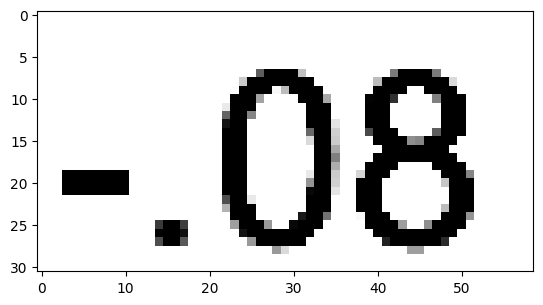

value = -0.1, value_ocr = -0.08


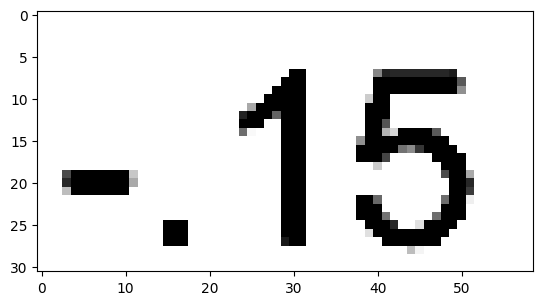

value = -0.2, value_ocr = None


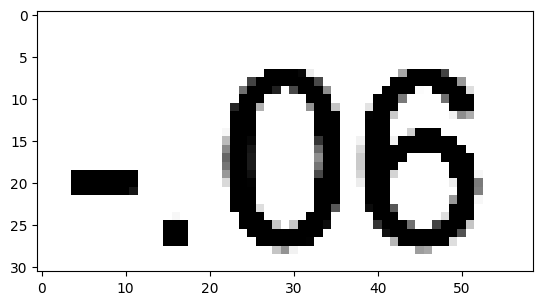

value = -0.08, value_ocr = -0.06


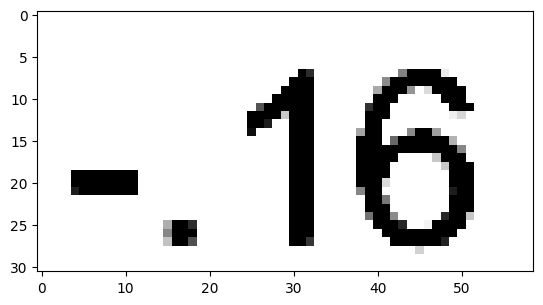

value = -0.23, value_ocr = -0.16


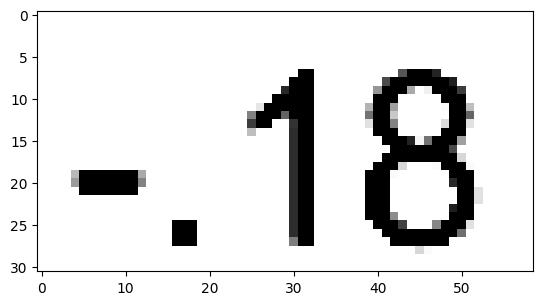

value = -0.25, value_ocr = -0.18


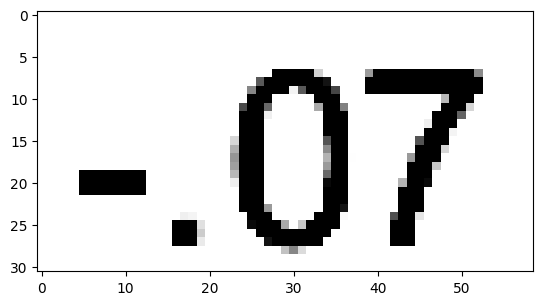

value = -0.09, value_ocr = -0.07


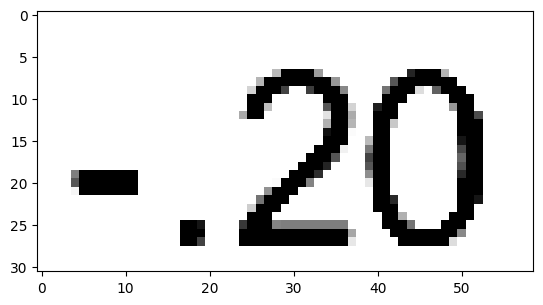

value = -0.31, value_ocr = -0.2


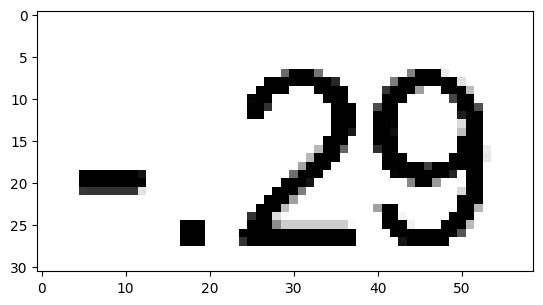

value = -0.49, value_ocr = -0.29


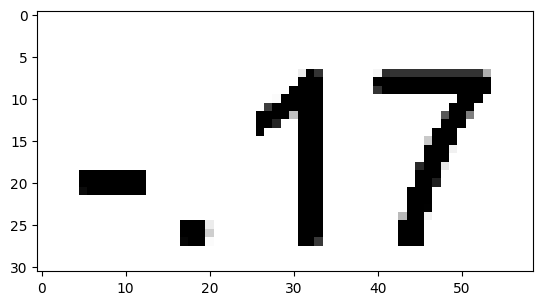

value = -0.24, value_ocr = -0.17


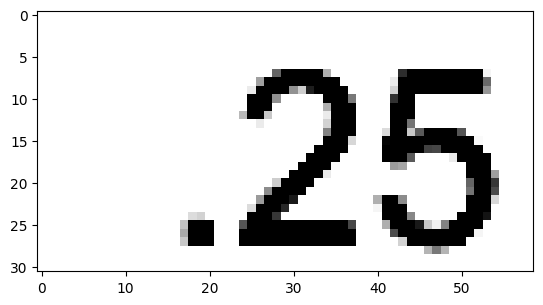

value = 0.25, value_ocr = 0.25


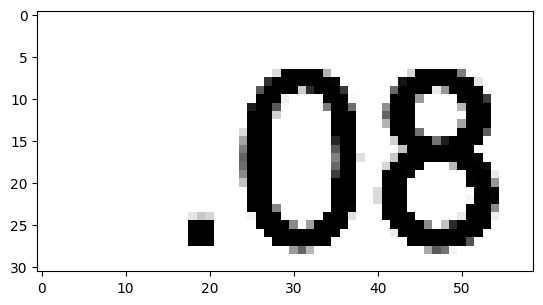

value = 0.07, value_ocr = 0.08


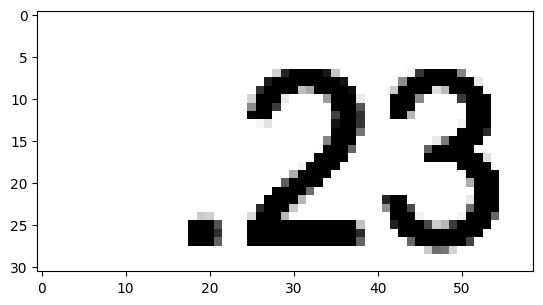

value = 0.23, value_ocr = 0.23


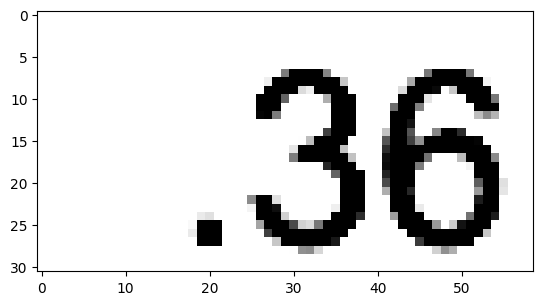

value = 0.46, value_ocr = 0.36


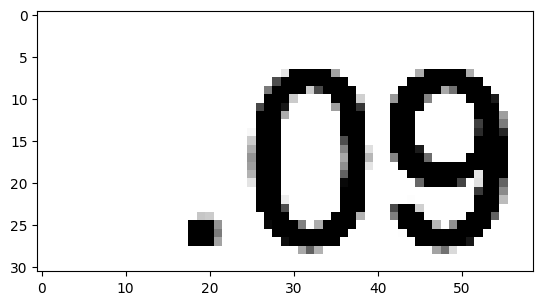

value = 0.08, value_ocr = 0.09


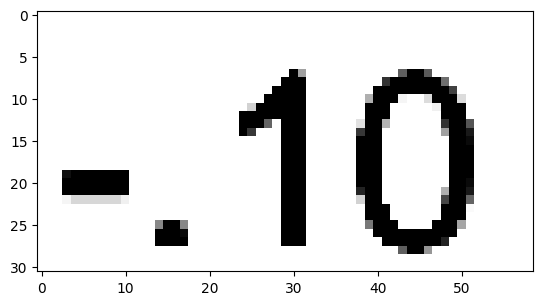

value = -0.13, value_ocr = None


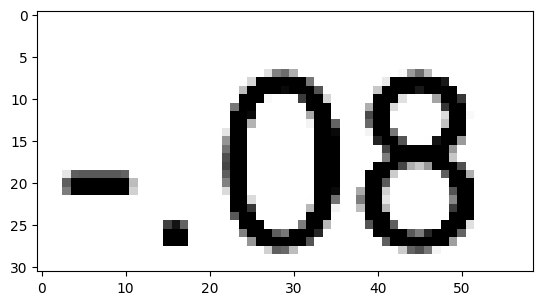

value = -0.09, value_ocr = -0.08


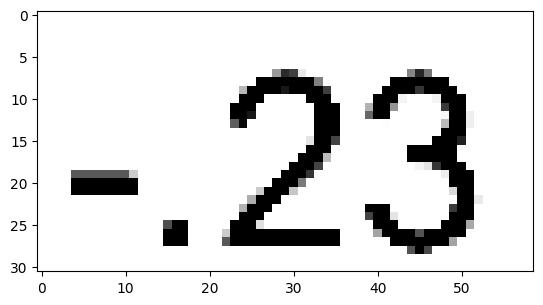

value = -0.35, value_ocr = -0.23


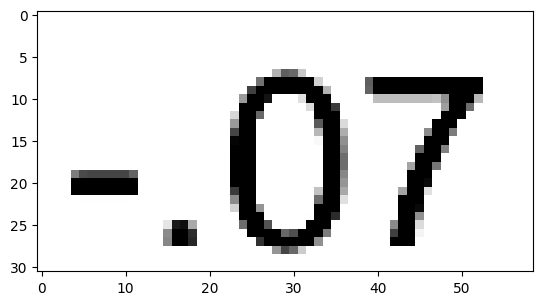

value = -0.09, value_ocr = -0.07


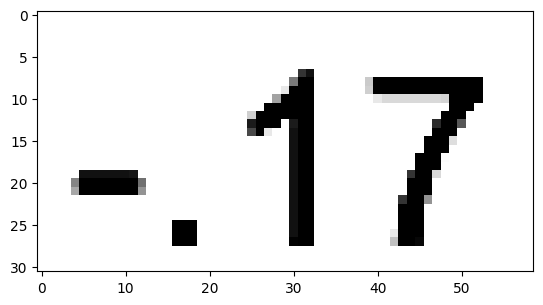

value = -0.24, value_ocr = -0.17


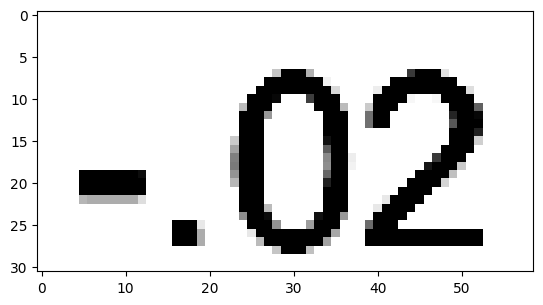

value = -0.03, value_ocr = -0.02


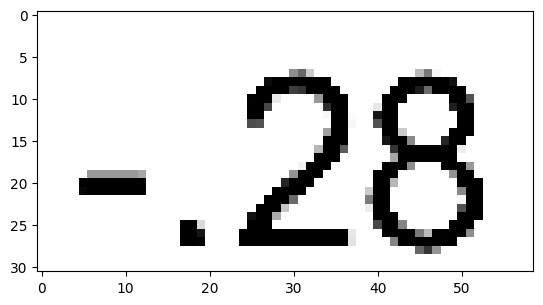

value = -0.47, value_ocr = -0.28


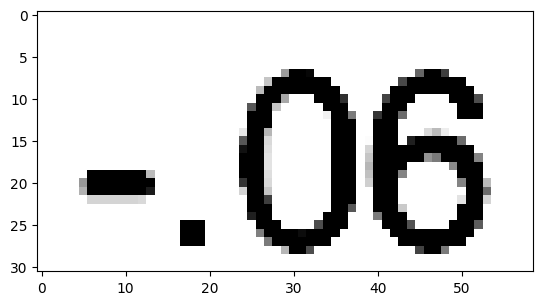

value = -0.07, value_ocr = -0.06


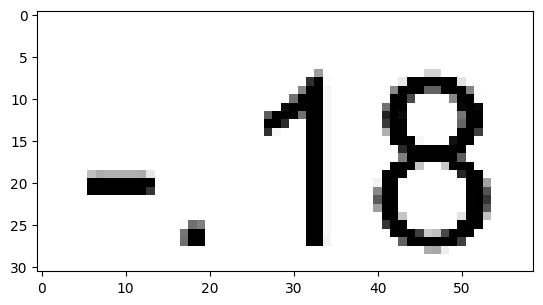

value = -0.25, value_ocr = None


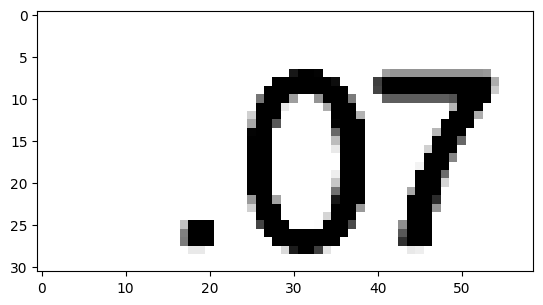

value = 0.05, value_ocr = 0.07


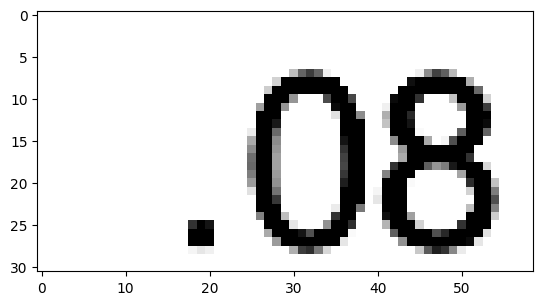

value = 0.07, value_ocr = 0.08


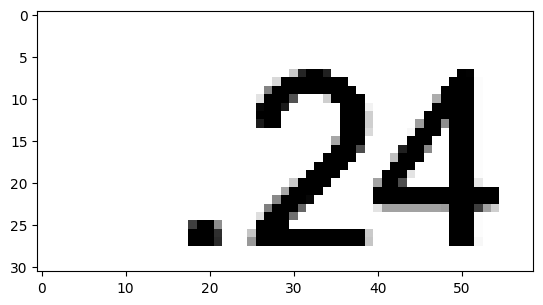

value = 0.24, value_ocr = 0.24


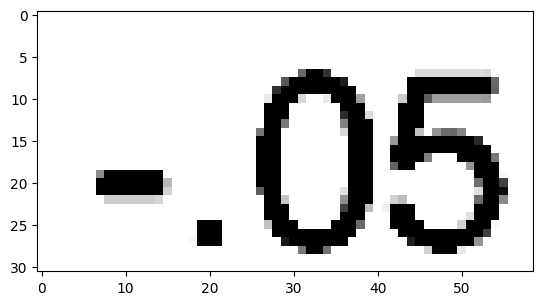

value = -0.07, value_ocr = -0.05


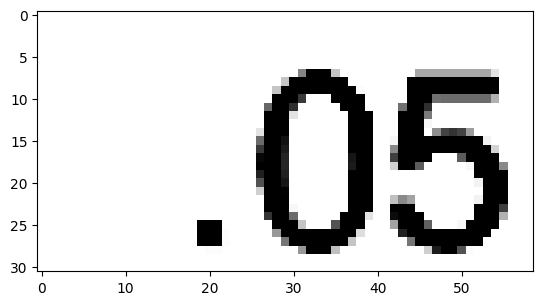

value = 0.04, value_ocr = 0.05


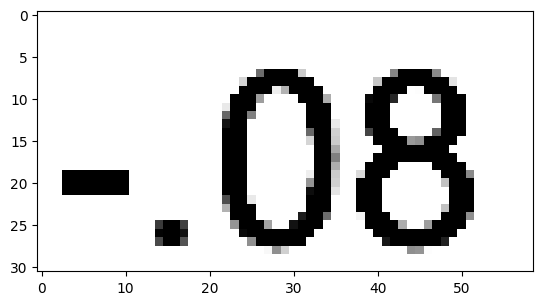

value = -0.1, value_ocr = -0.08


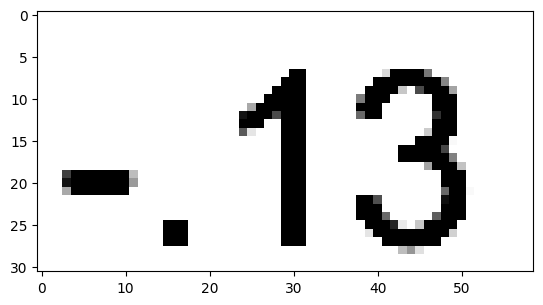

value = -0.18, value_ocr = None


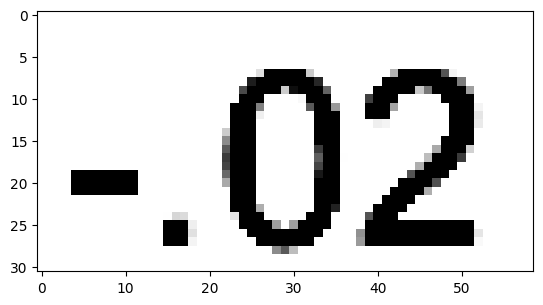

value = -0.02, value_ocr = -0.02


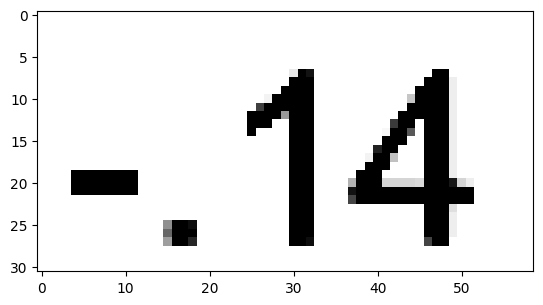

value = -0.19, value_ocr = -0.14


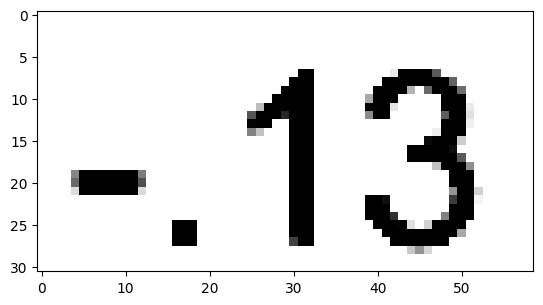

value = -0.18, value_ocr = -0.13


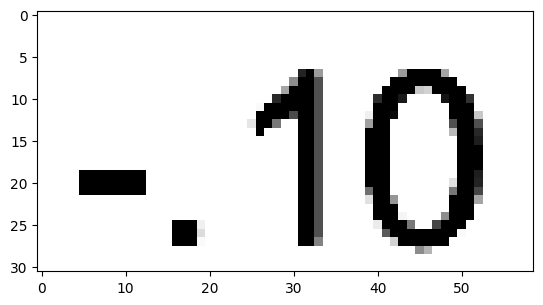

value = -0.12, value_ocr = -0.1


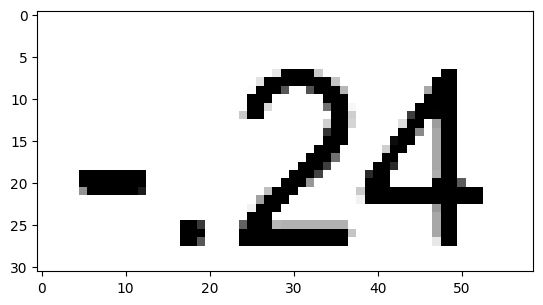

value = -0.39, value_ocr = -0.24


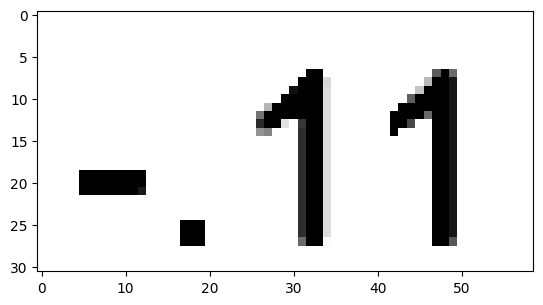

value = -0.15, value_ocr = -0.11


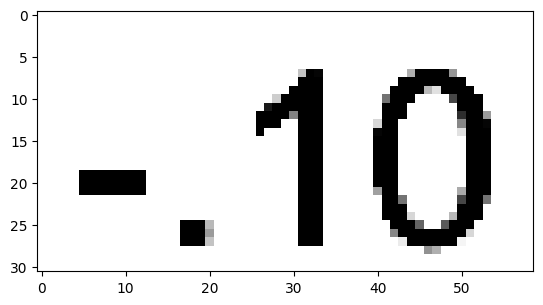

value = -0.12, value_ocr = -0.1


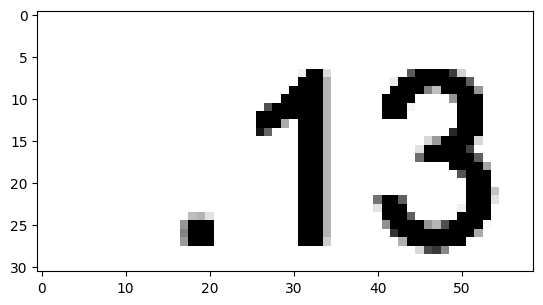

value = 0.11, value_ocr = 0.13


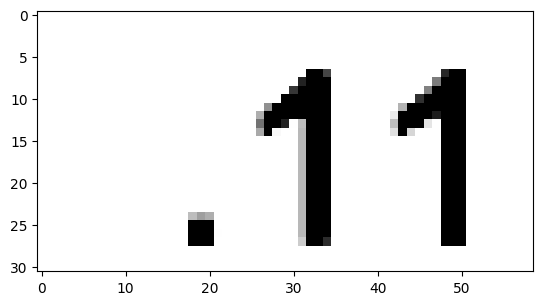

value = 0.09, value_ocr = 0.11


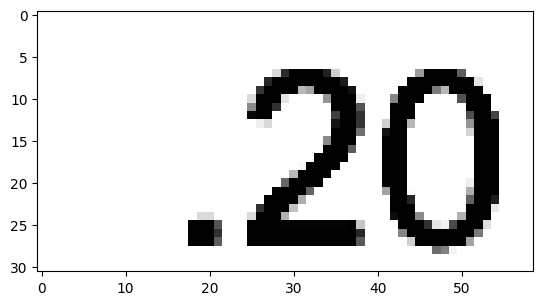

value = 0.19, value_ocr = 0.2


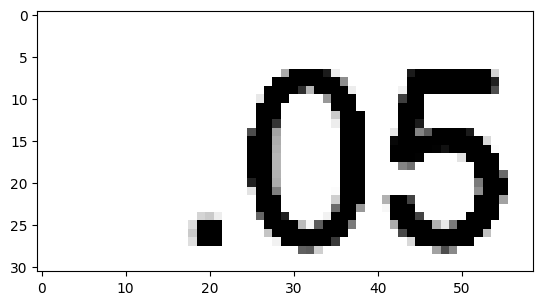

value = 0.04, value_ocr = 0.05


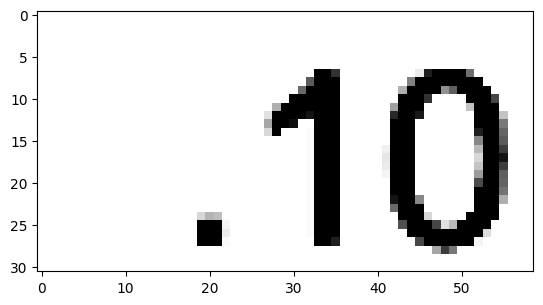

value = 0.08, value_ocr = 0.1


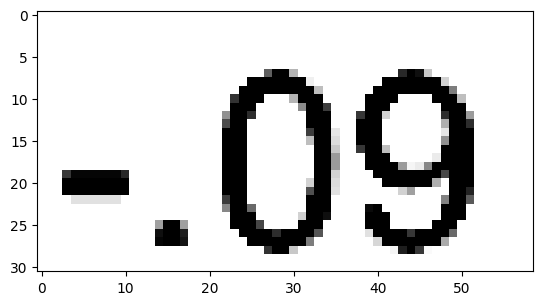

value = -0.11, value_ocr = -0.09


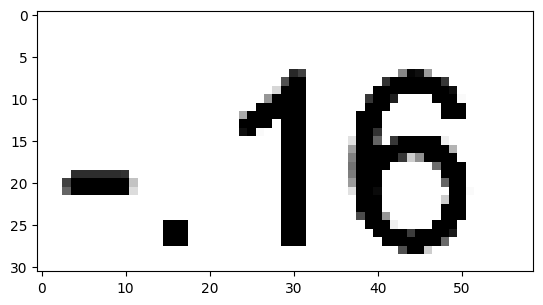

value = -0.22, value_ocr = None


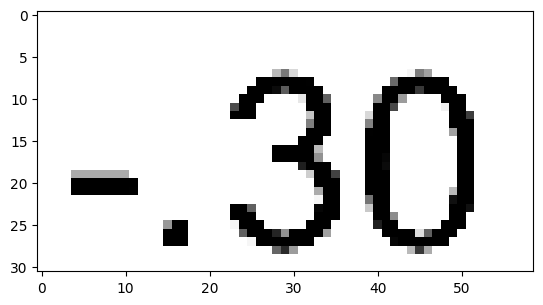

value = -0.52, value_ocr = -0.3


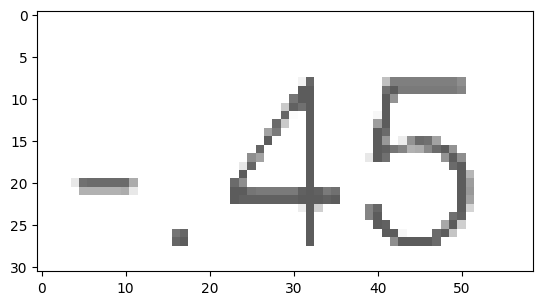

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -1.08, value_ocr = -0.45


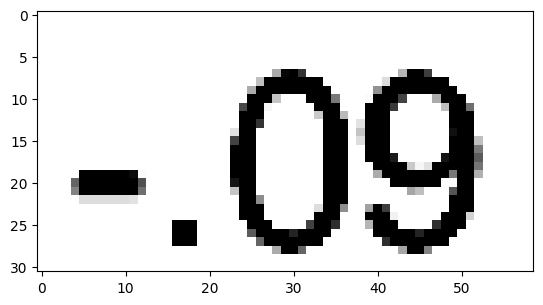

value = -0.1, value_ocr = -0.09


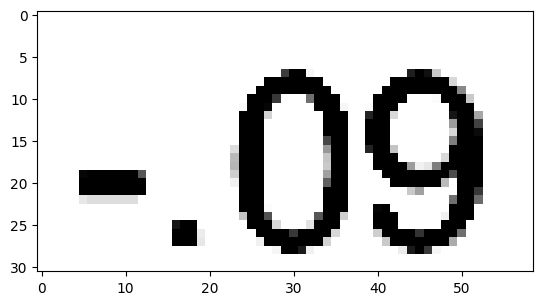

value = -0.11, value_ocr = -0.09


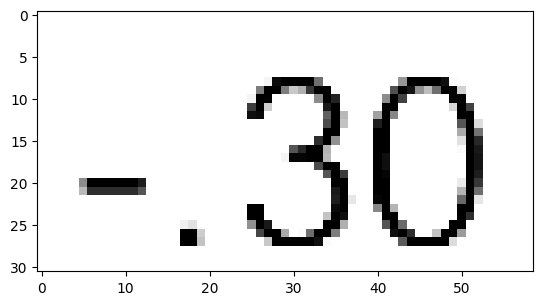

value = -0.51, value_ocr = -0.3


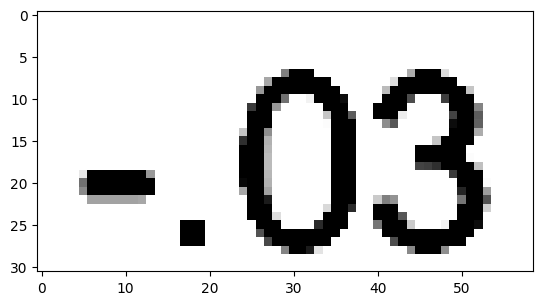

value = -0.03, value_ocr = -0.03


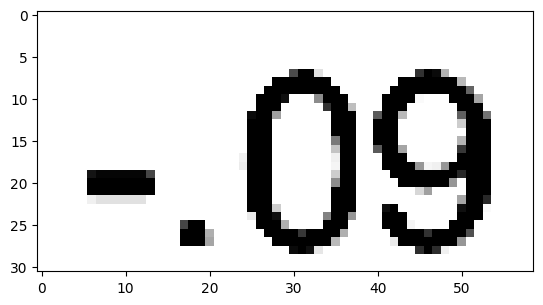

value = -0.11, value_ocr = -0.09


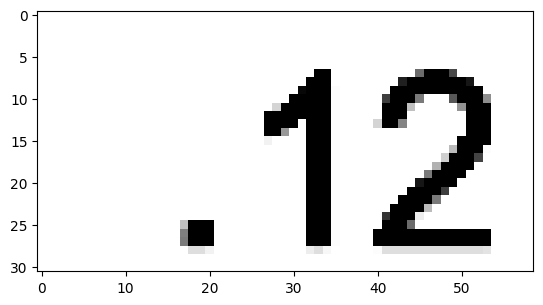

value = 0.1, value_ocr = None


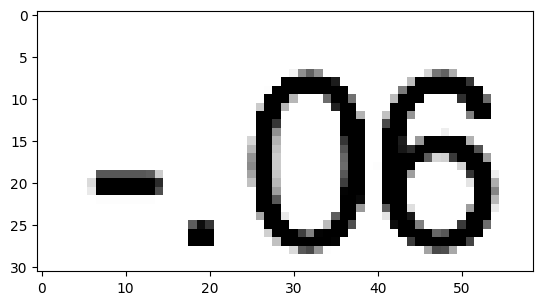

value = -0.07, value_ocr = -0.06


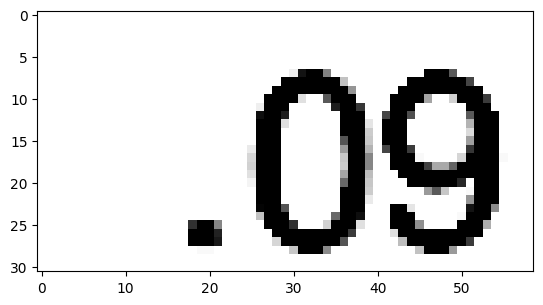

value = 0.07, value_ocr = 0.09


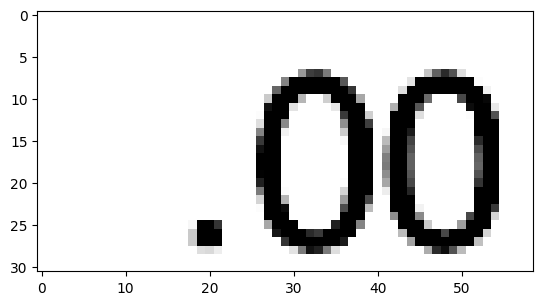

value = -0.0, value_ocr = 0.0


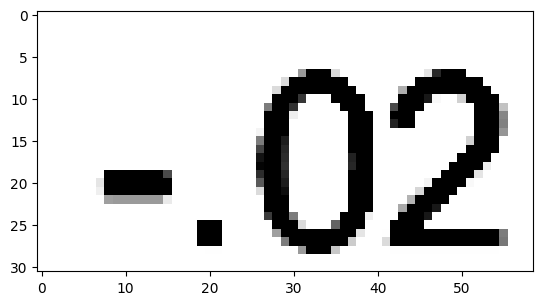

value = -0.02, value_ocr = -0.02


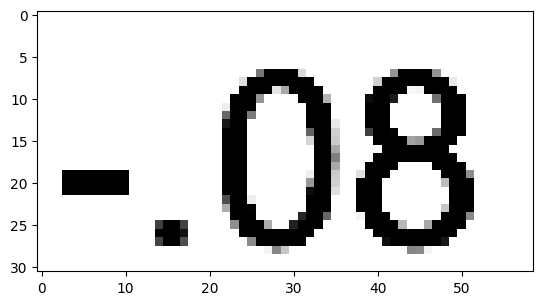

value = -0.1, value_ocr = -0.08


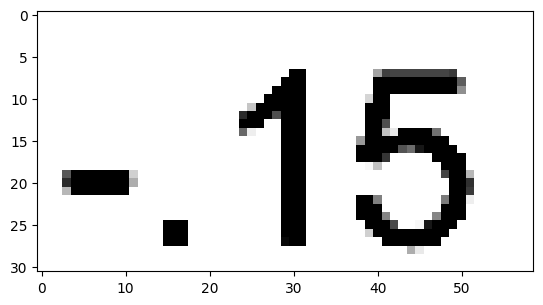

value = -0.21, value_ocr = None


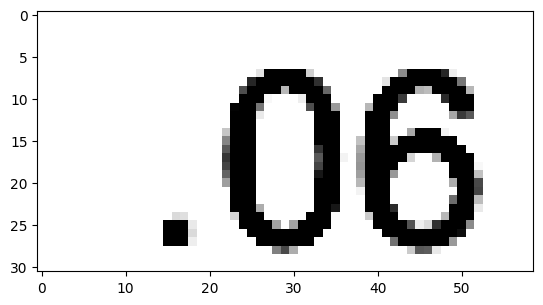

value = 0.05, value_ocr = 0.06


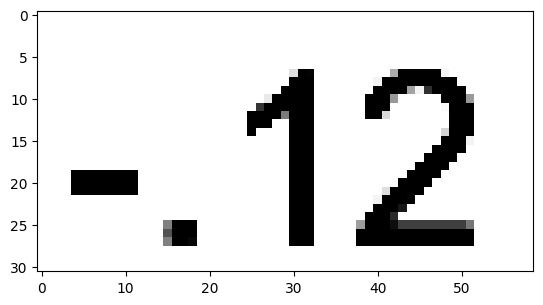

value = -0.15, value_ocr = -0.12


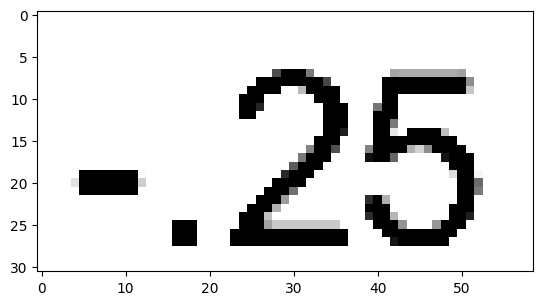

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.39, value_ocr = -0.25


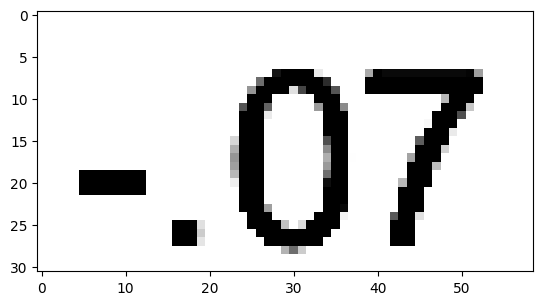

value = -0.09, value_ocr = -0.07


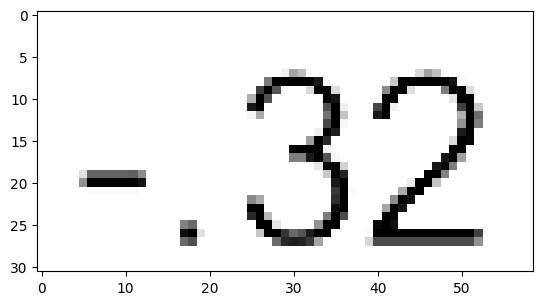

value = -0.57, value_ocr = -0.32


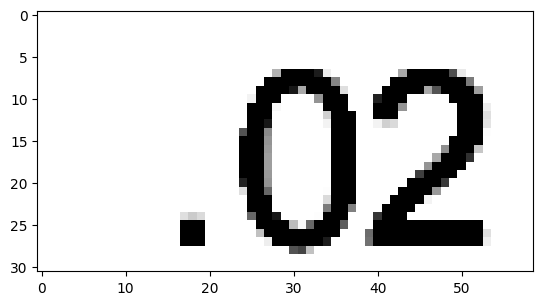

value = 0.01, value_ocr = 0.02


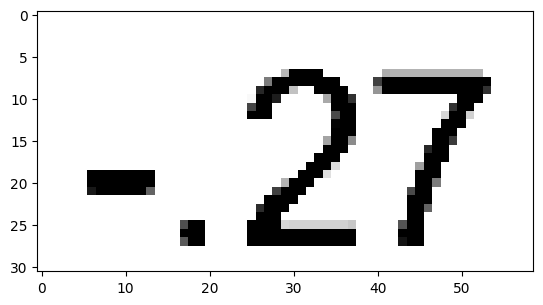

value = -0.43, value_ocr = -0.27


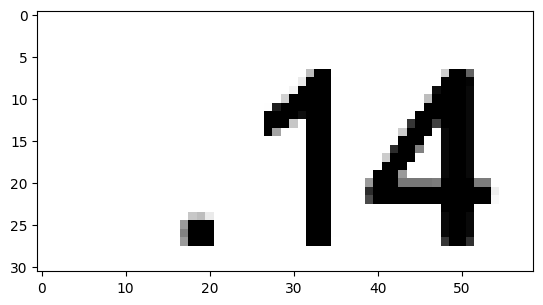

value = 0.12, value_ocr = None


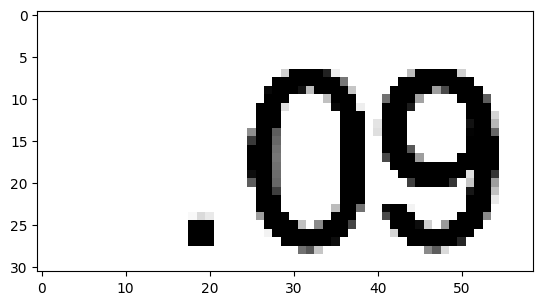

value = 0.08, value_ocr = 0.09


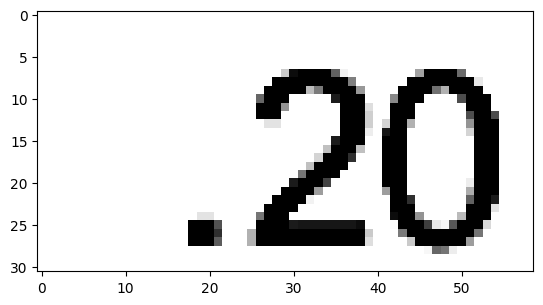

value = 0.19, value_ocr = 0.2


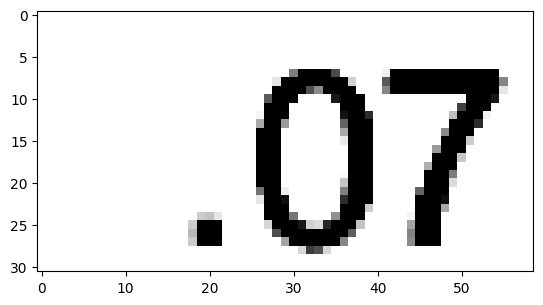

value = 0.06, value_ocr = 0.07


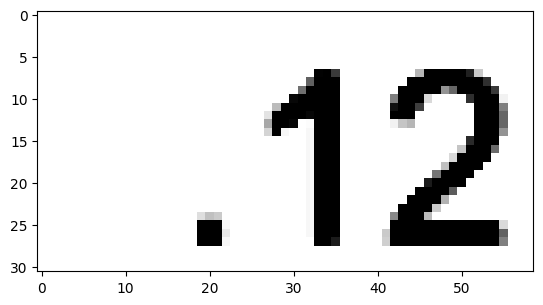

value = 0.1, value_ocr = 0.12


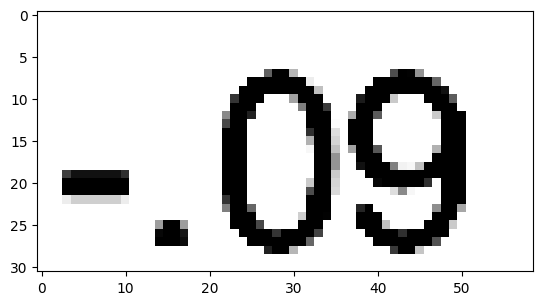

value = -0.1, value_ocr = -0.09


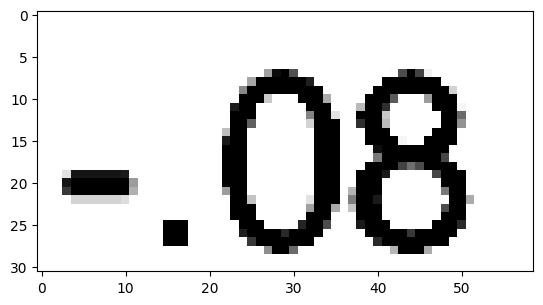

value = -0.1, value_ocr = -0.08


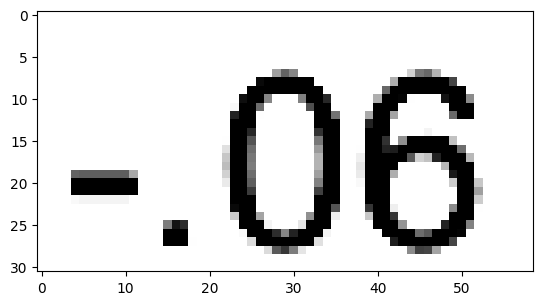

value = -0.07, value_ocr = -0.06


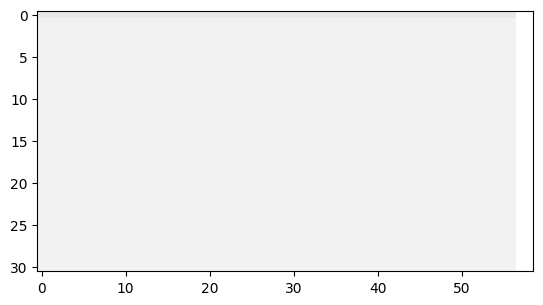

value = -0.0, value_ocr = None


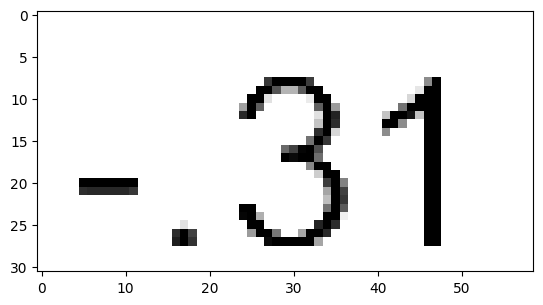

value = -0.53, value_ocr = -0.31


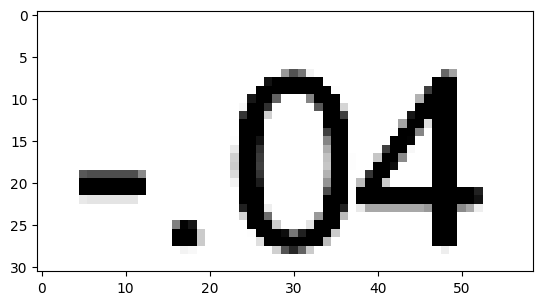

value = -0.05, value_ocr = -0.04


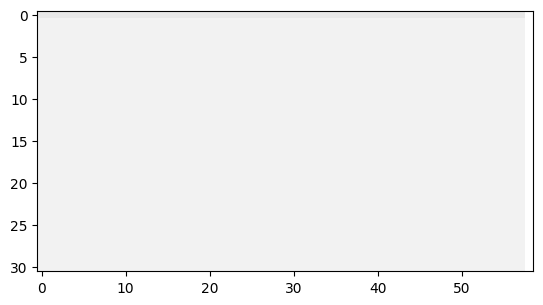

value = -0.0, value_ocr = None


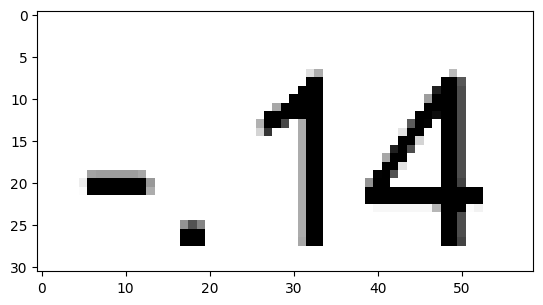

value = -0.19, value_ocr = None


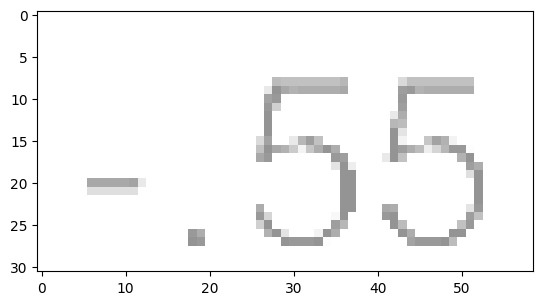

value = -1.36, value_ocr = -0.55


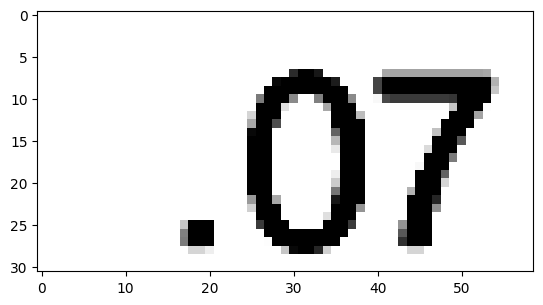

value = 0.06, value_ocr = 0.07


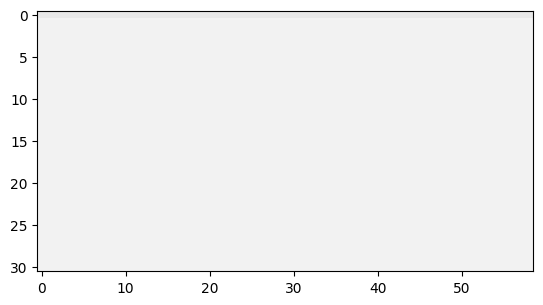

value = -0.0, value_ocr = None


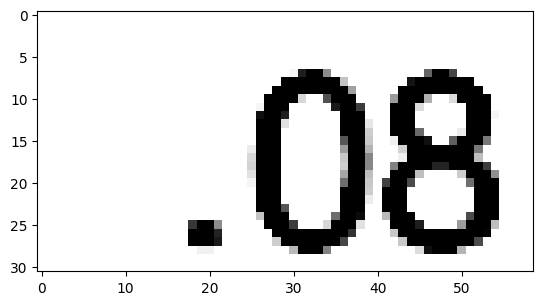

value = 0.07, value_ocr = 0.08


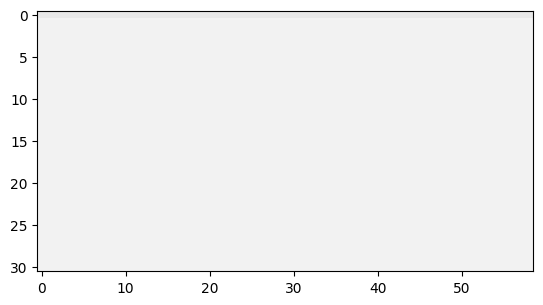

value = -0.0, value_ocr = None


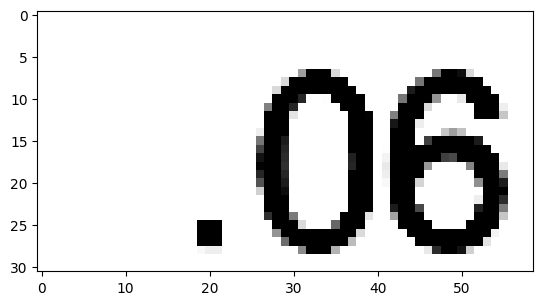

value = 0.05, value_ocr = 0.06


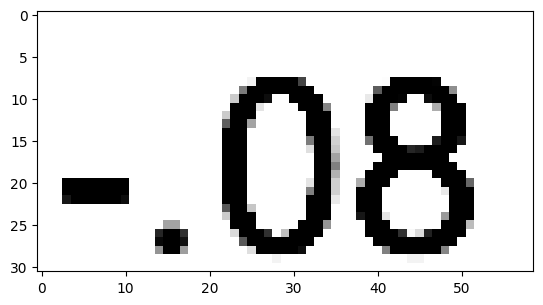

value = -0.1, value_ocr = -0.08


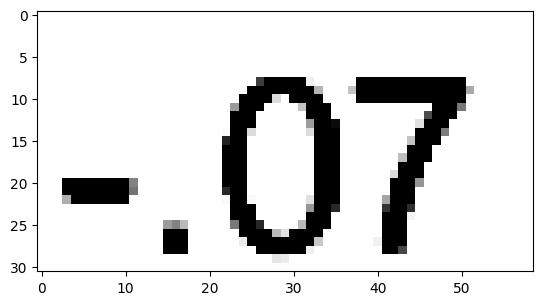

value = -0.09, value_ocr = -0.07


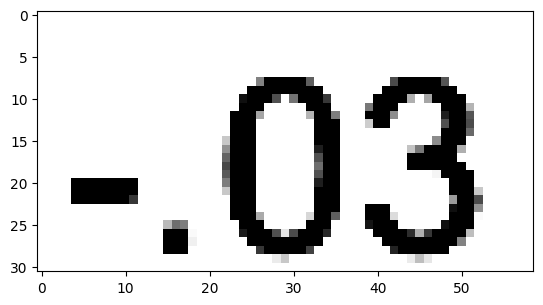

value = -0.04, value_ocr = -0.03


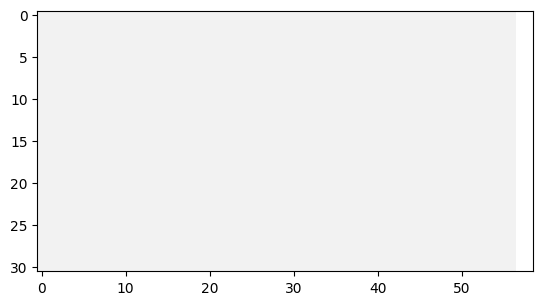

value = -0.0, value_ocr = None


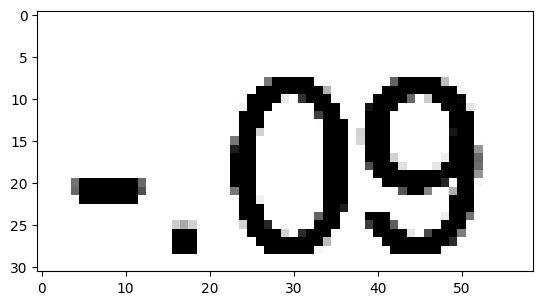

value = -0.12, value_ocr = -0.09


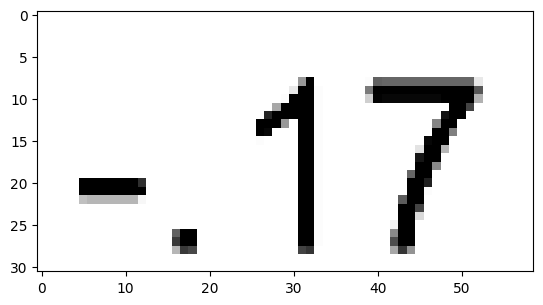

value = -0.24, value_ocr = -0.17


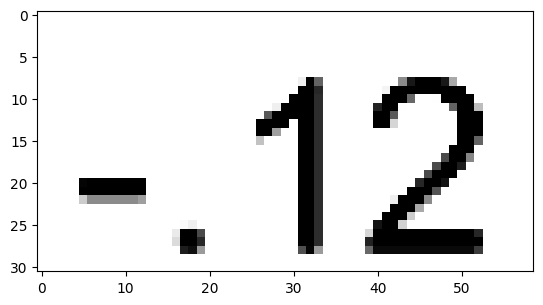

value = -0.15, value_ocr = -0.12


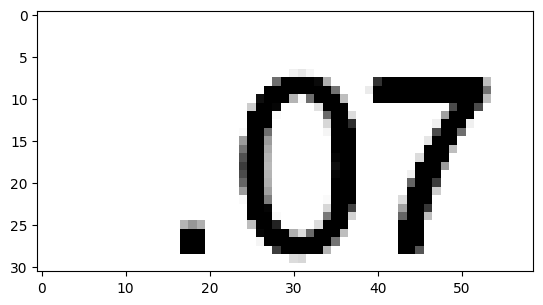

value = 0.06, value_ocr = 0.07


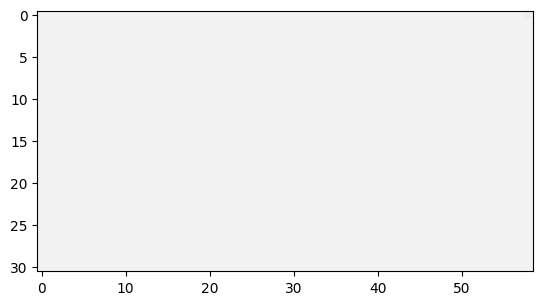

value = -0.0, value_ocr = None


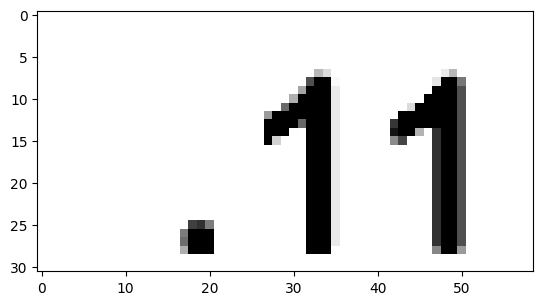

value = 0.09, value_ocr = None


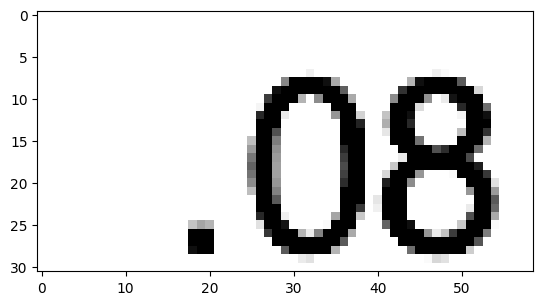

value = 0.07, value_ocr = 0.08


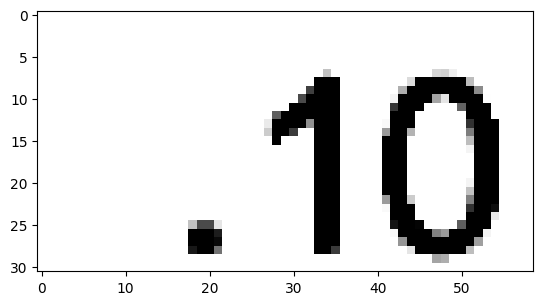

value = 0.09, value_ocr = 0.1


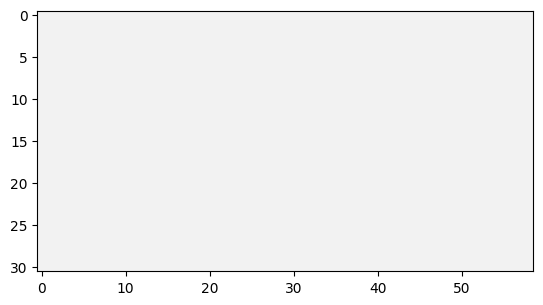

value = -0.0, value_ocr = None


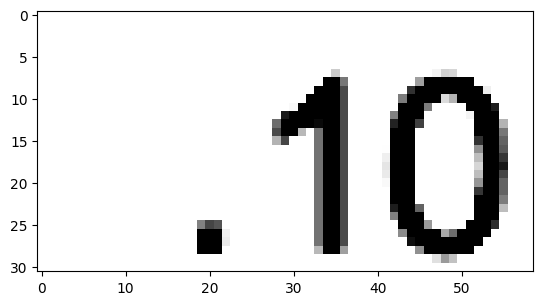

value = 0.09, value_ocr = 0.1


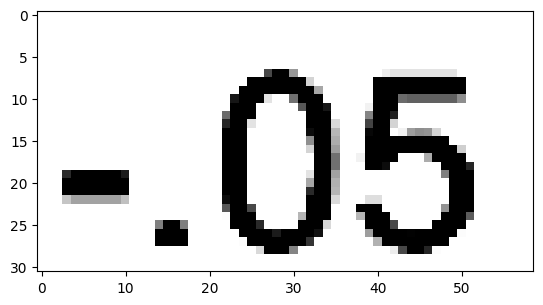

value = -0.06, value_ocr = -0.05


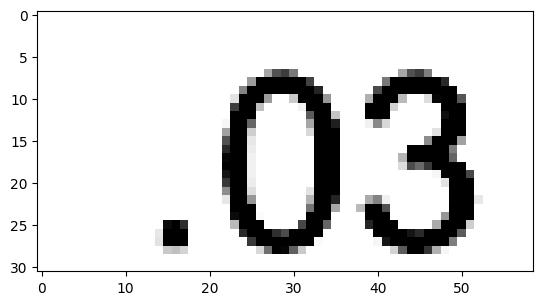

value = 0.02, value_ocr = 0.03


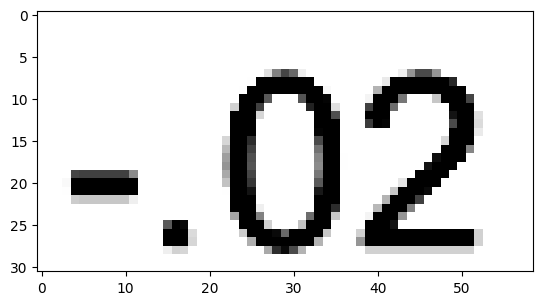

value = -0.02, value_ocr = -0.02


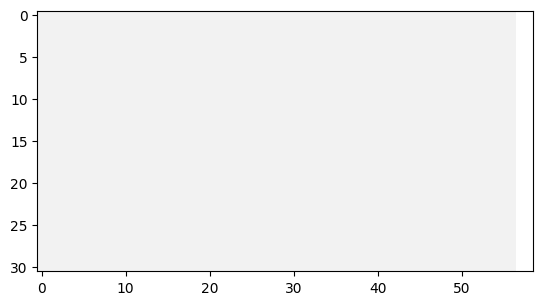

value = -0.0, value_ocr = None


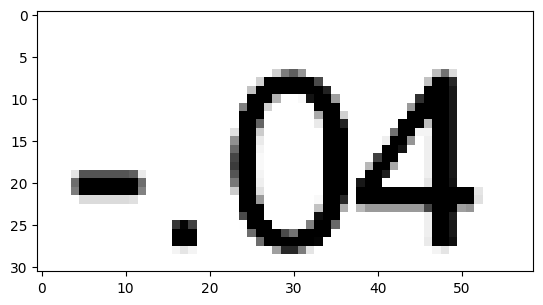

value = -0.05, value_ocr = -0.04


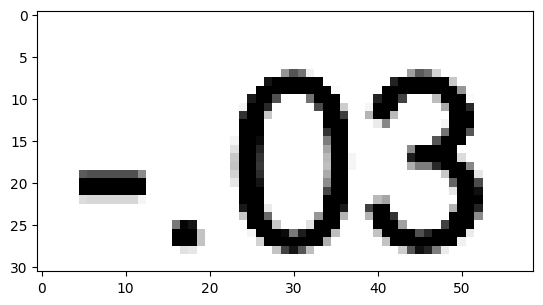

value = -0.04, value_ocr = -0.03


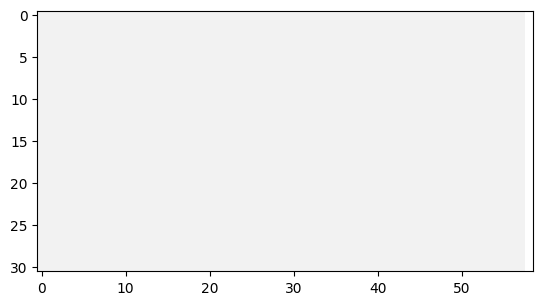

value = -0.0, value_ocr = None


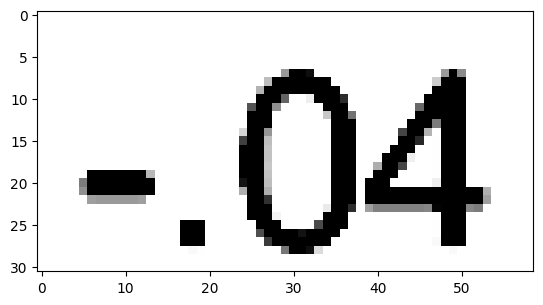

value = -0.05, value_ocr = -0.04


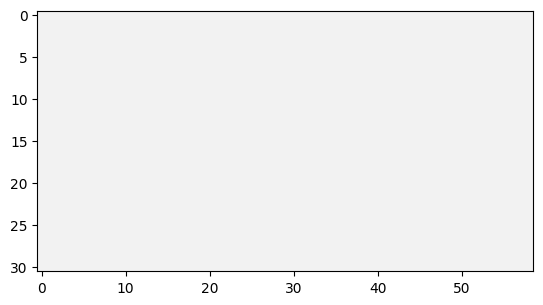

value = -0.0, value_ocr = None


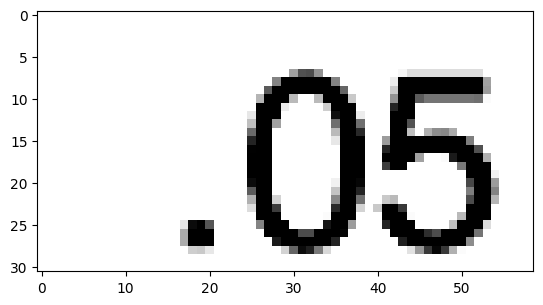

value = 0.03, value_ocr = 0.05


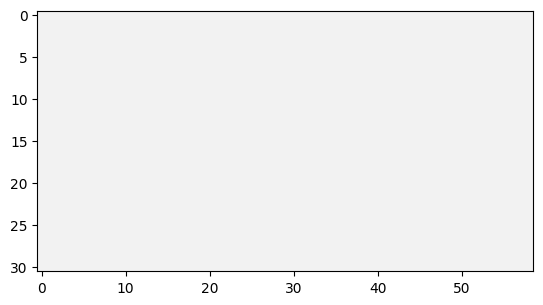

value = -0.0, value_ocr = None


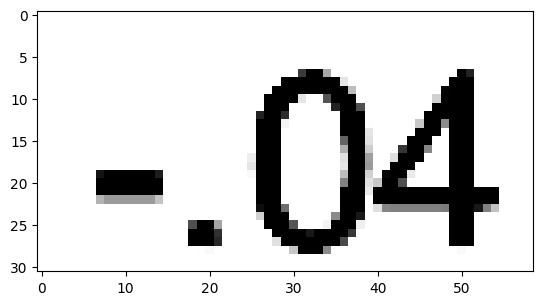

value = -0.05, value_ocr = -0.04


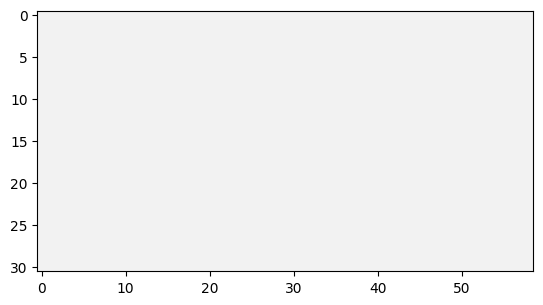

value = -0.0, value_ocr = None


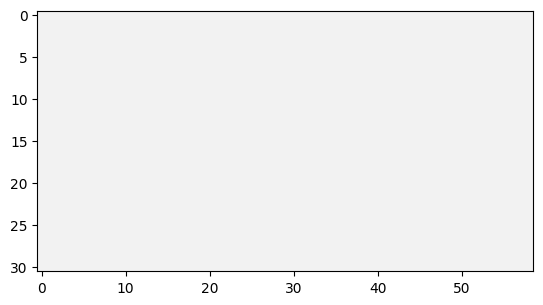

value = -0.0, value_ocr = None


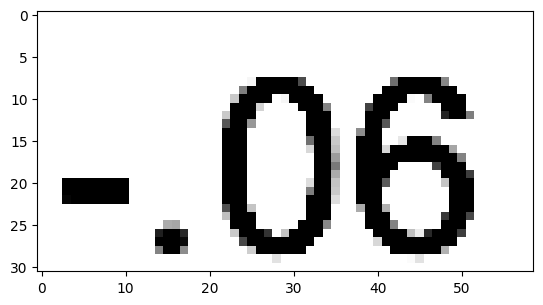

value = -0.08, value_ocr = -0.06


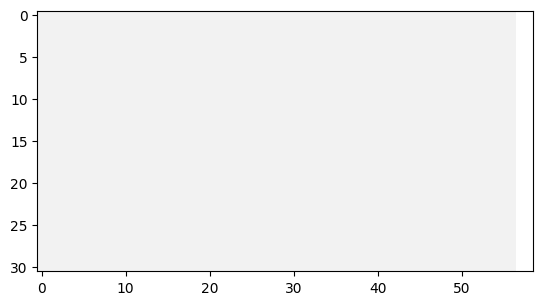

value = -0.0, value_ocr = None


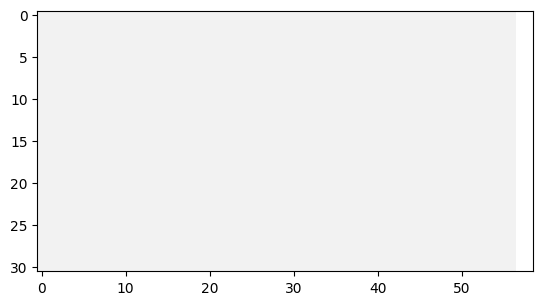

value = -0.0, value_ocr = None


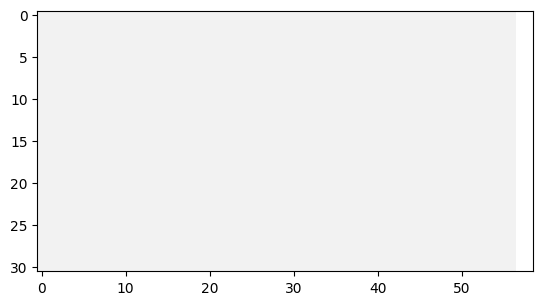

value = -0.0, value_ocr = None


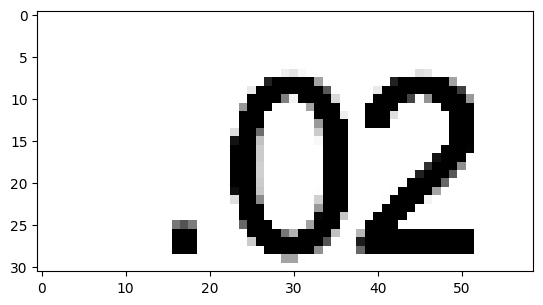

value = 0.02, value_ocr = 0.02


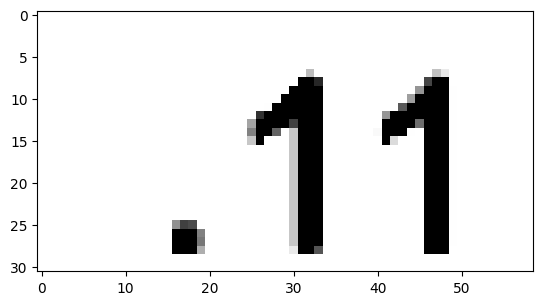

value = 0.09, value_ocr = 0.11


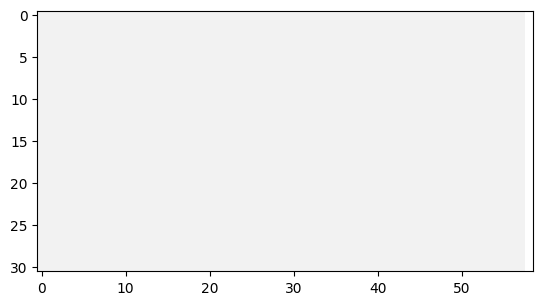

value = -0.0, value_ocr = None


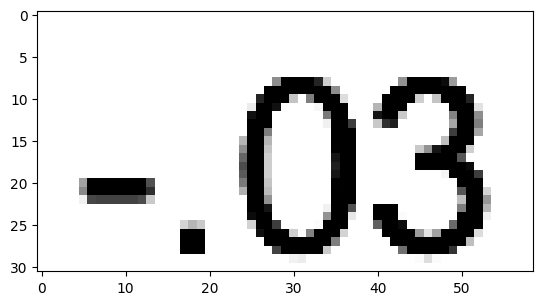

value = -0.03, value_ocr = -0.03


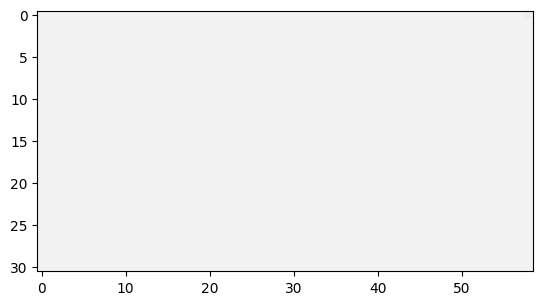

value = -0.0, value_ocr = None


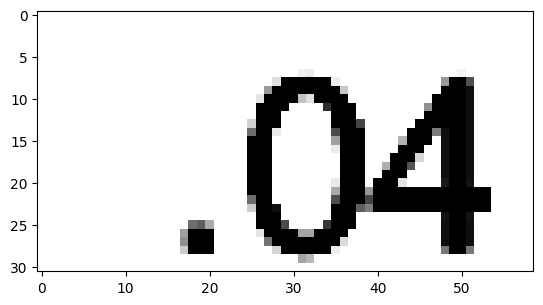

value = 0.03, value_ocr = None


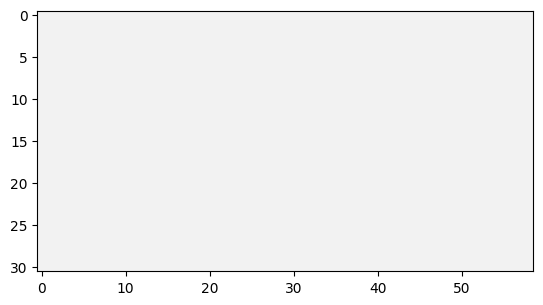

value = -0.0, value_ocr = None


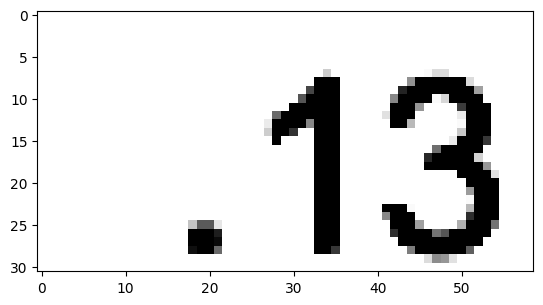

value = 0.12, value_ocr = 0.13


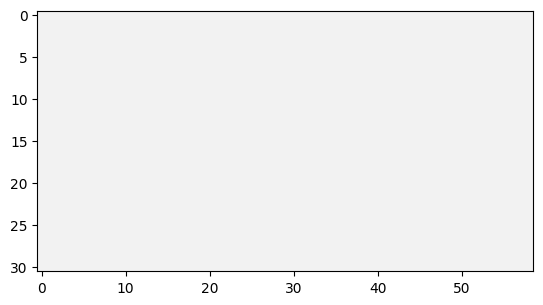

value = -0.0, value_ocr = None


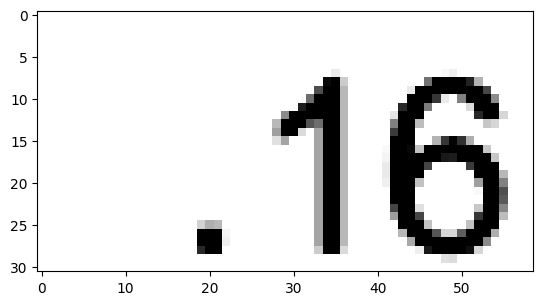

value = 0.14, value_ocr = 0.16


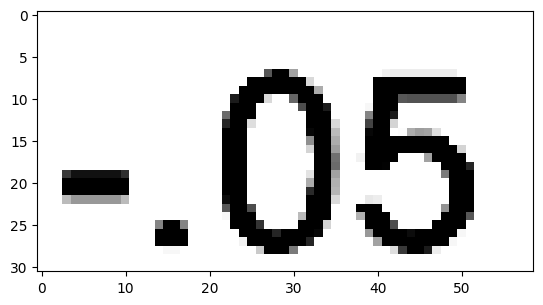

value = -0.05, value_ocr = -0.05


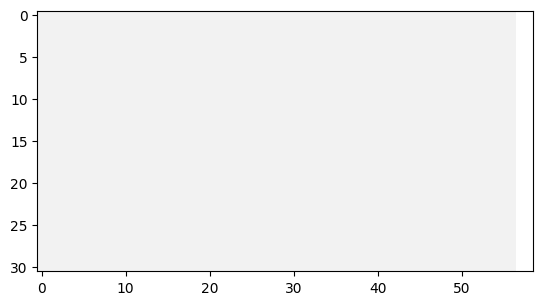

value = -0.0, value_ocr = None


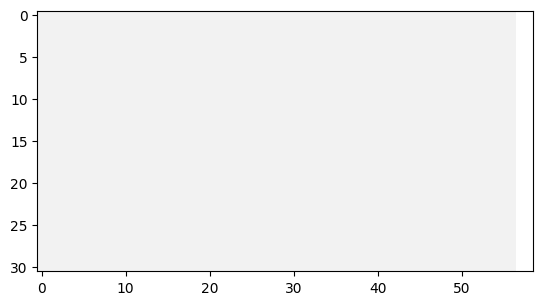

value = -0.0, value_ocr = None


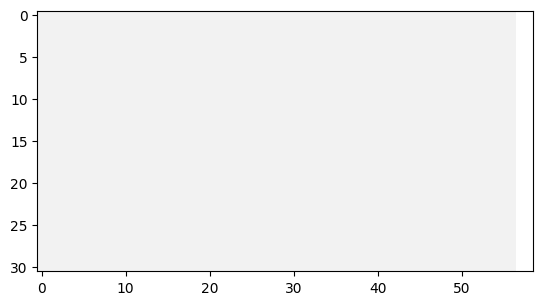

value = -0.0, value_ocr = None


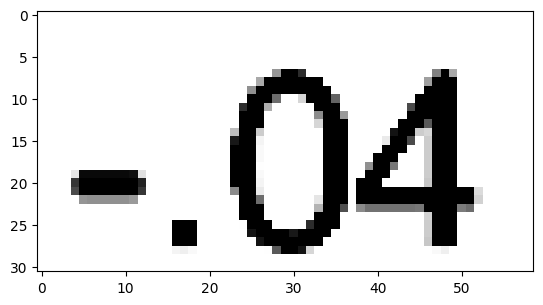

value = -0.05, value_ocr = -0.04


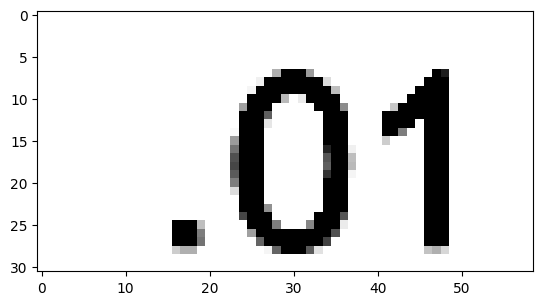

value = 0.01, value_ocr = 0.01


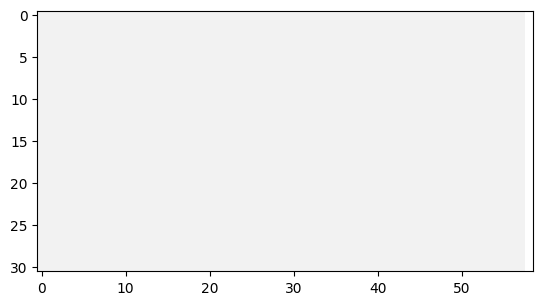

value = -0.0, value_ocr = None


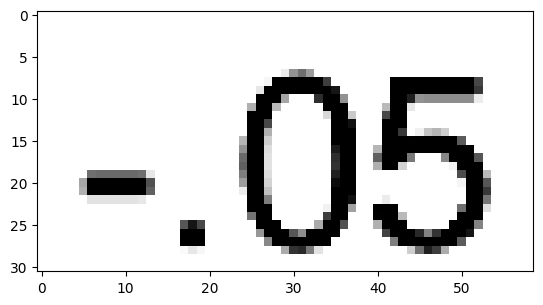

value = -0.06, value_ocr = -0.05


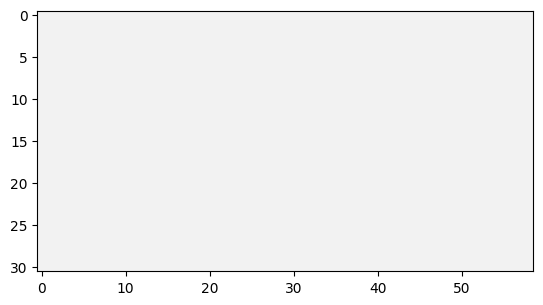

value = -0.0, value_ocr = None


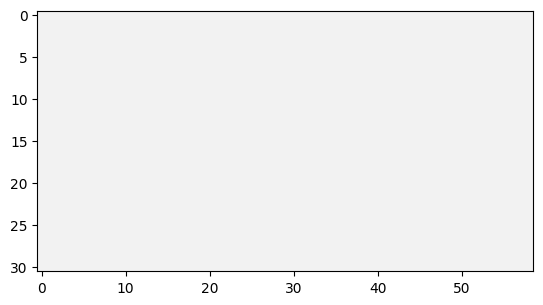

value = -0.0, value_ocr = None


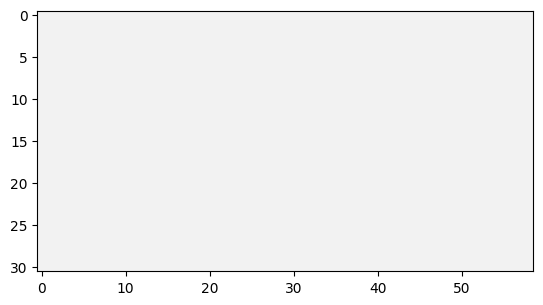

value = -0.0, value_ocr = None


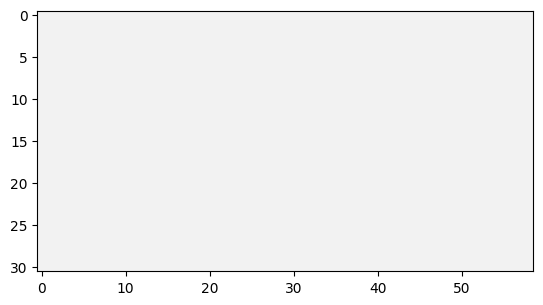

value = -0.0, value_ocr = None


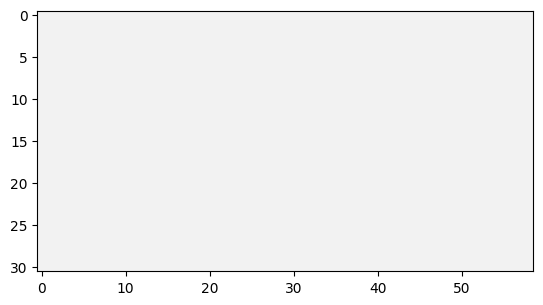

value = -0.0, value_ocr = None


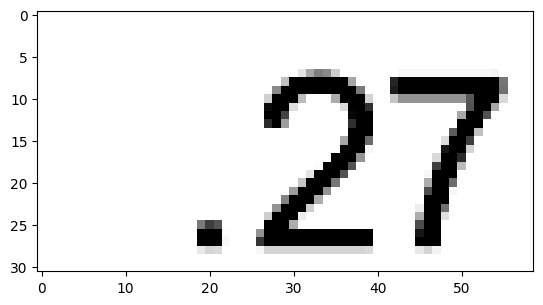

value = 0.28, value_ocr = 0.27


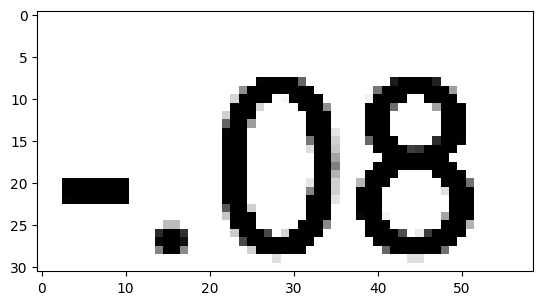

value = -0.1, value_ocr = -0.08


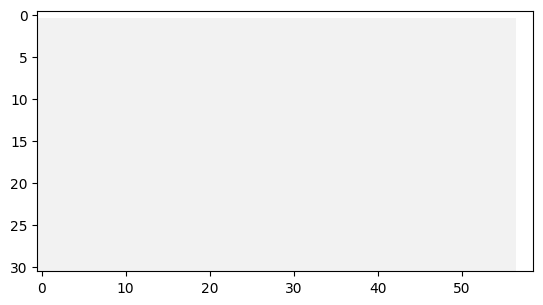

value = -0.0, value_ocr = None


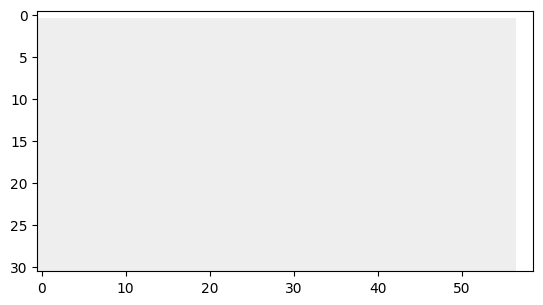

value = -0.0, value_ocr = None


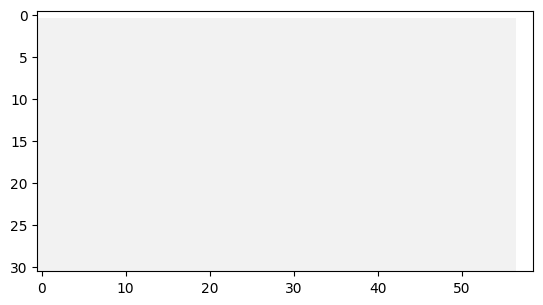

value = -0.0, value_ocr = None


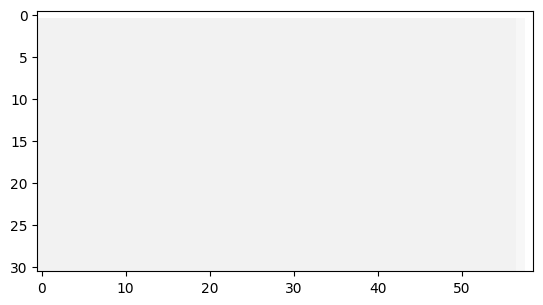

value = -0.0, value_ocr = None


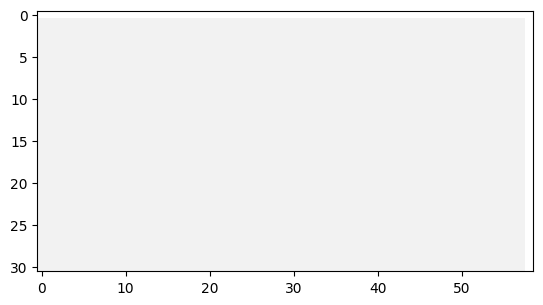

value = -0.0, value_ocr = None


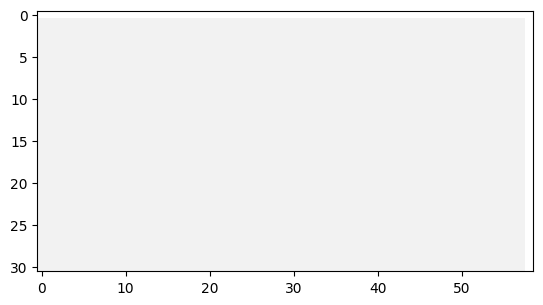

value = -0.0, value_ocr = None


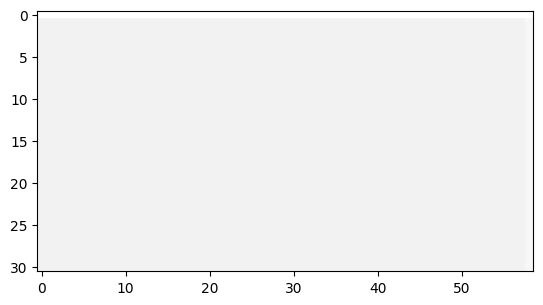

value = -0.0, value_ocr = None


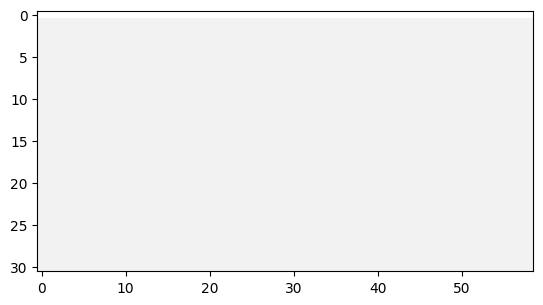

value = -0.0, value_ocr = None


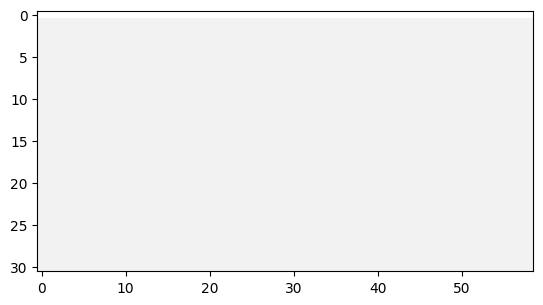

value = -0.0, value_ocr = None


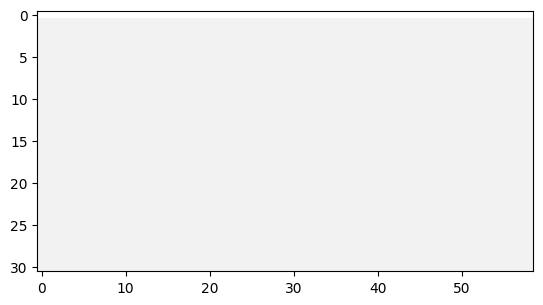

value = -0.0, value_ocr = None


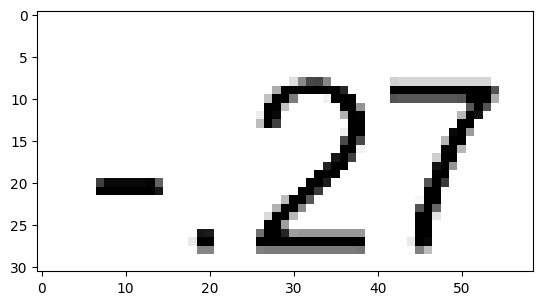

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.44, value_ocr = -0.27


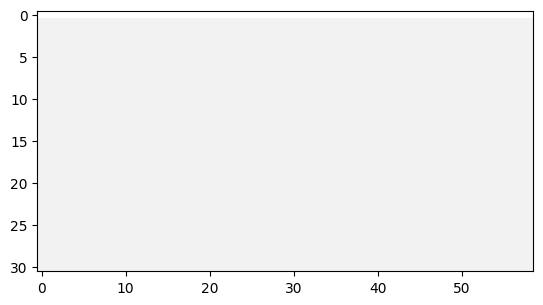

value = -0.0, value_ocr = None


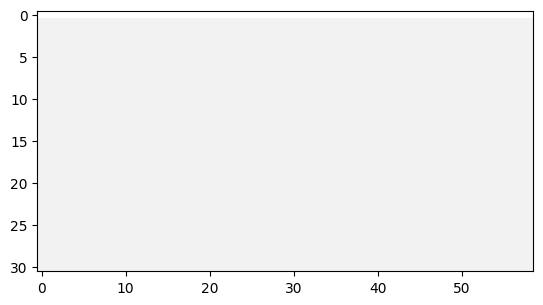

value = -0.0, value_ocr = None


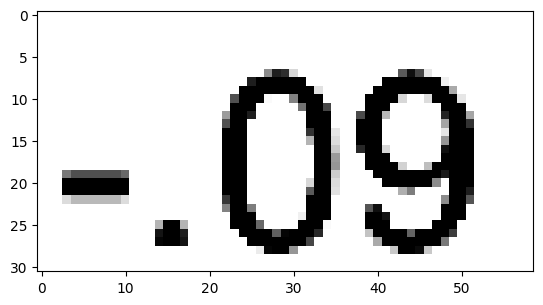

value = -0.11, value_ocr = -0.09


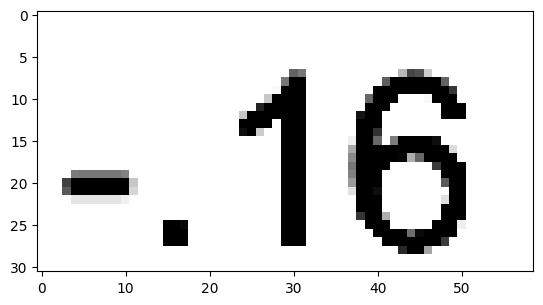

value = -0.22, value_ocr = None


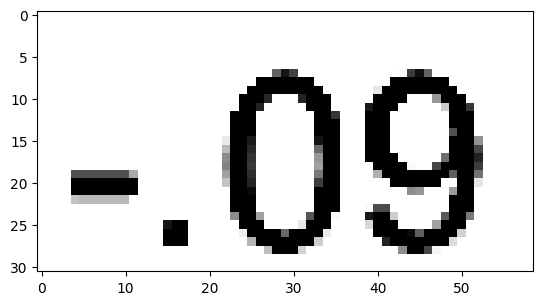

value = -0.11, value_ocr = -0.09


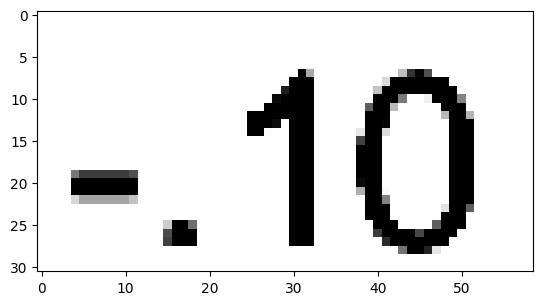

value = -0.12, value_ocr = -0.1


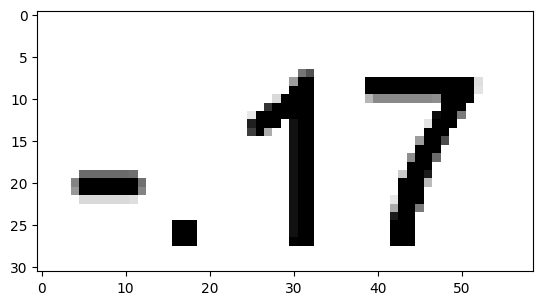

value = -0.24, value_ocr = -0.17


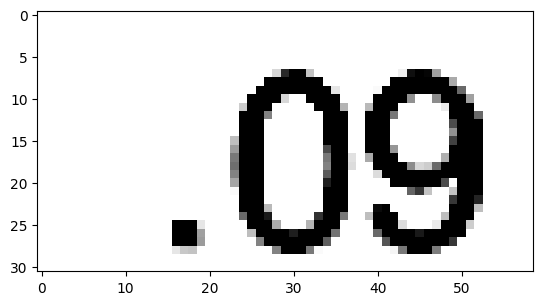

value = 0.07, value_ocr = 0.09


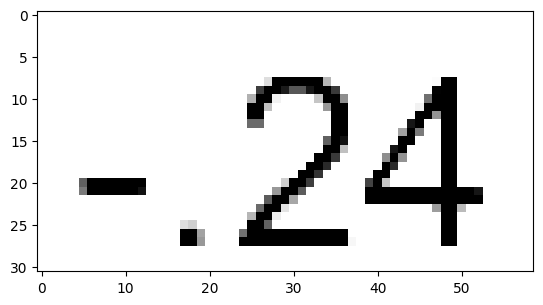

value = -0.39, value_ocr = -0.24


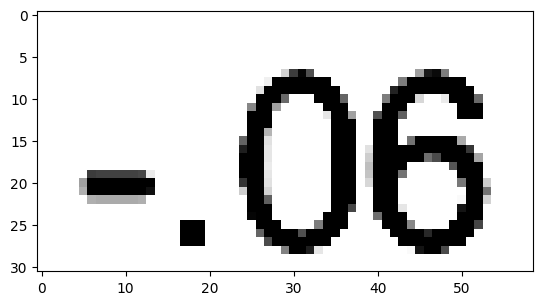

value = -0.08, value_ocr = -0.06


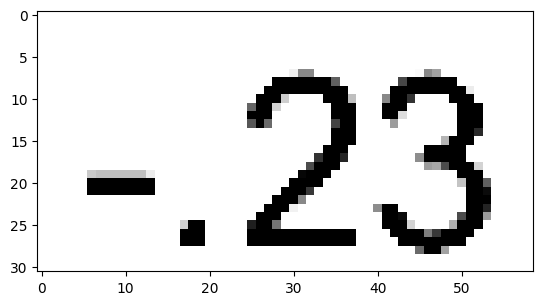

value = -0.35, value_ocr = -0.23


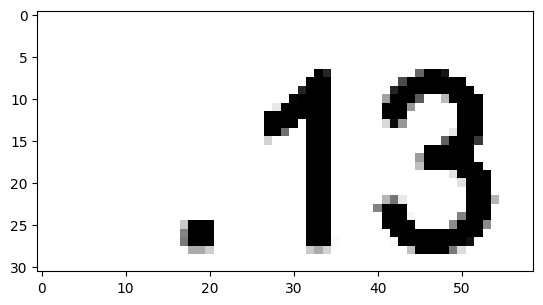

value = 0.11, value_ocr = None


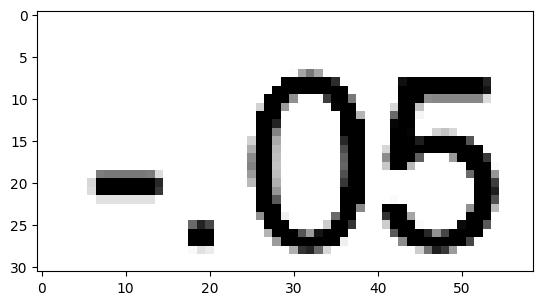

value = -0.06, value_ocr = -0.05


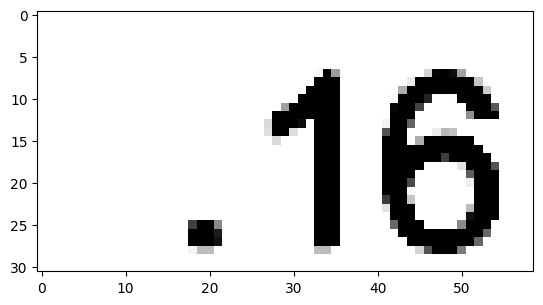

value = 0.14, value_ocr = 0.16


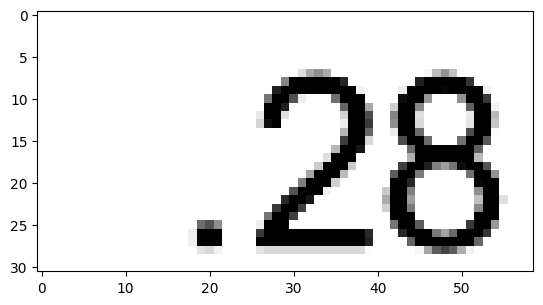

value = 0.3, value_ocr = 0.28


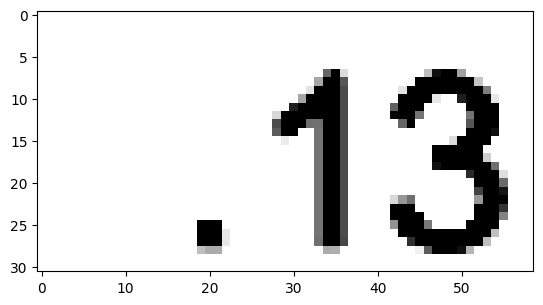

value = 0.11, value_ocr = 0.13


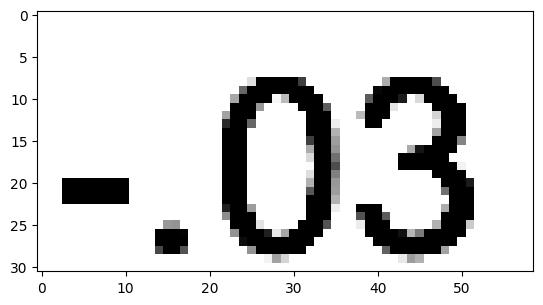

value = -0.03, value_ocr = -0.03


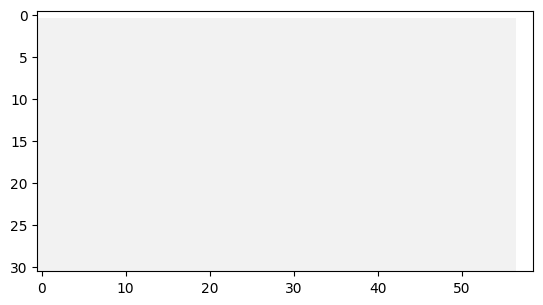

value = -0.0, value_ocr = None


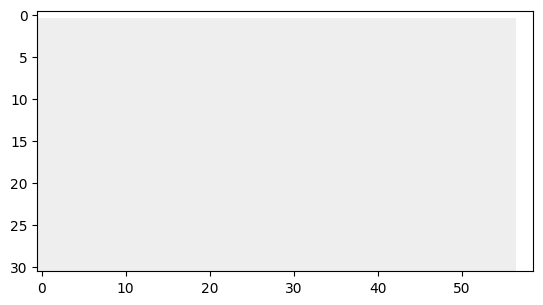

value = -0.0, value_ocr = None


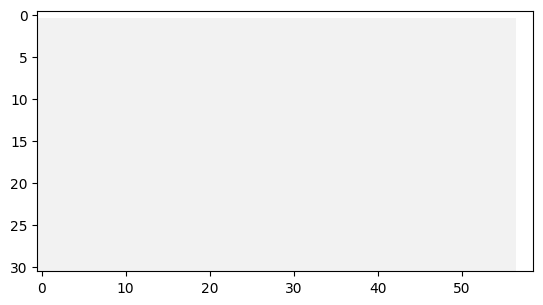

value = -0.0, value_ocr = None


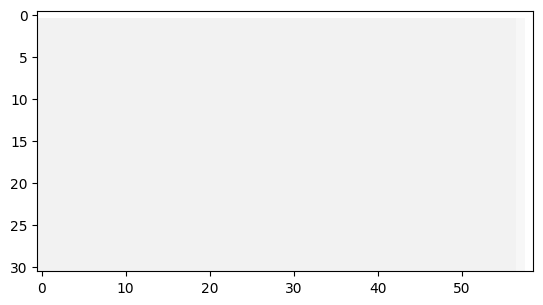

value = -0.0, value_ocr = None


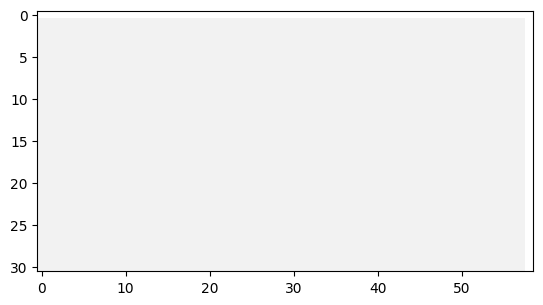

value = -0.0, value_ocr = None


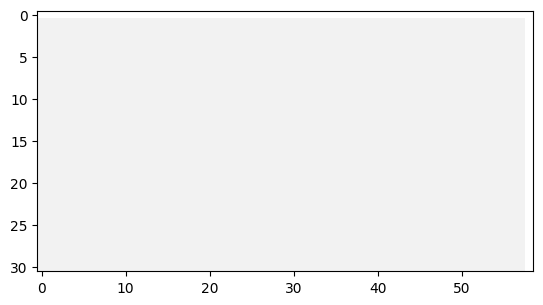

value = -0.0, value_ocr = None


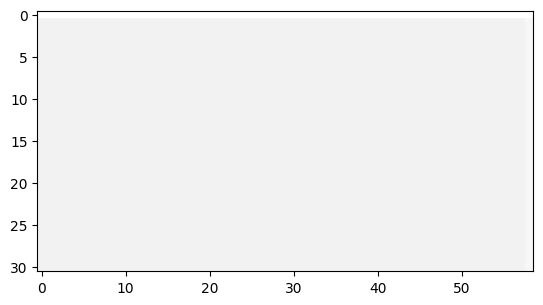

value = -0.0, value_ocr = None


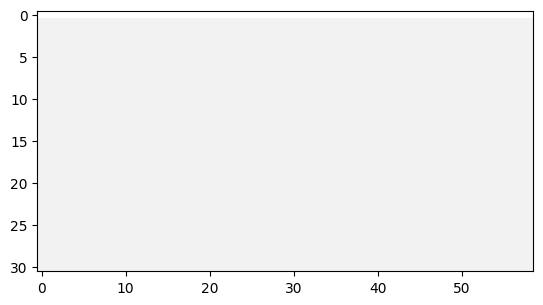

value = -0.0, value_ocr = None


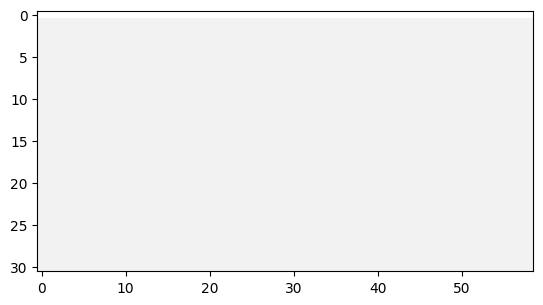

value = -0.0, value_ocr = None


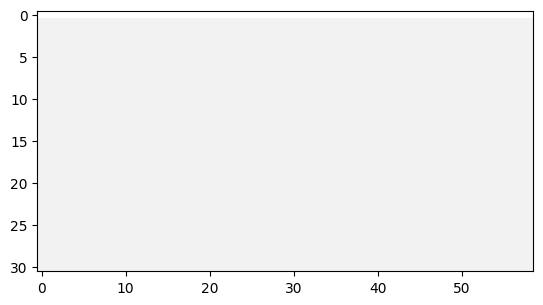

value = -0.0, value_ocr = None


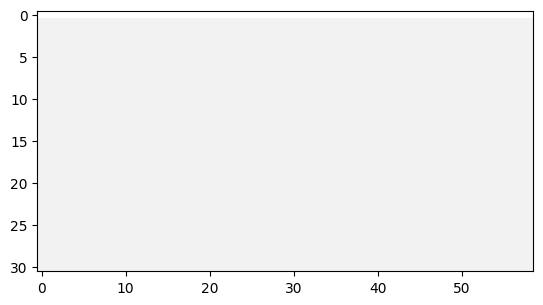

value = -0.0, value_ocr = None


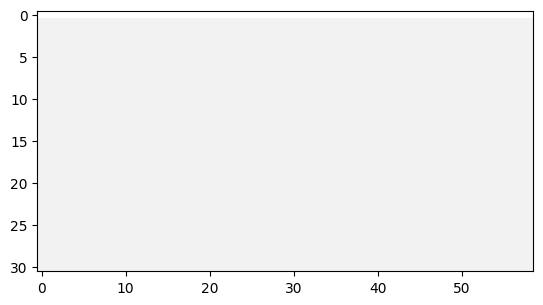

value = -0.0, value_ocr = None


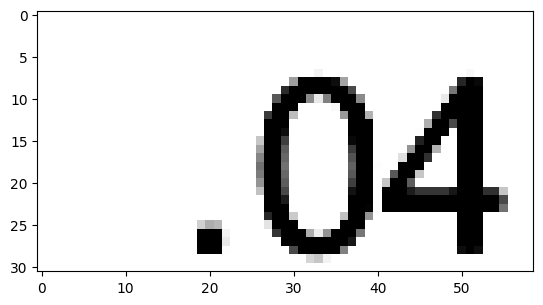

value = 0.03, value_ocr = 0.04


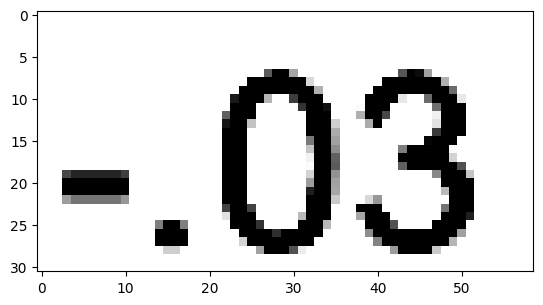

value = -0.04, value_ocr = -0.03


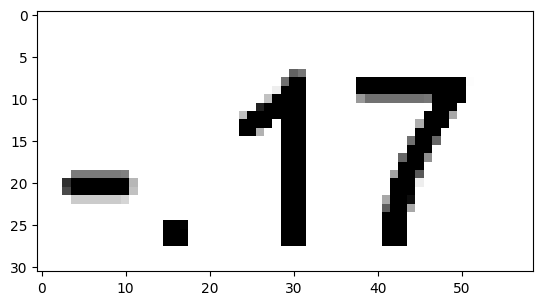

value = -0.24, value_ocr = None


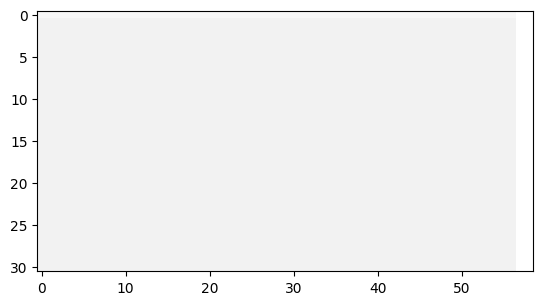

value = -0.0, value_ocr = None


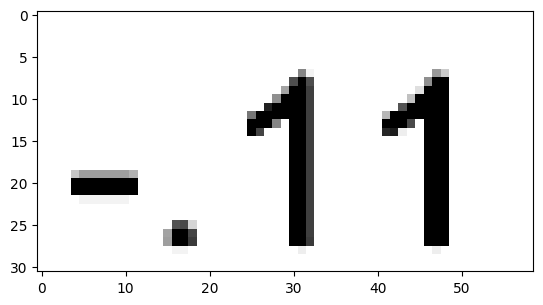

value = -0.14, value_ocr = -0.11


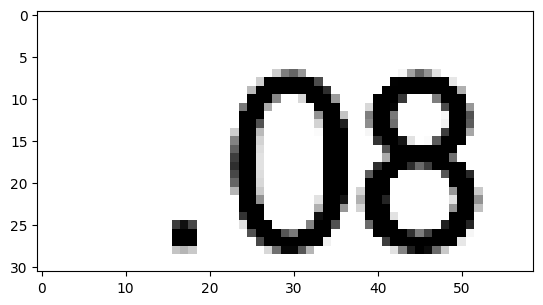

value = 0.06, value_ocr = 0.08


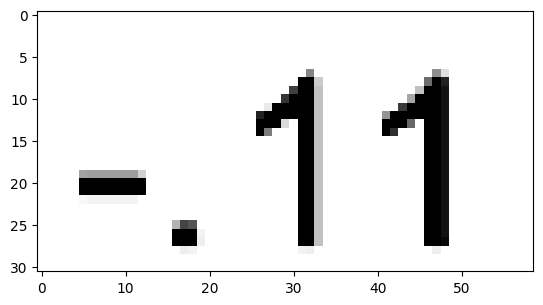

value = -0.14, value_ocr = -0.11


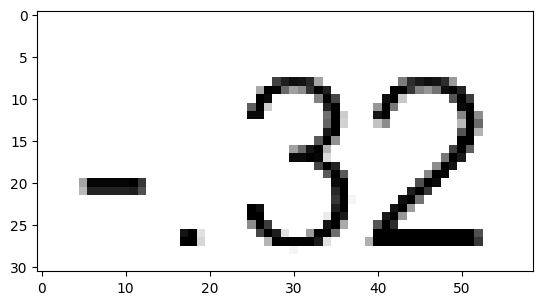

value = -0.57, value_ocr = -0.32


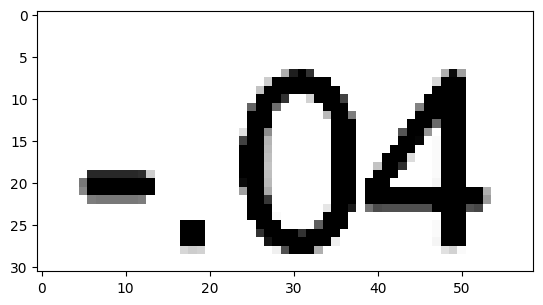

value = -0.04, value_ocr = -0.04


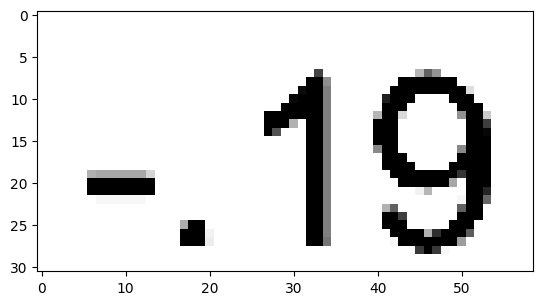

value = -0.27, value_ocr = None


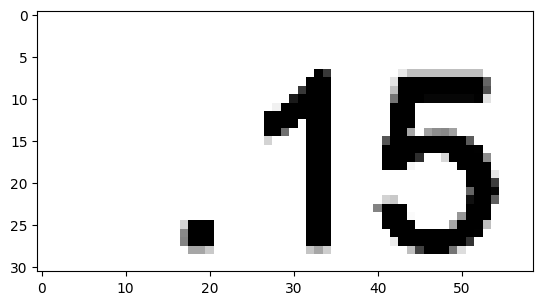

value = 0.12, value_ocr = None


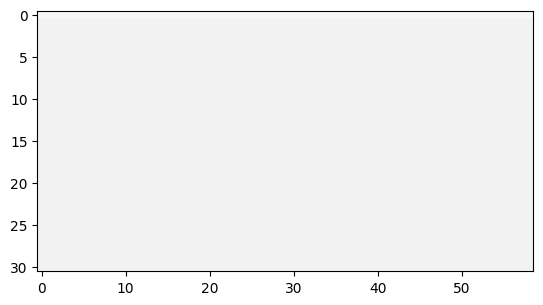

value = -0.0, value_ocr = None


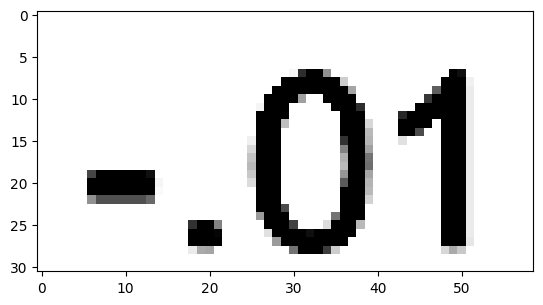

value = -0.02, value_ocr = -0.01


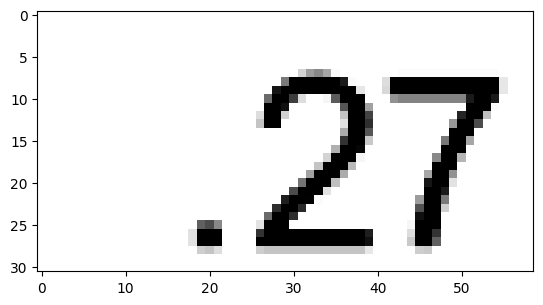

value = 0.29, value_ocr = 0.27


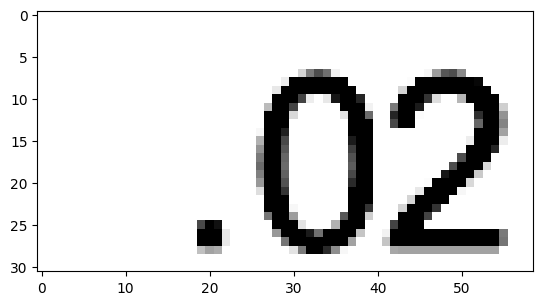

value = 0.01, value_ocr = 0.02


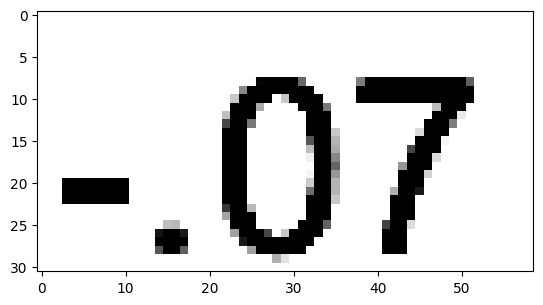

value = -0.09, value_ocr = -0.07


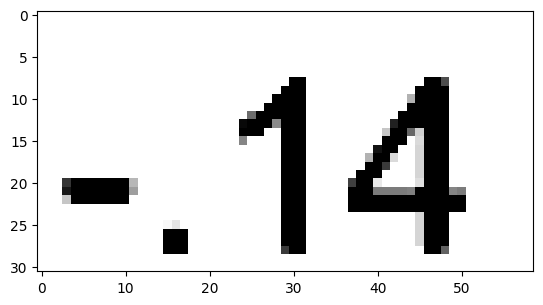

value = -0.19, value_ocr = None


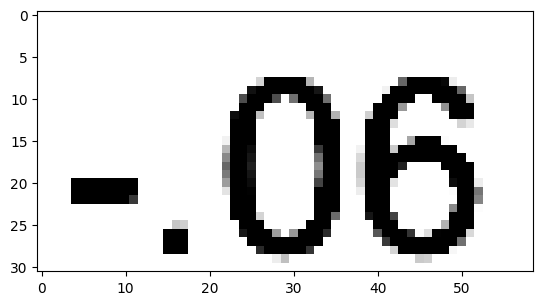

value = -0.08, value_ocr = -0.06


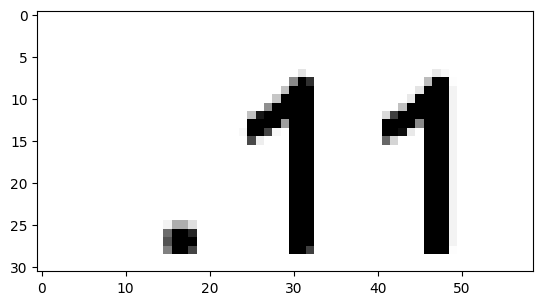

value = 0.09, value_ocr = 0.11


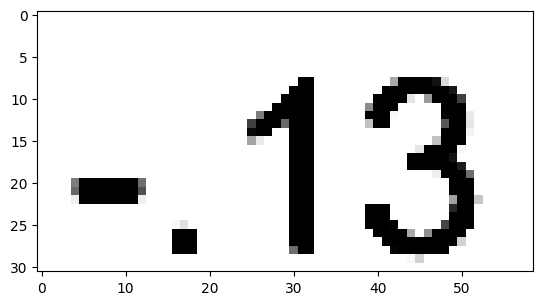

value = -0.18, value_ocr = -0.13


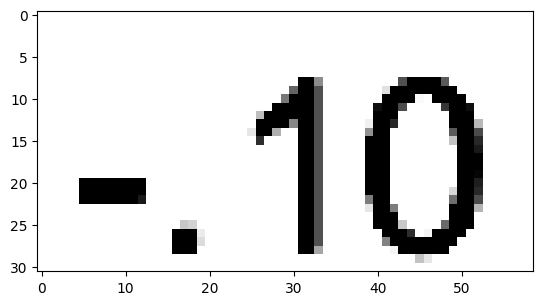

value = -0.13, value_ocr = -0.1


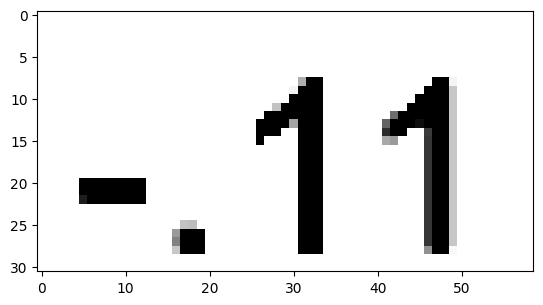

value = -0.14, value_ocr = -0.11


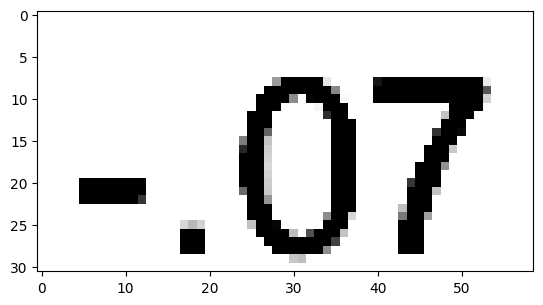

value = -0.09, value_ocr = -0.07


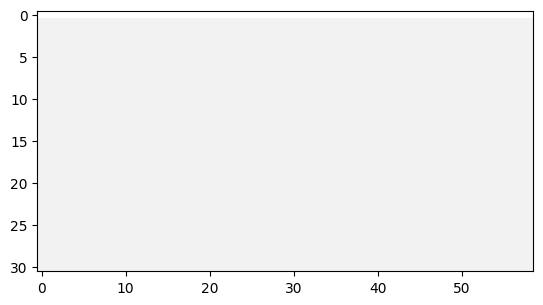

value = -0.0, value_ocr = None


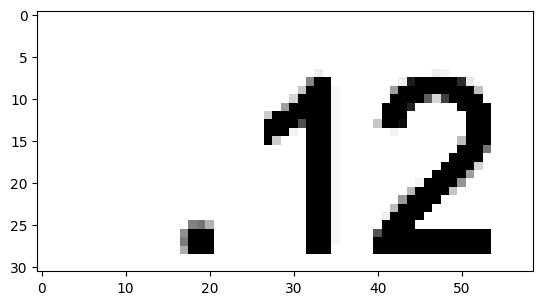

value = 0.1, value_ocr = None


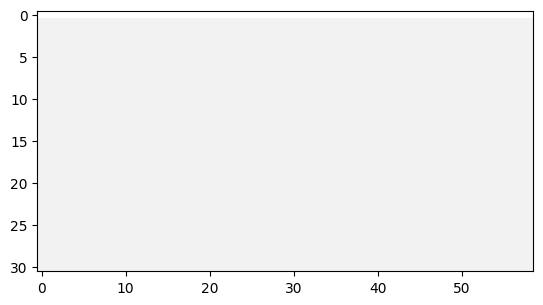

value = -0.0, value_ocr = None


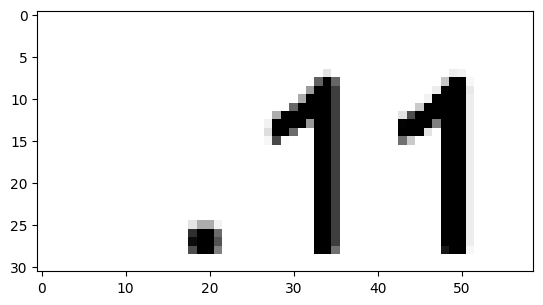

value = 0.09, value_ocr = 0.11


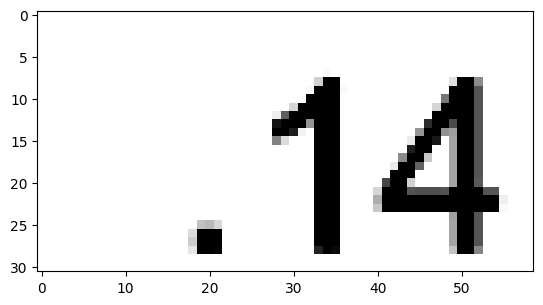

value = 0.12, value_ocr = 0.14


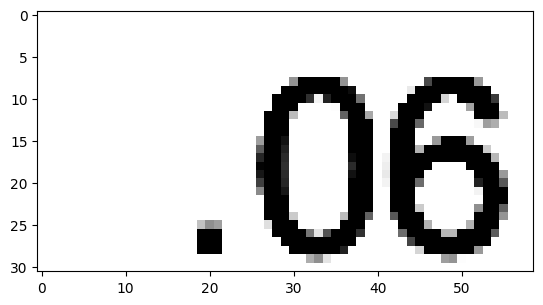

value = 0.05, value_ocr = 0.06


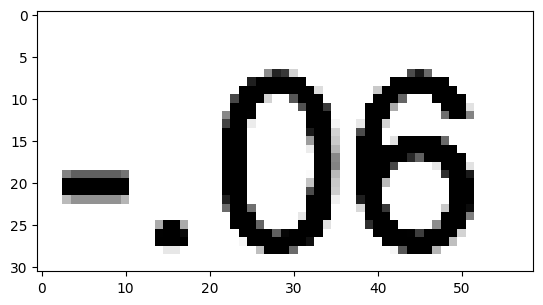

value = -0.08, value_ocr = -0.06


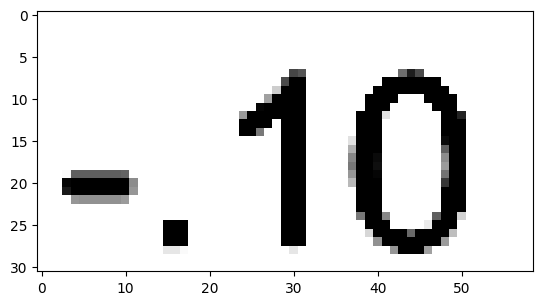

value = -0.13, value_ocr = None


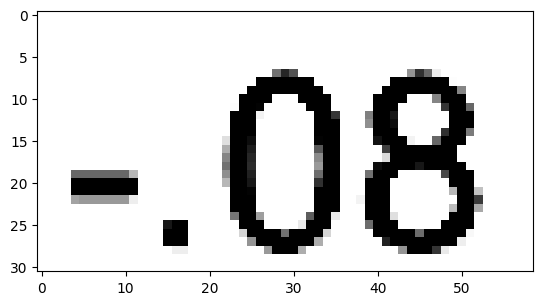

value = -0.1, value_ocr = -0.08


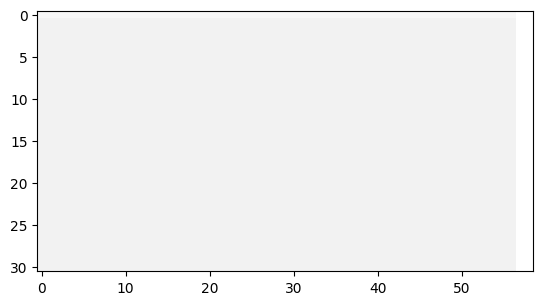

value = -0.0, value_ocr = None


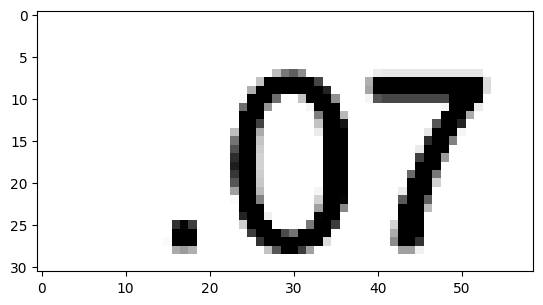

value = 0.05, value_ocr = 0.07


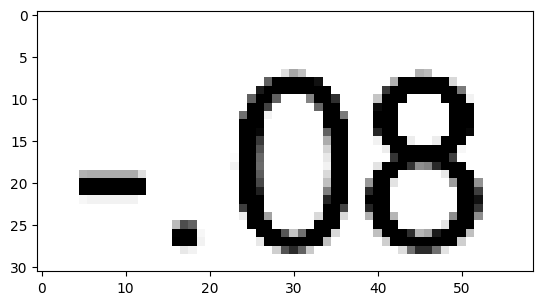

value = -0.1, value_ocr = -0.08


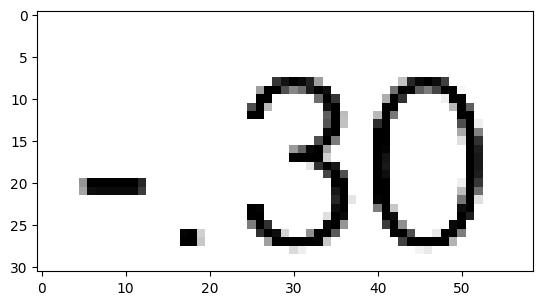

value = -0.52, value_ocr = -0.3


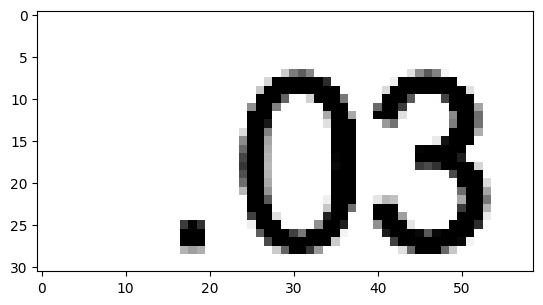

value = 0.02, value_ocr = 0.03


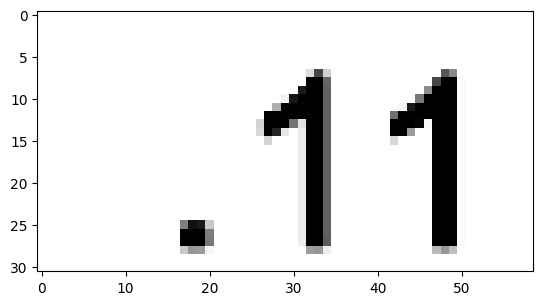

value = 0.1, value_ocr = None


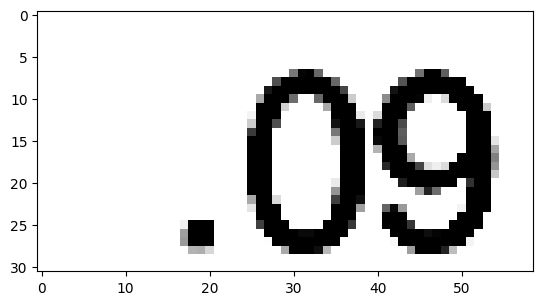

value = 0.07, value_ocr = 0.09


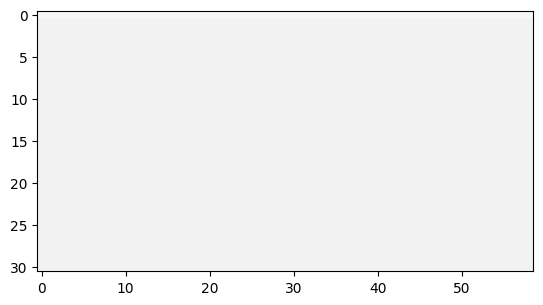

value = -0.0, value_ocr = None


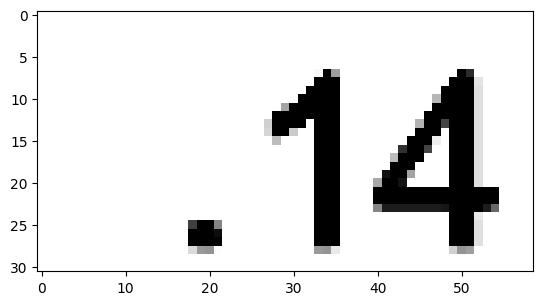

value = 0.12, value_ocr = 0.14


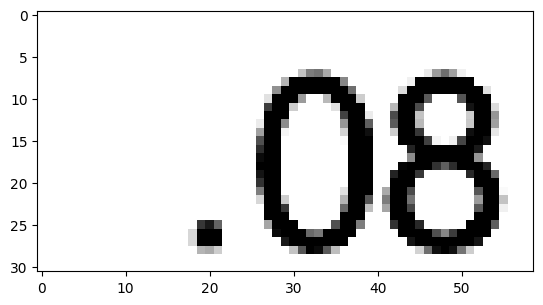

value = 0.06, value_ocr = 0.08


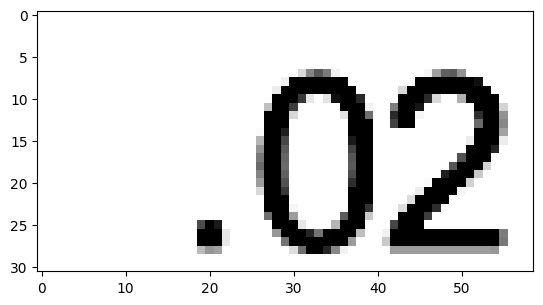

value = 0.02, value_ocr = 0.02


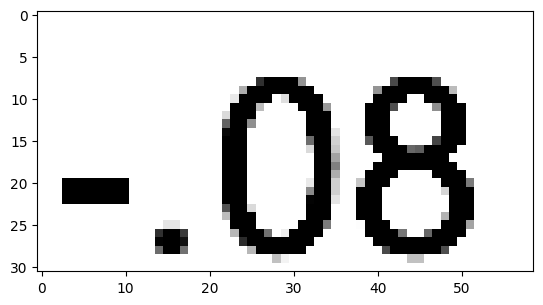

value = -0.1, value_ocr = -0.08


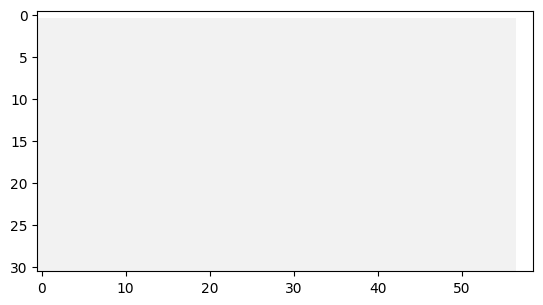

value = -0.0, value_ocr = None


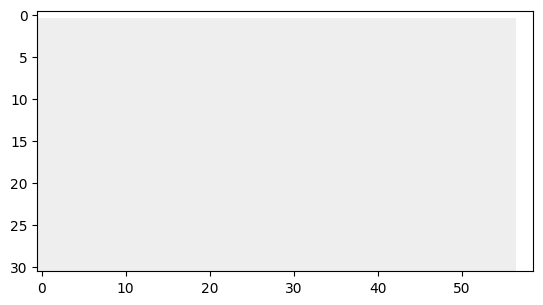

value = -0.0, value_ocr = None


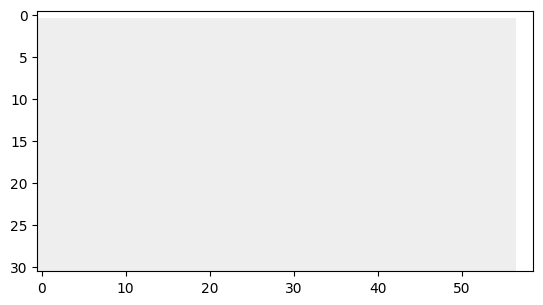

value = -0.0, value_ocr = None


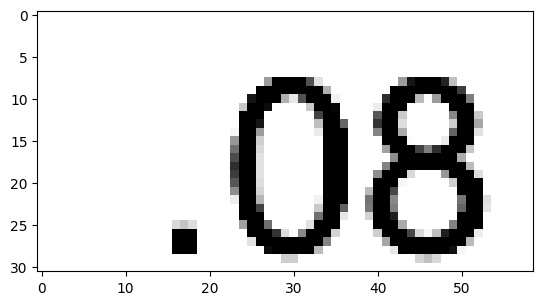

value = 0.06, value_ocr = 0.08


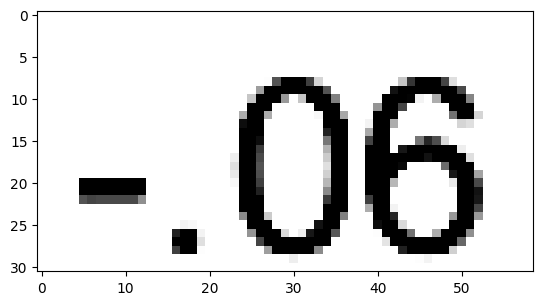

value = -0.07, value_ocr = -0.06


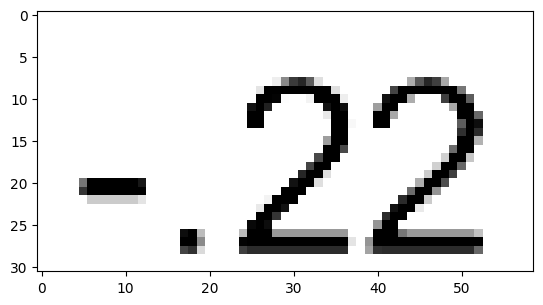

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.33, value_ocr = -0.22


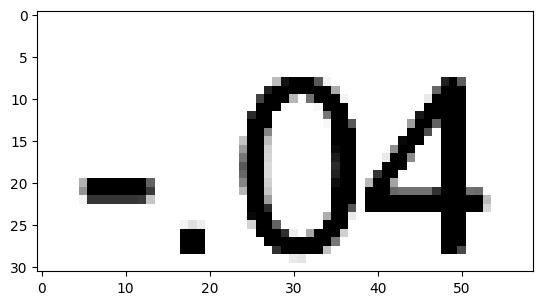

value = -0.05, value_ocr = -0.04


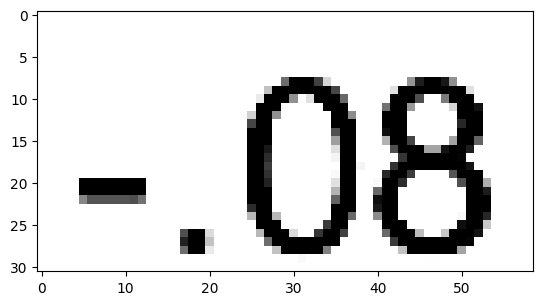

value = -0.09, value_ocr = -0.08


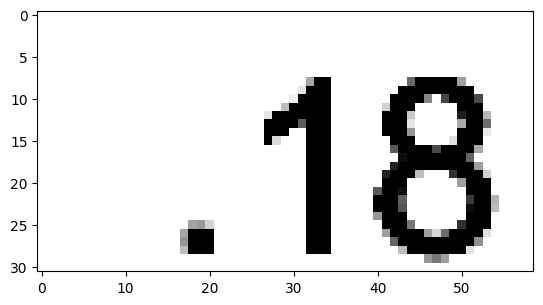

value = 0.17, value_ocr = None


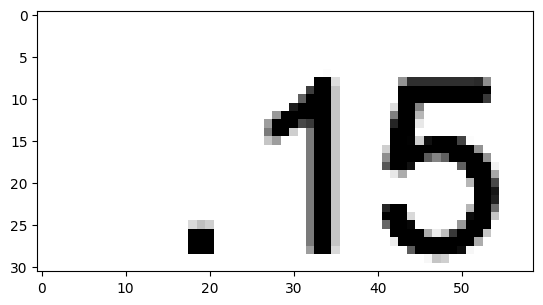

value = 0.13, value_ocr = None


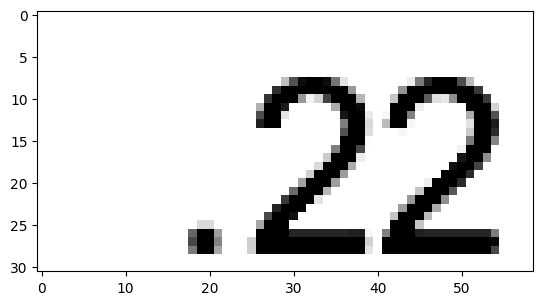

value = 0.22, value_ocr = 0.22


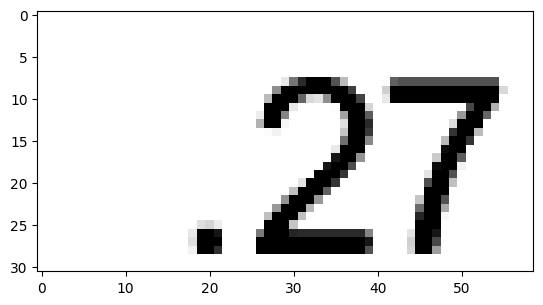

value = 0.29, value_ocr = 0.27


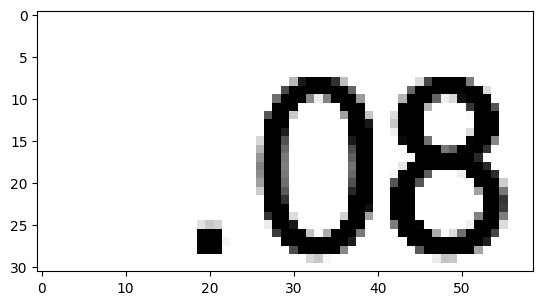

value = 0.07, value_ocr = 0.08


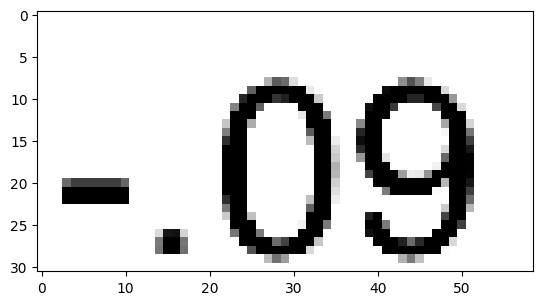

value = -0.11, value_ocr = -0.09


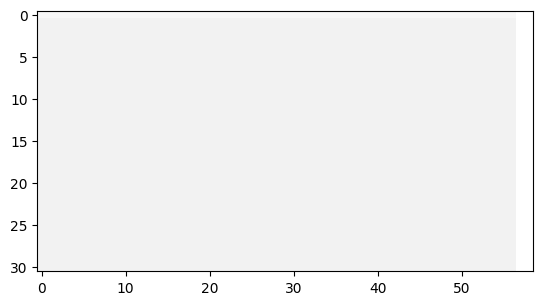

value = -0.0, value_ocr = None


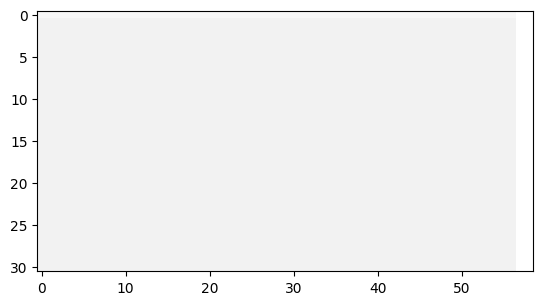

value = -0.0, value_ocr = None


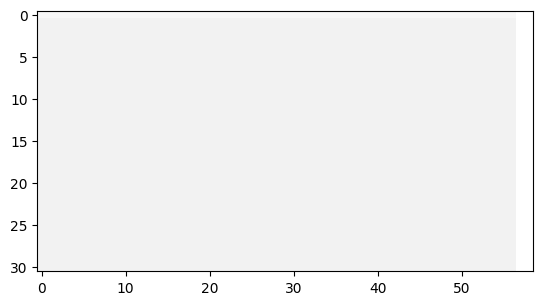

value = -0.0, value_ocr = None


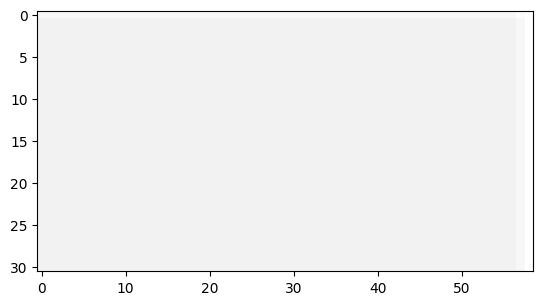

value = -0.0, value_ocr = None


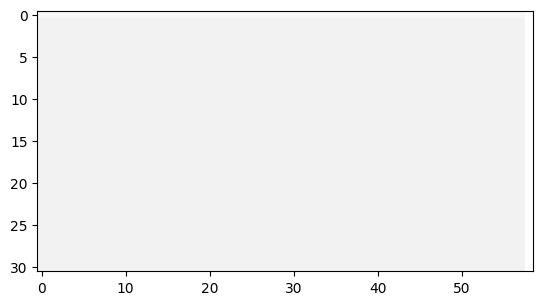

value = -0.0, value_ocr = None


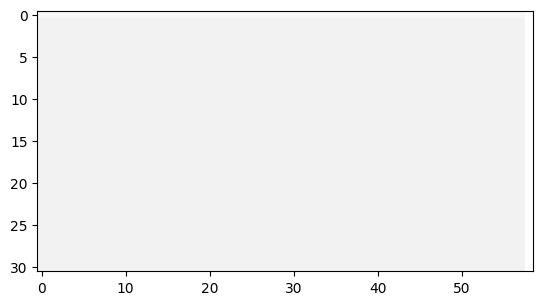

value = -0.0, value_ocr = None


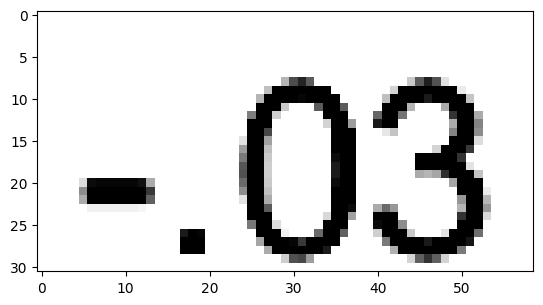

value = -0.03, value_ocr = -0.03


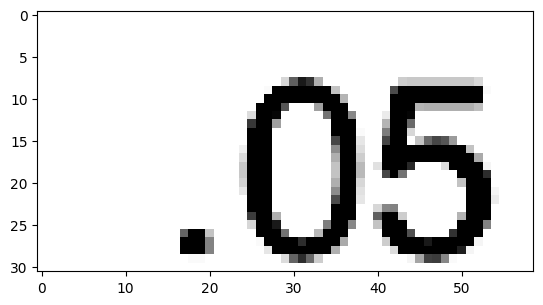

value = 0.04, value_ocr = 0.05


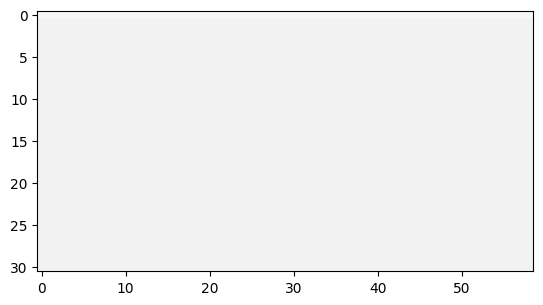

value = -0.0, value_ocr = None


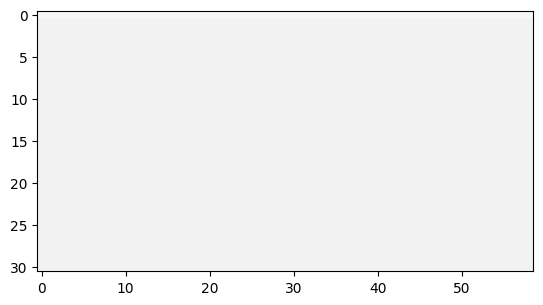

value = -0.0, value_ocr = None


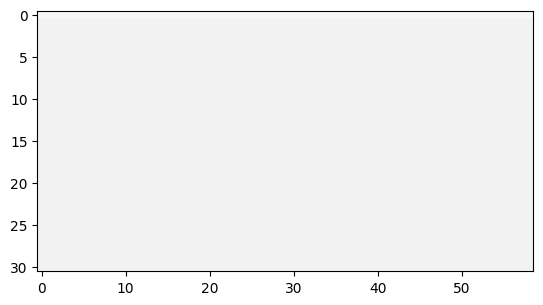

value = -0.0, value_ocr = None


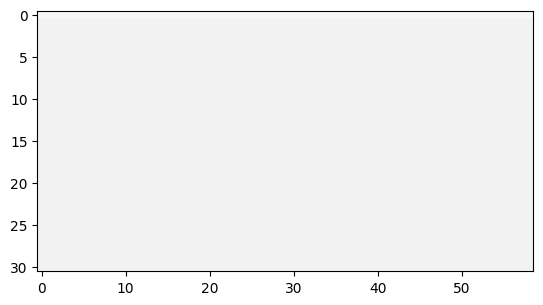

value = -0.0, value_ocr = None


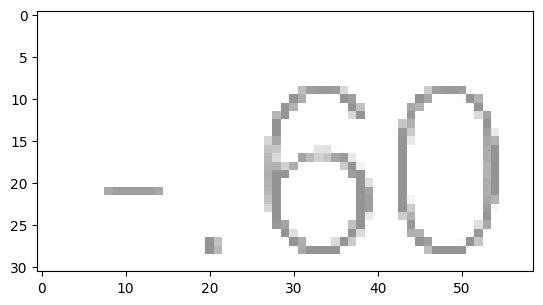

value = -1.36, value_ocr = -0.6


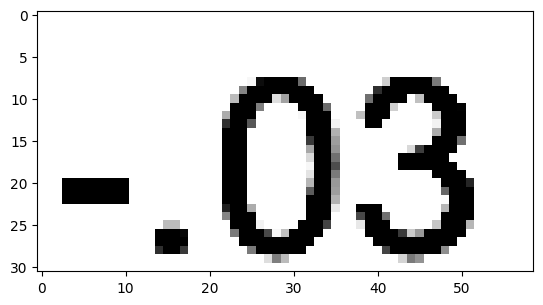

value = -0.04, value_ocr = -0.03


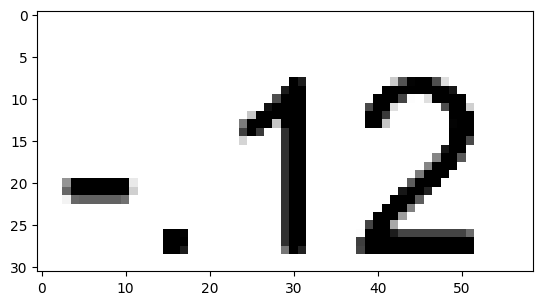

value = -0.16, value_ocr = None


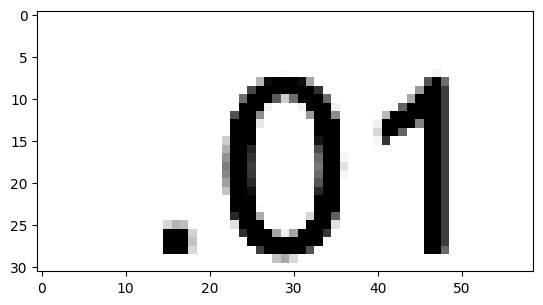

value = 0.01, value_ocr = 0.01


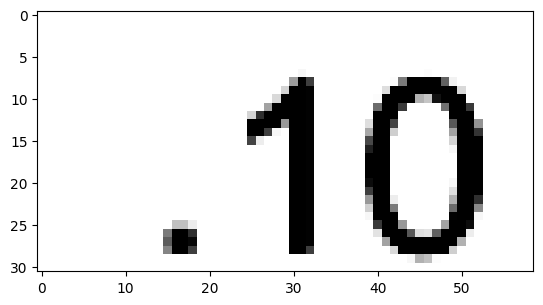

value = 0.08, value_ocr = 0.1


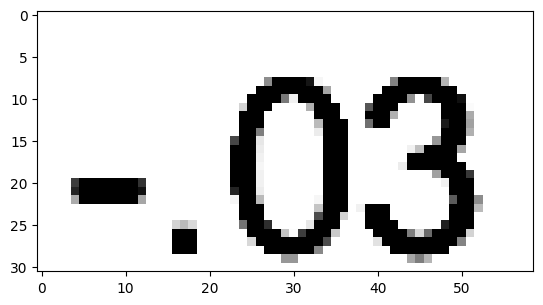

value = -0.04, value_ocr = -0.03


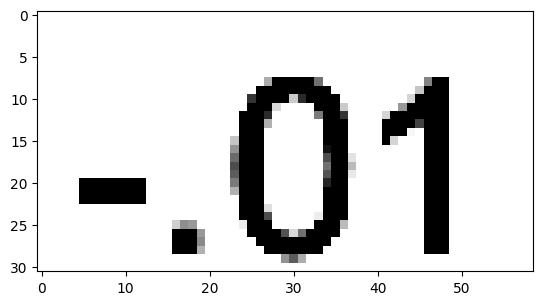

value = -0.0, value_ocr = -0.01


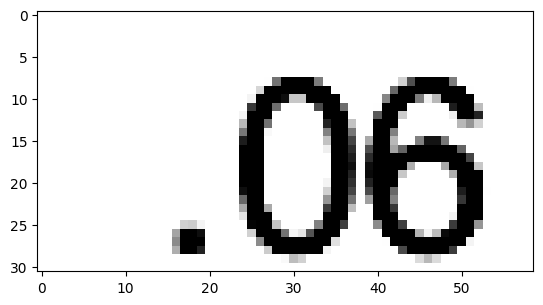

value = 0.05, value_ocr = 0.06


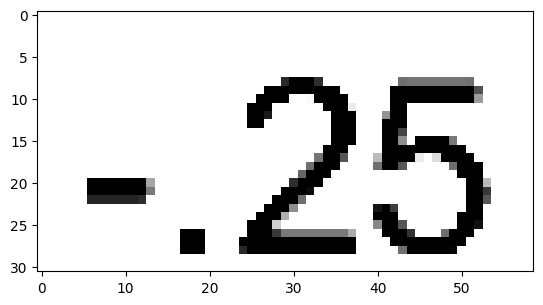

value = -0.39, value_ocr = -0.25


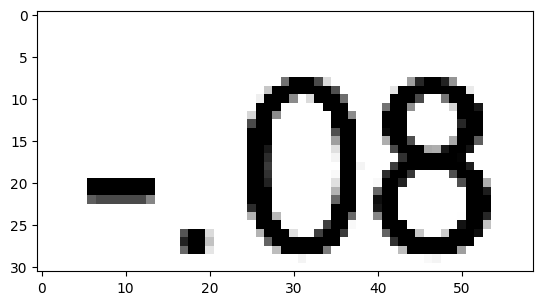

value = -0.1, value_ocr = -0.08


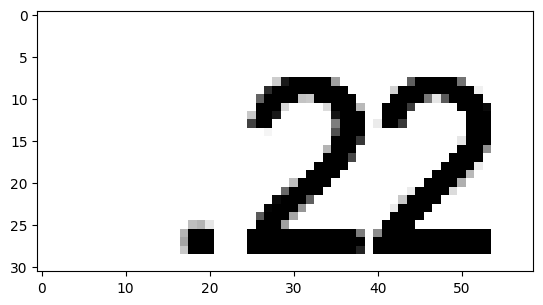

value = 0.21, value_ocr = 0.22


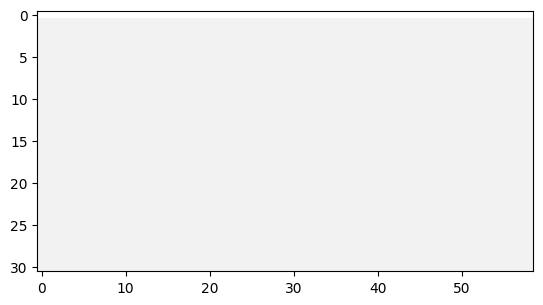

value = -0.0, value_ocr = None


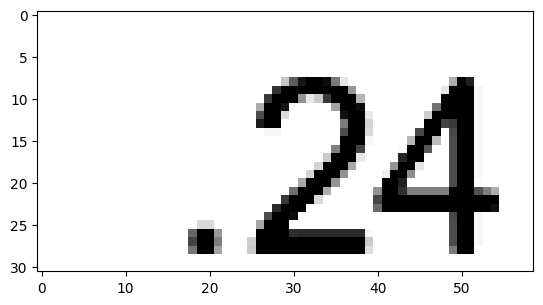

value = 0.24, value_ocr = 0.24


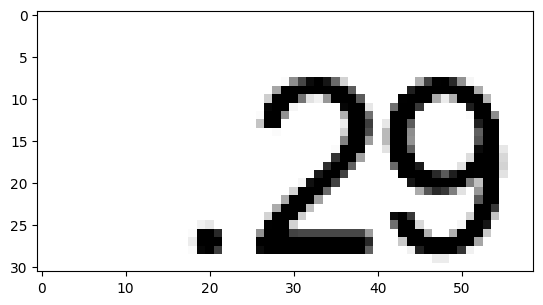

value = 0.32, value_ocr = 0.29


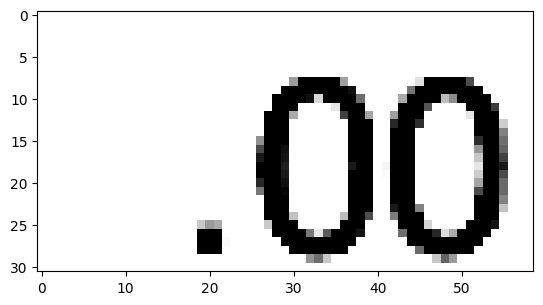

value = -0.0, value_ocr = 0.0


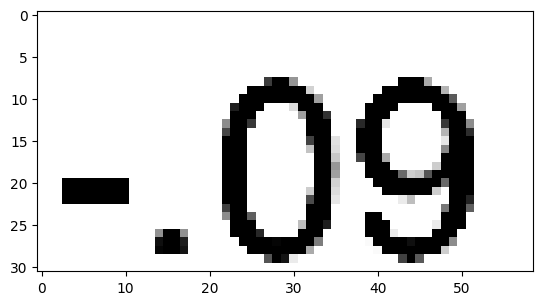

value = -0.11, value_ocr = -0.09


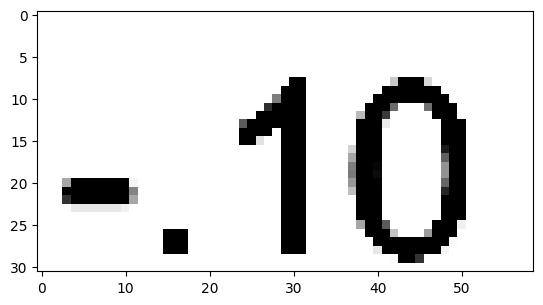

value = -0.12, value_ocr = None


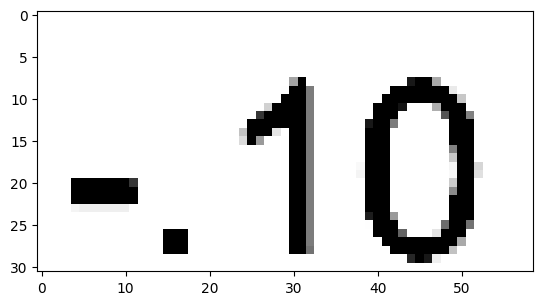

value = -0.13, value_ocr = -0.1


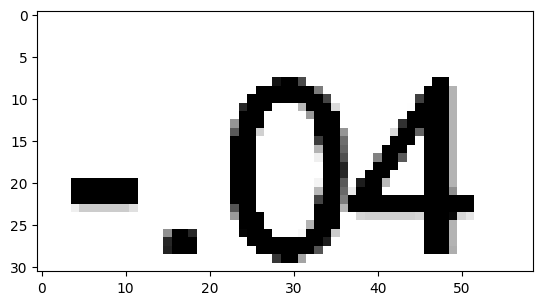

value = -0.05, value_ocr = None


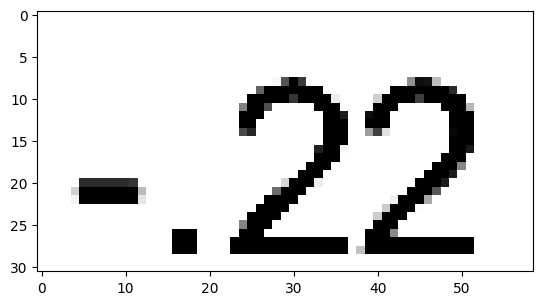

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.33, value_ocr = -0.22


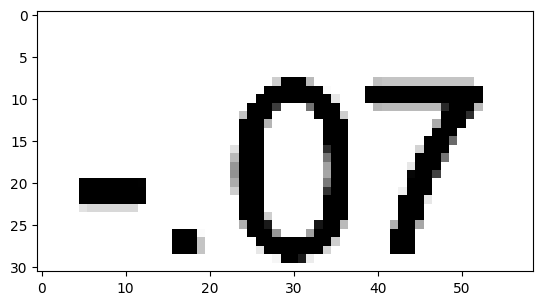

value = -0.09, value_ocr = -0.07


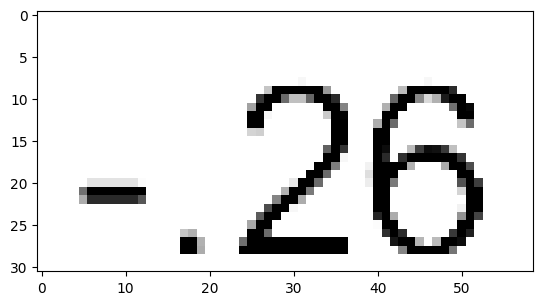

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.43, value_ocr = -0.26


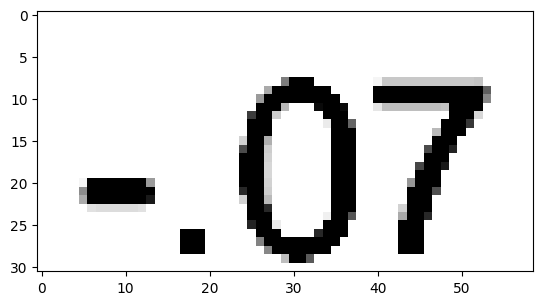

value = -0.09, value_ocr = -0.07


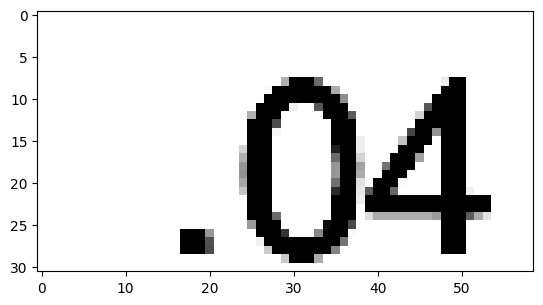

value = 0.03, value_ocr = 0.04


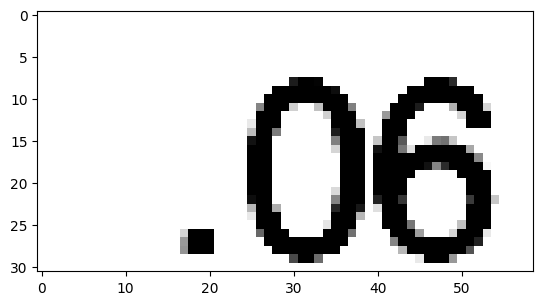

value = 0.05, value_ocr = 0.06


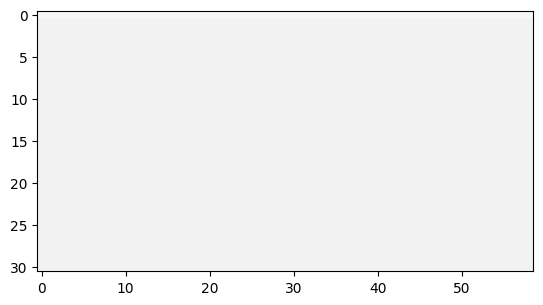

value = -0.0, value_ocr = None


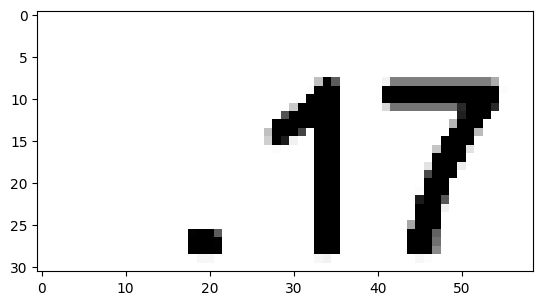

value = 0.15, value_ocr = 0.17


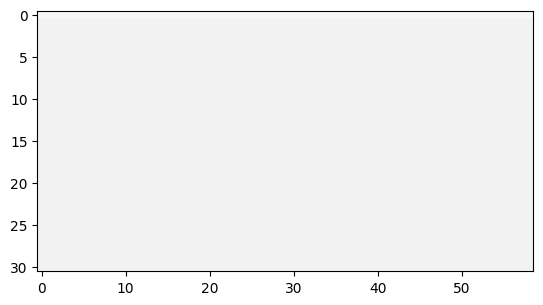

value = -0.0, value_ocr = None


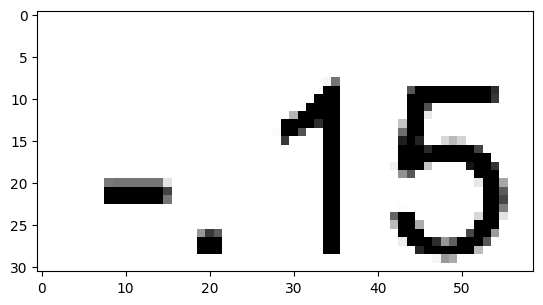

value = -0.19, value_ocr = -0.15


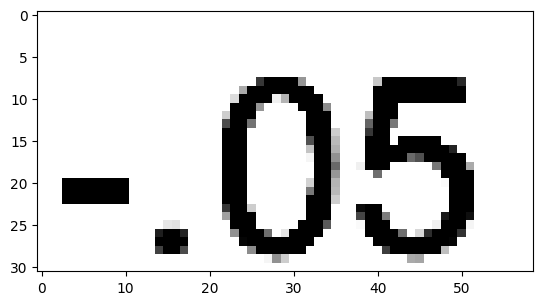

value = -0.07, value_ocr = -0.05


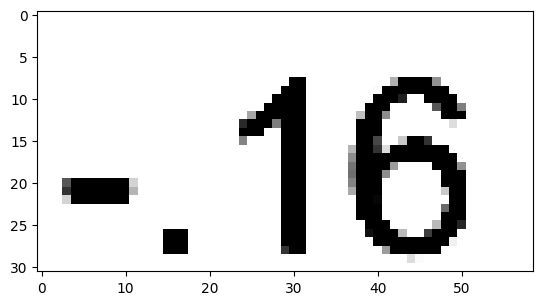

value = -0.22, value_ocr = None


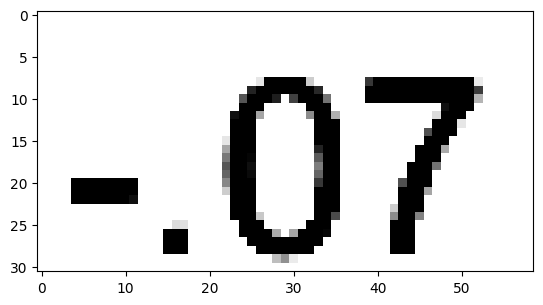

value = -0.09, value_ocr = -0.07


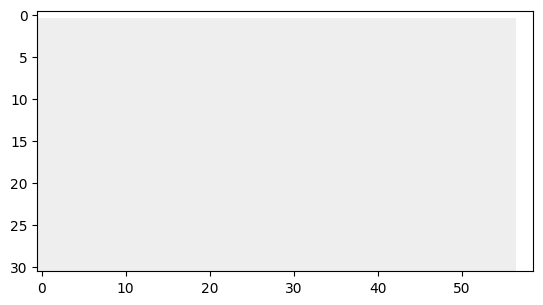

value = -0.0, value_ocr = None


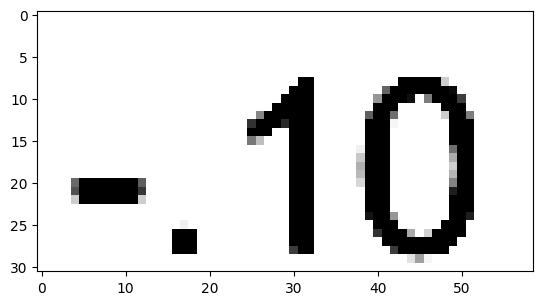

value = -0.13, value_ocr = -0.1


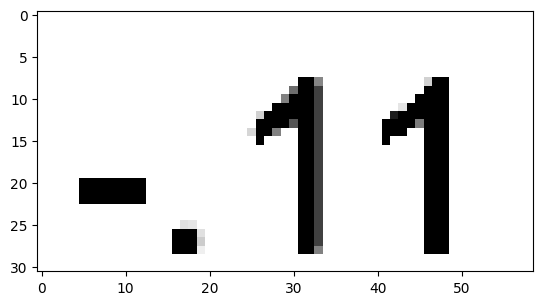

value = -0.14, value_ocr = -0.11


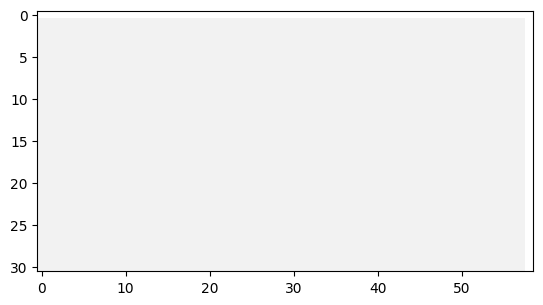

value = -0.0, value_ocr = None


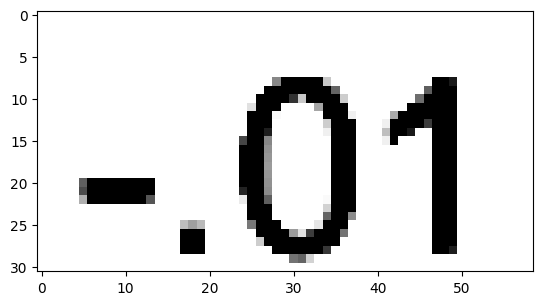

value = -0.01, value_ocr = -0.01


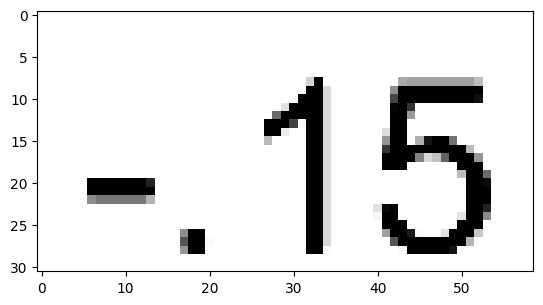

value = -0.21, value_ocr = None


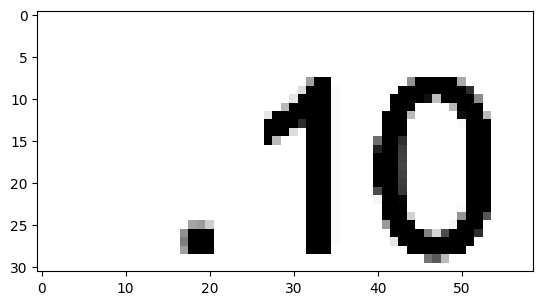

value = 0.09, value_ocr = None


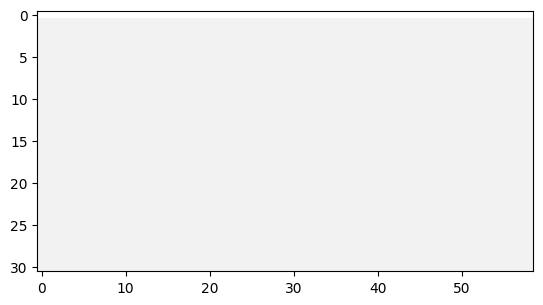

value = -0.0, value_ocr = None


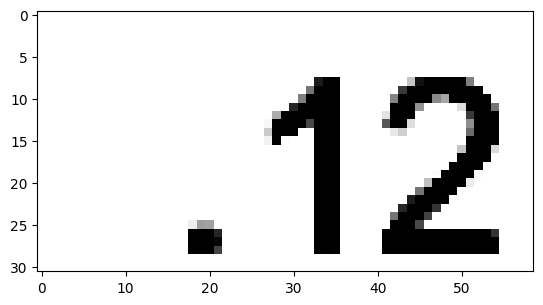

value = 0.1, value_ocr = 0.12


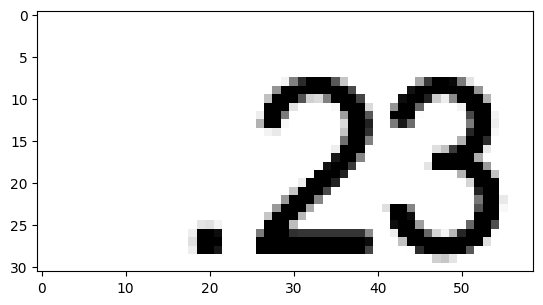

value = 0.23, value_ocr = 0.23


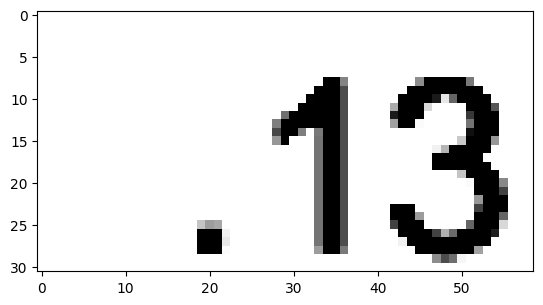

value = 0.11, value_ocr = 0.13


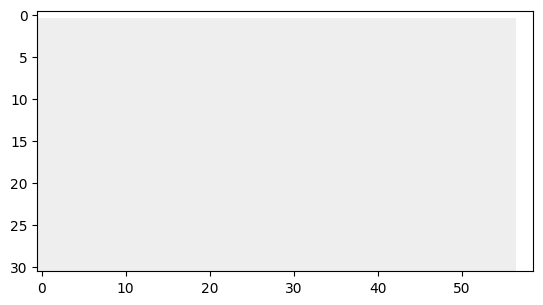

value = -0.0, value_ocr = None


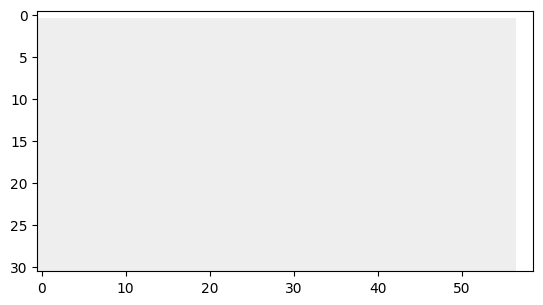

value = -0.0, value_ocr = None


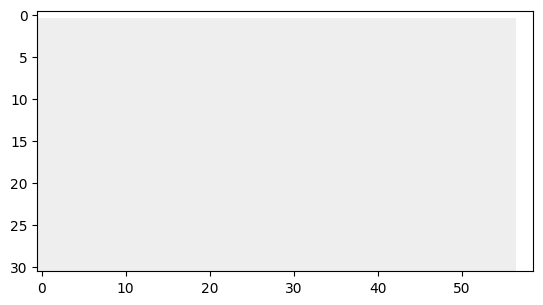

value = -0.0, value_ocr = None


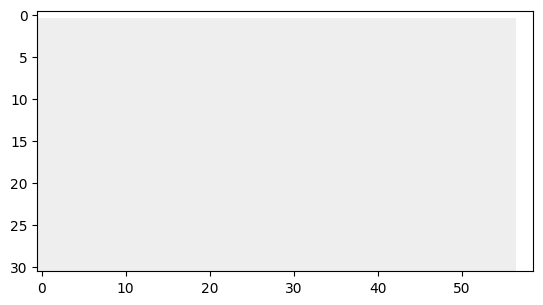

value = -0.0, value_ocr = None


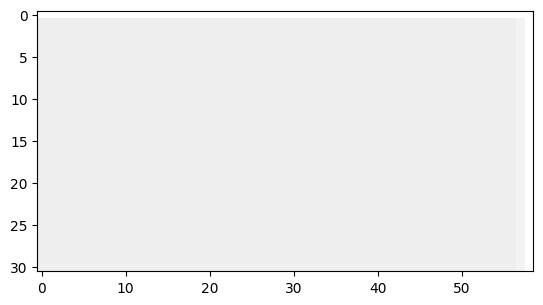

value = -0.0, value_ocr = None


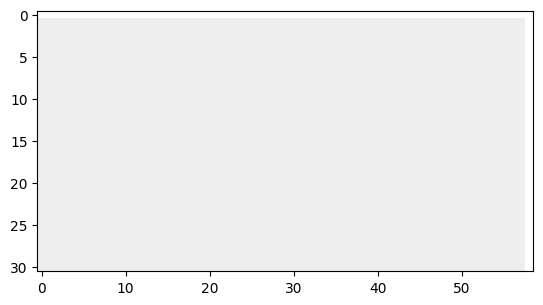

value = -0.0, value_ocr = None


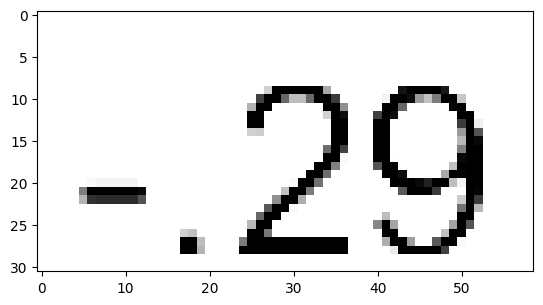

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.49, value_ocr = -0.29


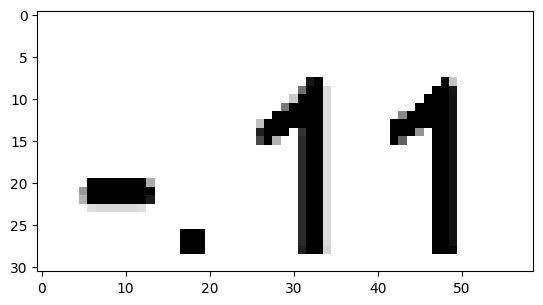

value = -0.15, value_ocr = -0.11


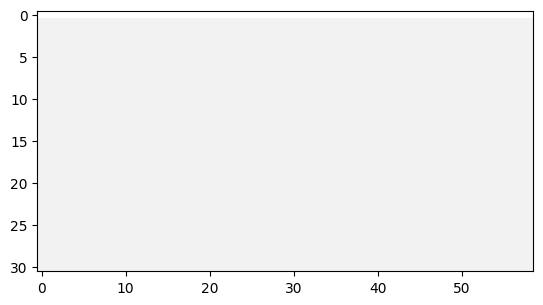

value = -0.0, value_ocr = None


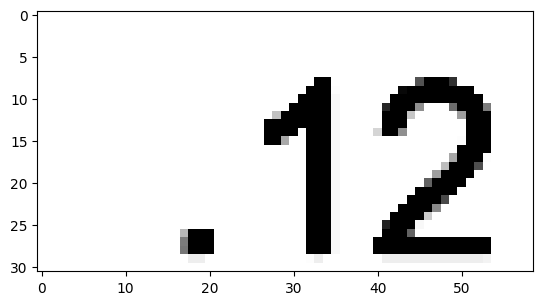

value = 0.1, value_ocr = None


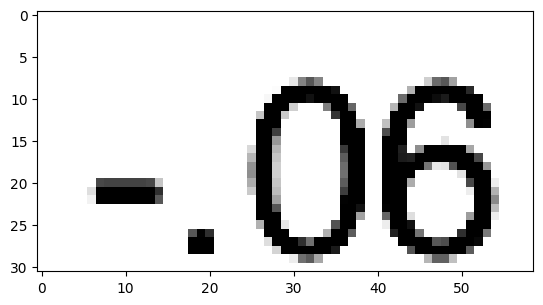

value = -0.08, value_ocr = -0.06


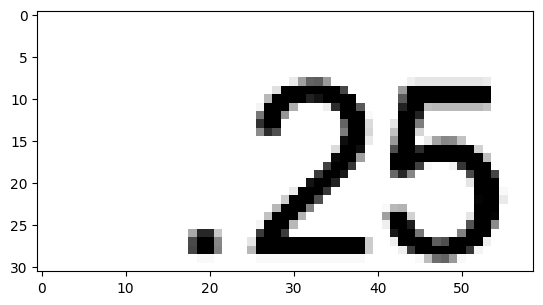

value = 0.26, value_ocr = 0.25


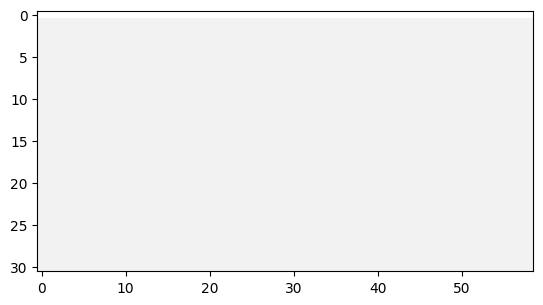

value = -0.0, value_ocr = None


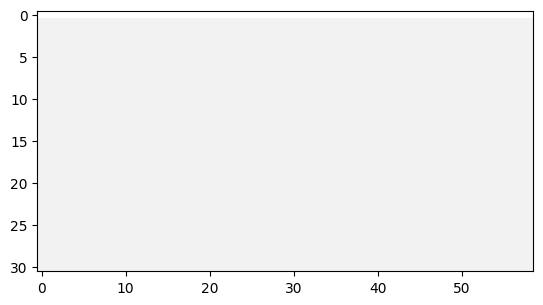

value = -0.0, value_ocr = None


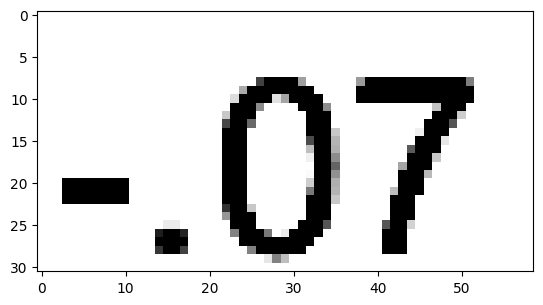

value = -0.09, value_ocr = -0.07


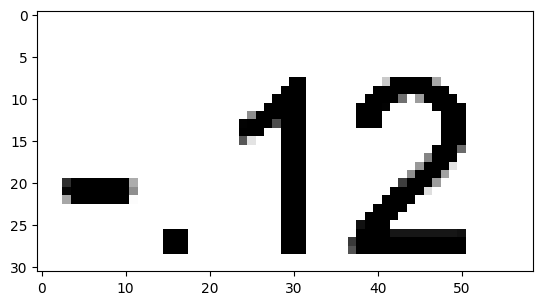

value = -0.16, value_ocr = None


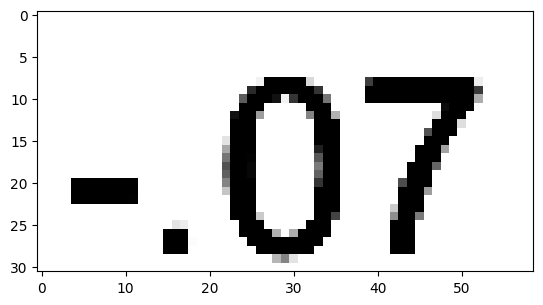

value = -0.08, value_ocr = -0.07


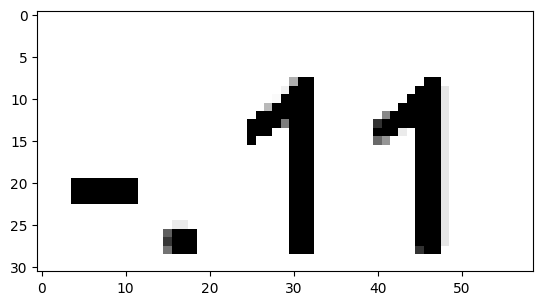

value = -0.14, value_ocr = -0.11


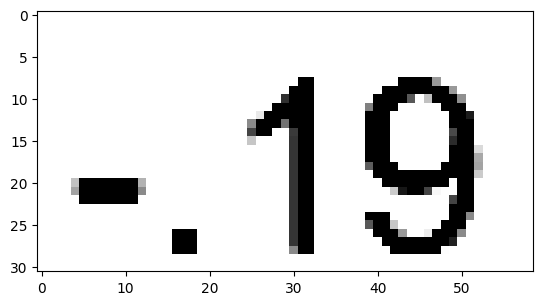

value = -0.29, value_ocr = -0.19


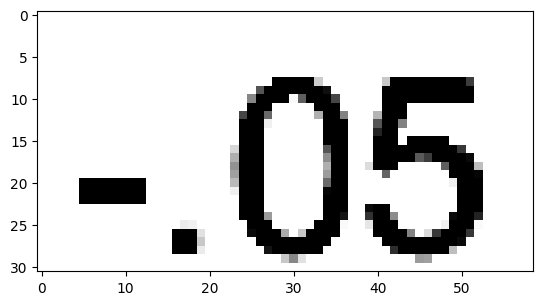

value = -0.07, value_ocr = -0.05


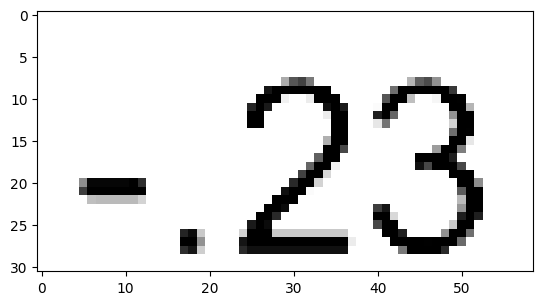

value = -0.36, value_ocr = -0.23


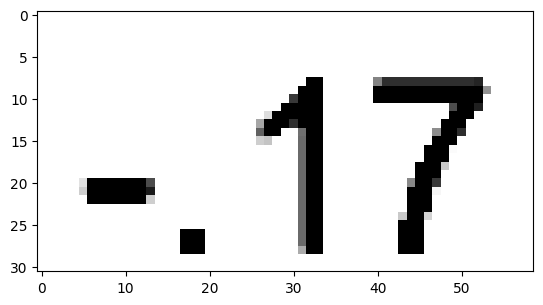

value = -0.25, value_ocr = -0.17


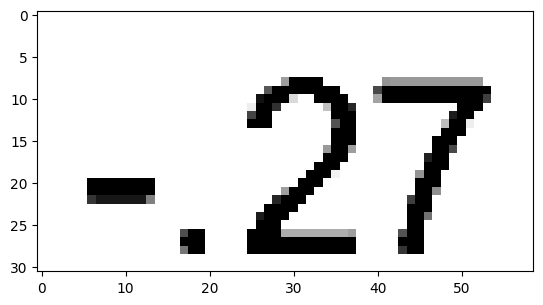

value = -0.46, value_ocr = -0.27


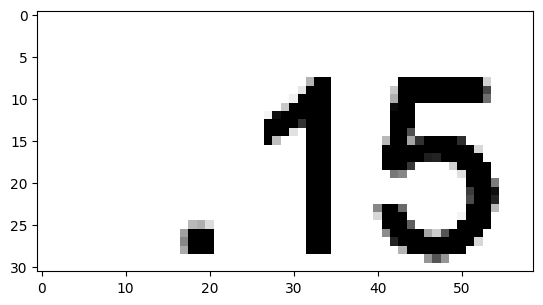

value = 0.14, value_ocr = None


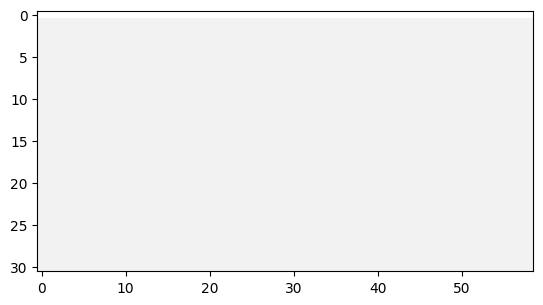

value = -0.0, value_ocr = None


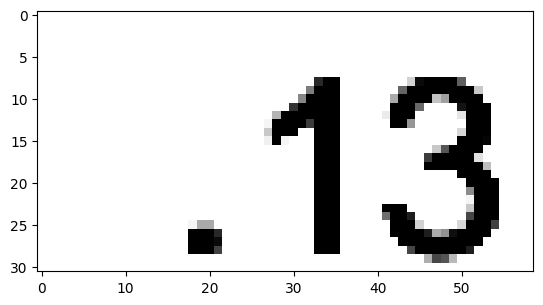

value = 0.11, value_ocr = 0.13


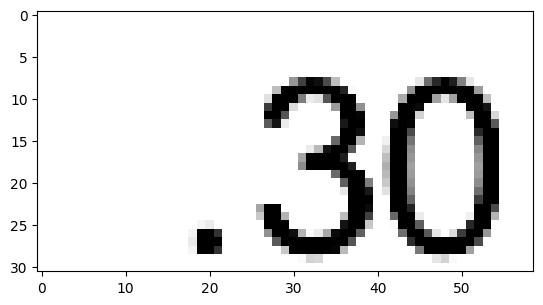

value = 0.34, value_ocr = 0.3


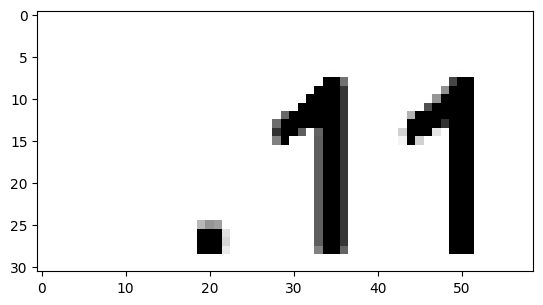

value = 0.09, value_ocr = 0.11


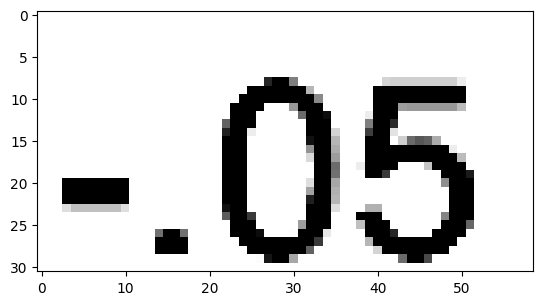

value = -0.06, value_ocr = -0.05


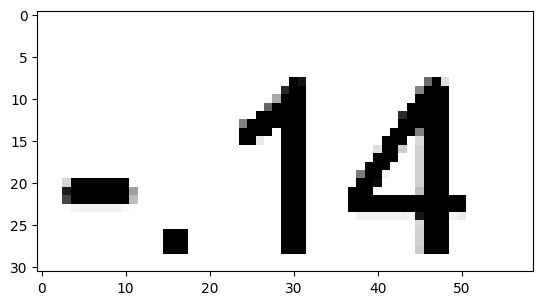

value = -0.19, value_ocr = None


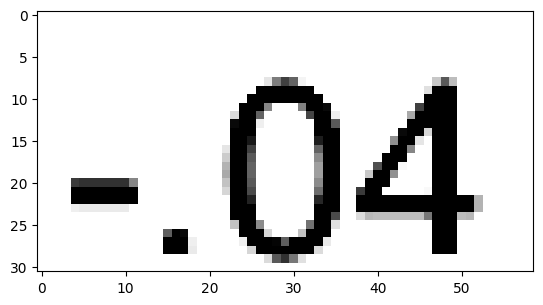

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.05, value_ocr = -0.4


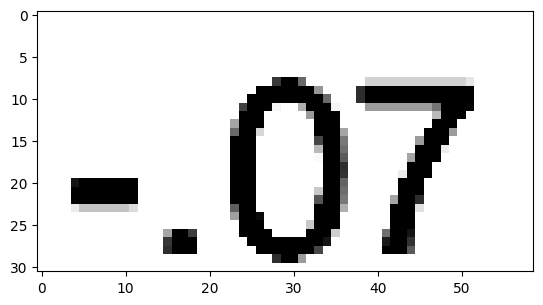

value = -0.09, value_ocr = -0.07


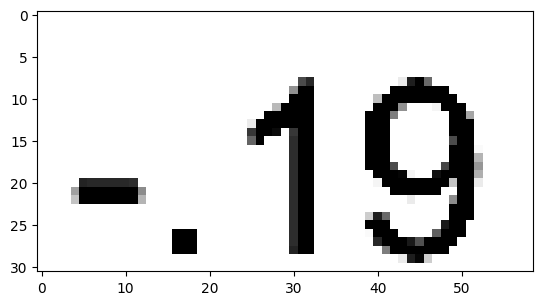

value = -0.27, value_ocr = -0.19


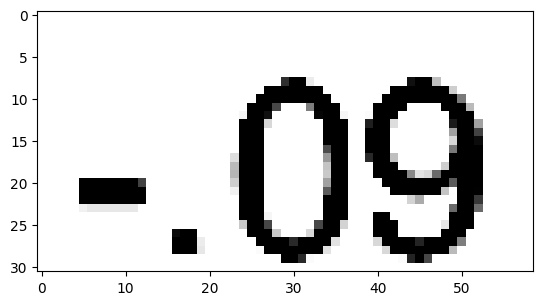

value = -0.11, value_ocr = -0.09


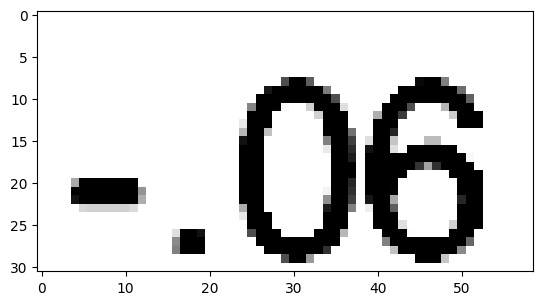

value = -0.07, value_ocr = -0.06


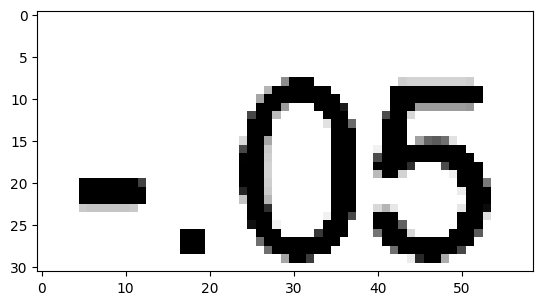

value = -0.06, value_ocr = -0.05


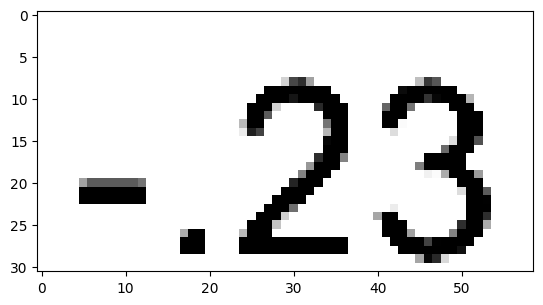

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.36, value_ocr = -0.23


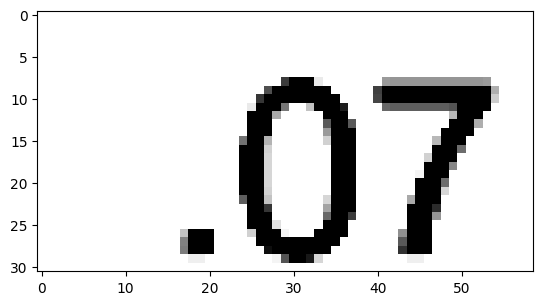

value = 0.06, value_ocr = 0.07


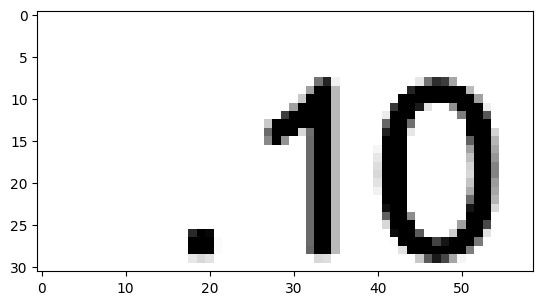

value = 0.09, value_ocr = None


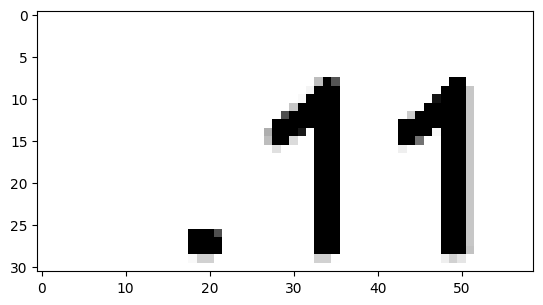

value = 0.1, value_ocr = 0.11


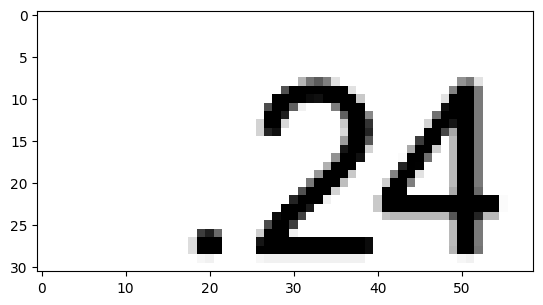

value = 0.24, value_ocr = 0.24


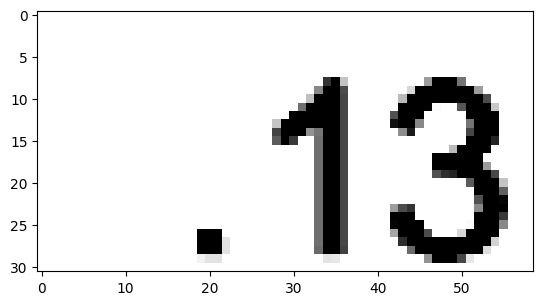

value = 0.11, value_ocr = 0.13


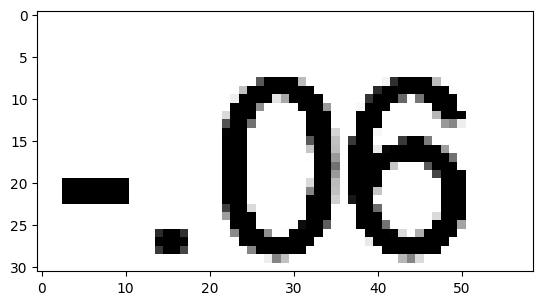

value = -0.07, value_ocr = -0.06


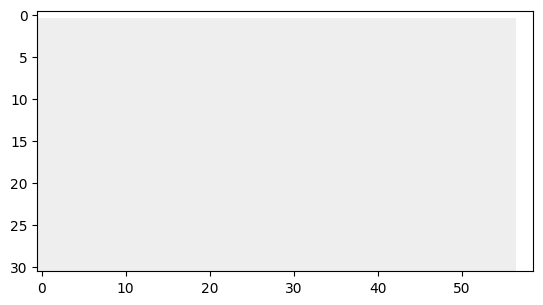

value = -0.0, value_ocr = None


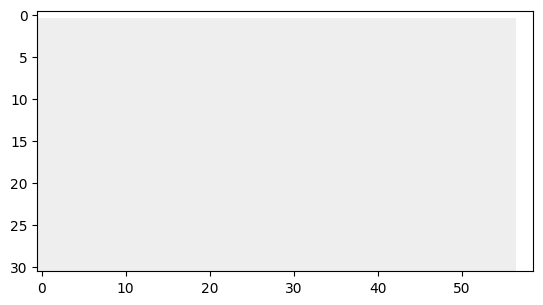

value = -0.0, value_ocr = None


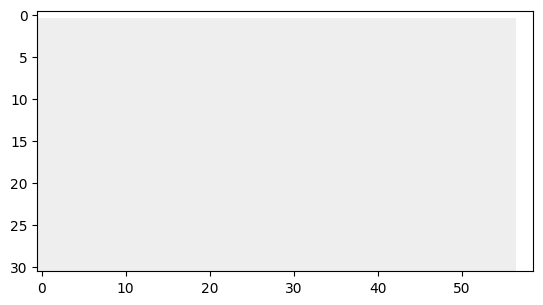

value = -0.0, value_ocr = None


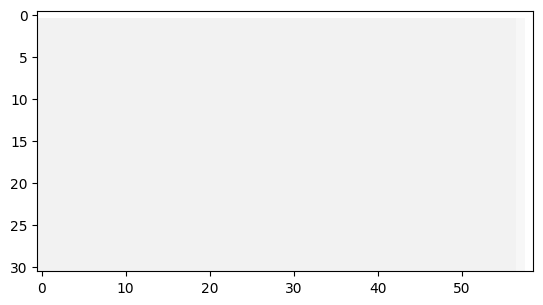

value = -0.0, value_ocr = None


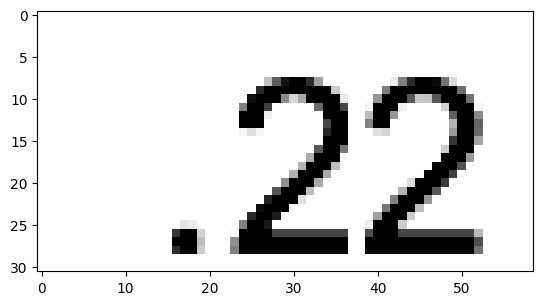

value = 0.22, value_ocr = 0.22


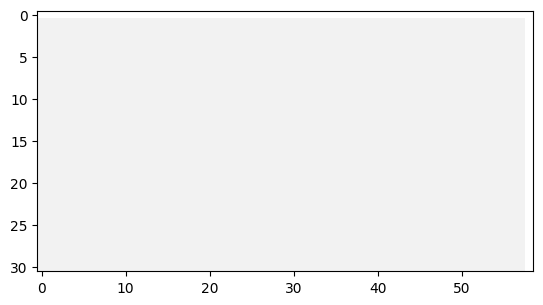

value = -0.0, value_ocr = None


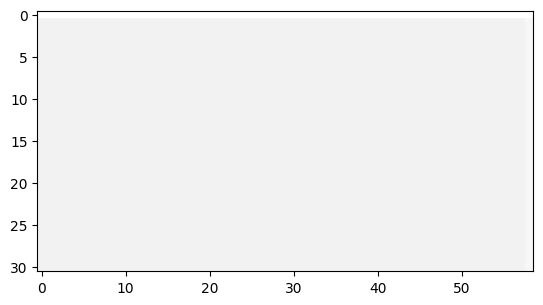

value = -0.0, value_ocr = None


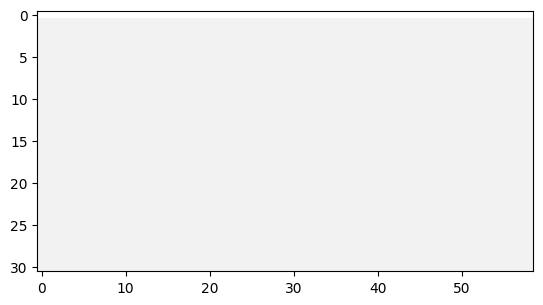

value = -0.0, value_ocr = None


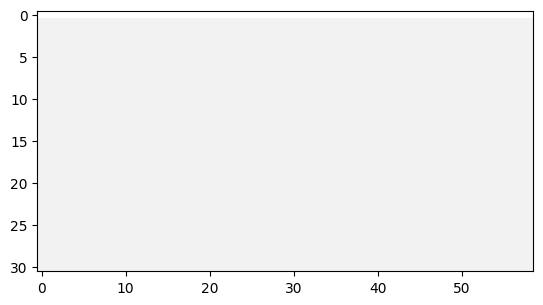

value = -0.0, value_ocr = None


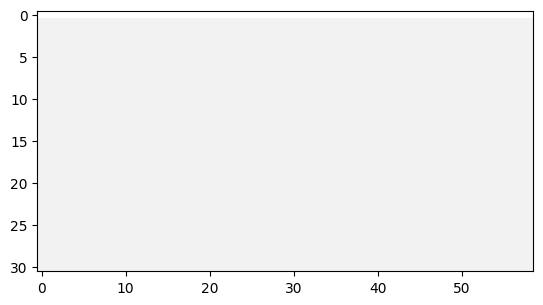

value = -0.0, value_ocr = None


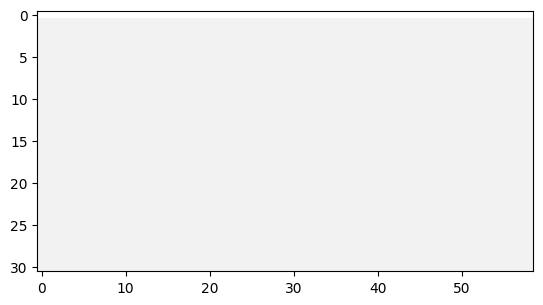

value = -0.0, value_ocr = None


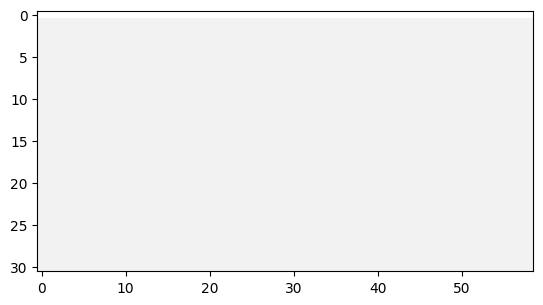

value = -0.0, value_ocr = None


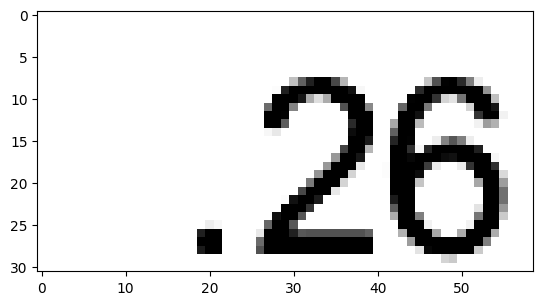

value = 0.27, value_ocr = 0.26


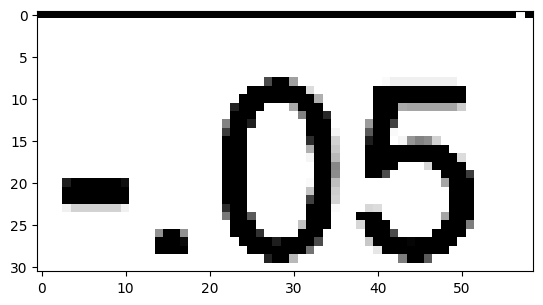

value = -0.06, value_ocr = -0.05


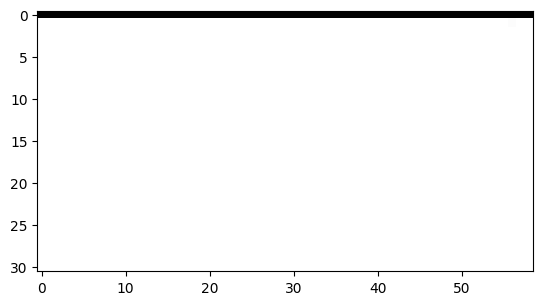

value = -0.0, value_ocr = None


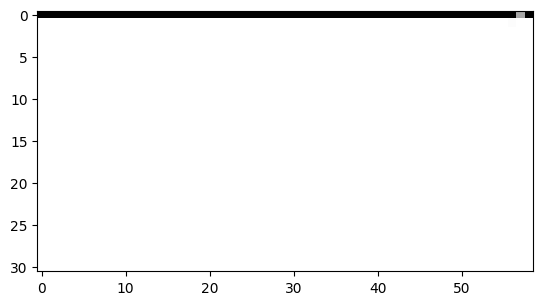

value = -0.0, value_ocr = None


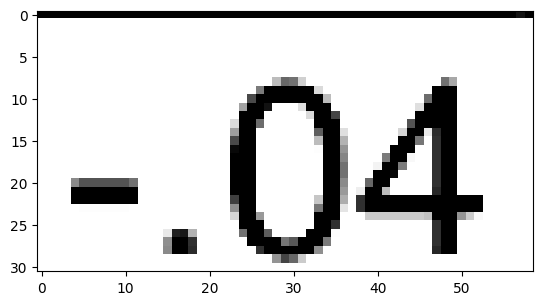

value = -0.05, value_ocr = None


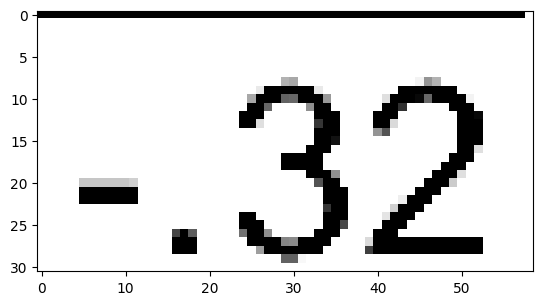

value = -0.56, value_ocr = None


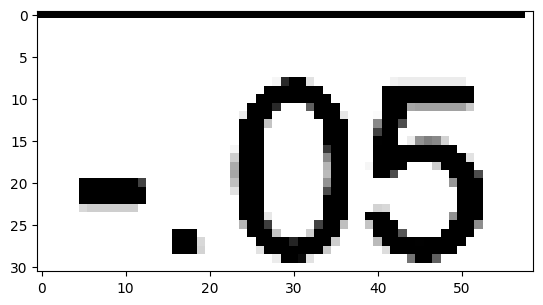

value = -0.05, value_ocr = -0.05


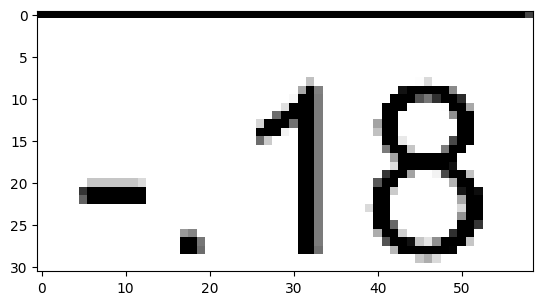

value = -0.25, value_ocr = None


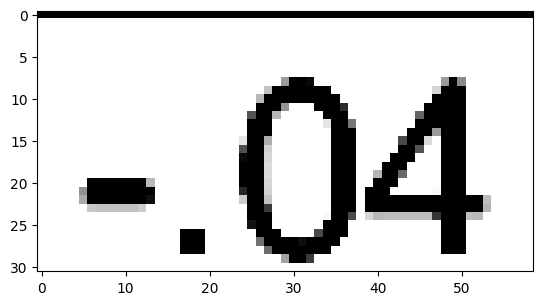

value = -0.05, value_ocr = None


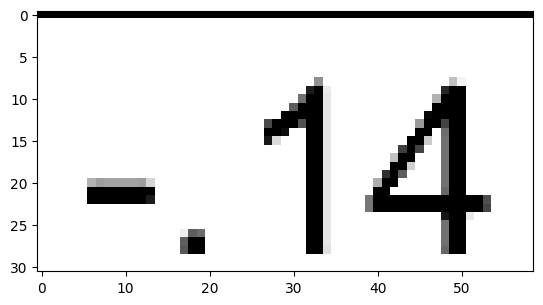

value = -0.18, value_ocr = None


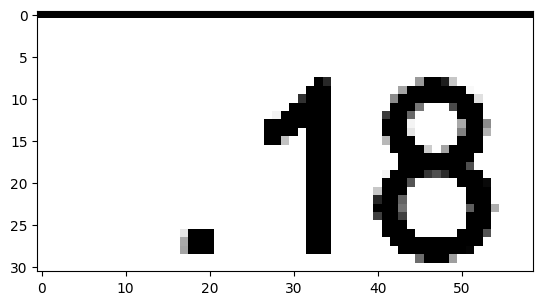

value = 0.16, value_ocr = None


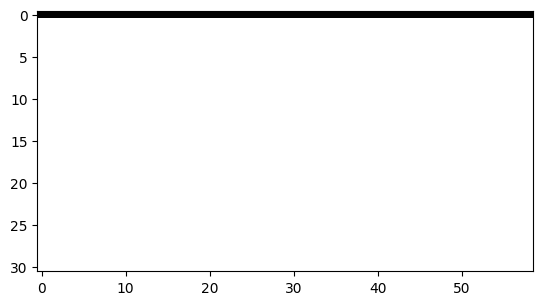

value = -0.0, value_ocr = None


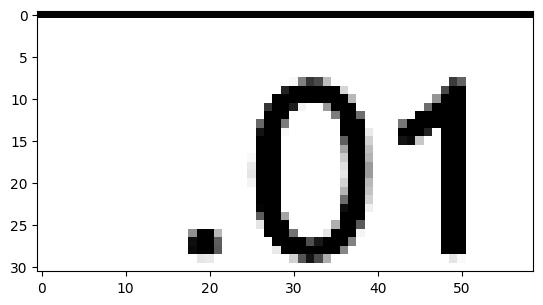

value = 0.01, value_ocr = None


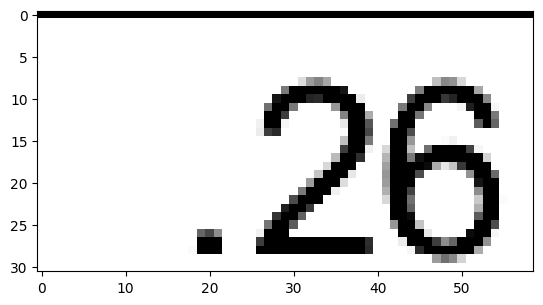

value = 0.27, value_ocr = 0.26


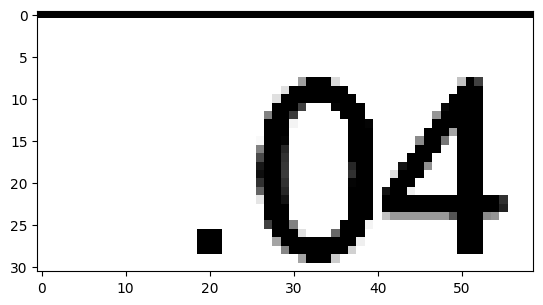

value = 0.03, value_ocr = None


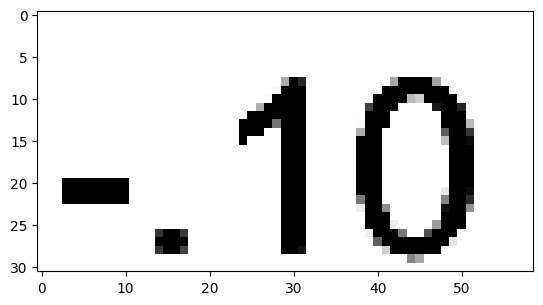

value = -0.12, value_ocr = None


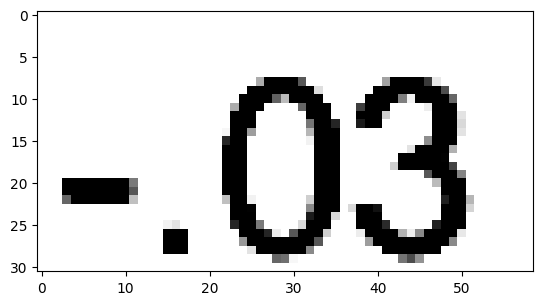

value = -0.03, value_ocr = -0.03


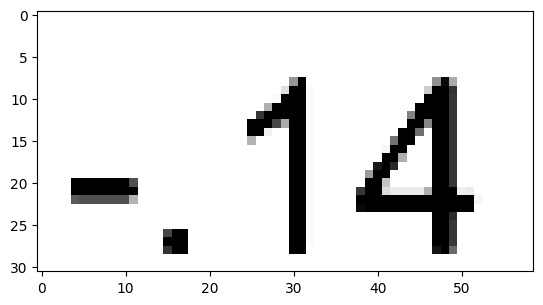

value = -0.18, value_ocr = None


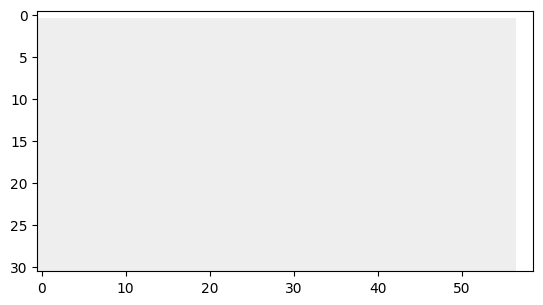

value = -0.0, value_ocr = None


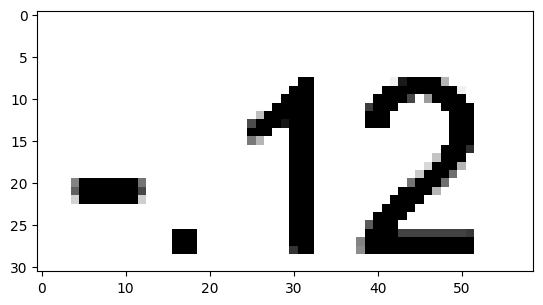

value = -0.16, value_ocr = -0.12


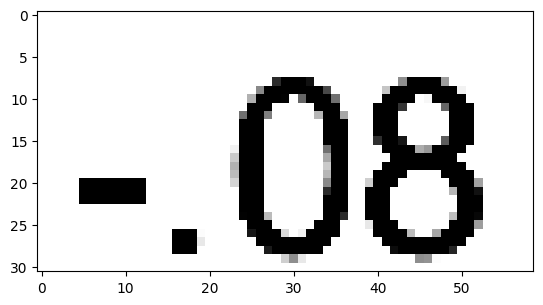

value = -0.1, value_ocr = -0.08


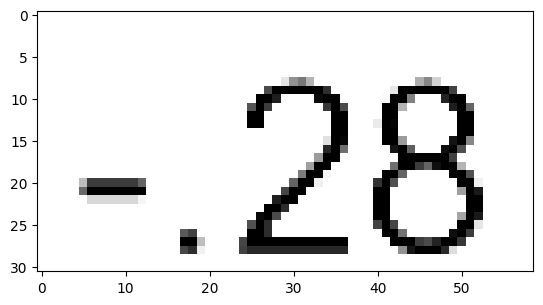

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.46, value_ocr = -0.28


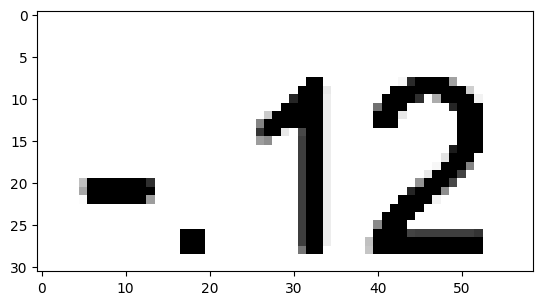

value = -0.16, value_ocr = -0.12


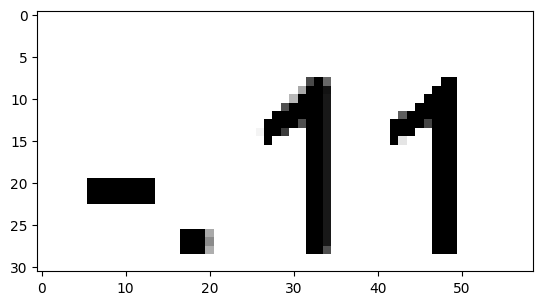

value = -0.14, value_ocr = None


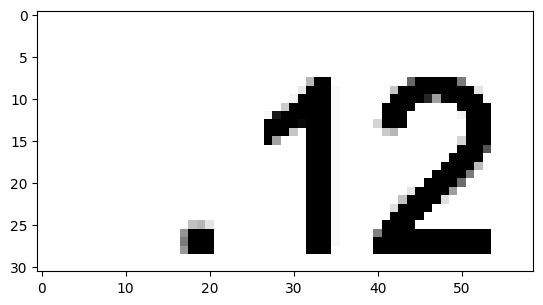

value = 0.1, value_ocr = None


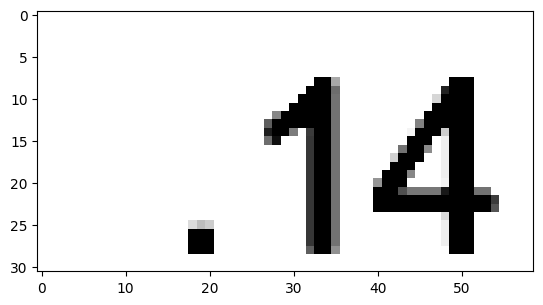

value = 0.12, value_ocr = 0.14


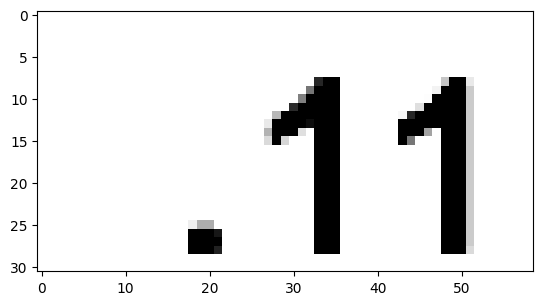

value = 0.09, value_ocr = 0.11


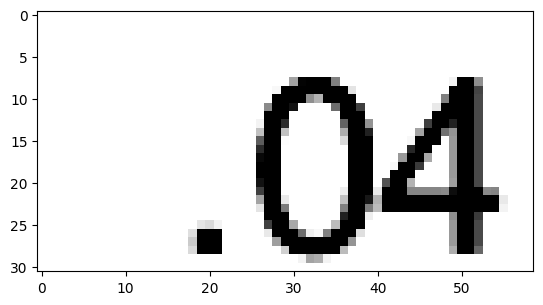

value = 0.03, value_ocr = 0.04


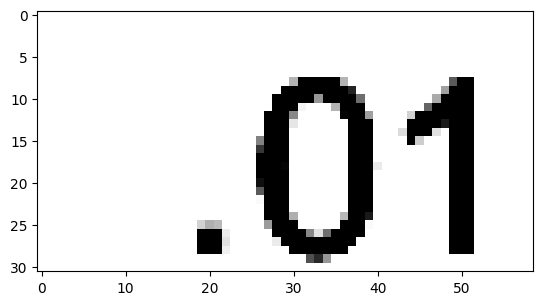

value = 0.01, value_ocr = 0.01


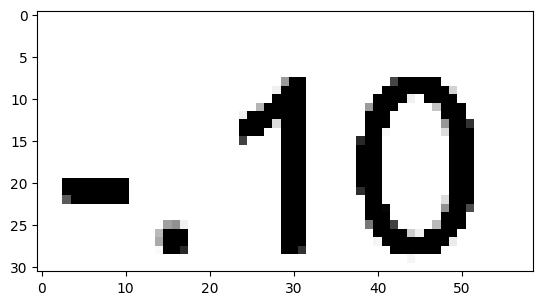

value = -0.13, value_ocr = None


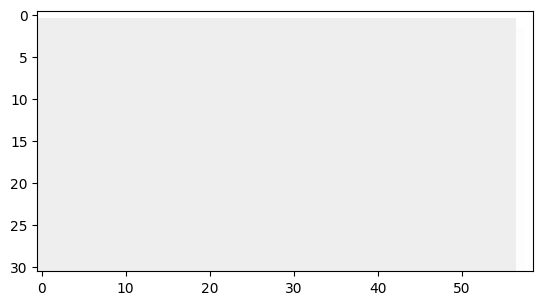

value = -0.0, value_ocr = None


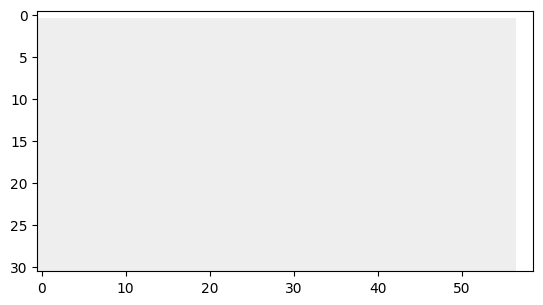

value = -0.0, value_ocr = None


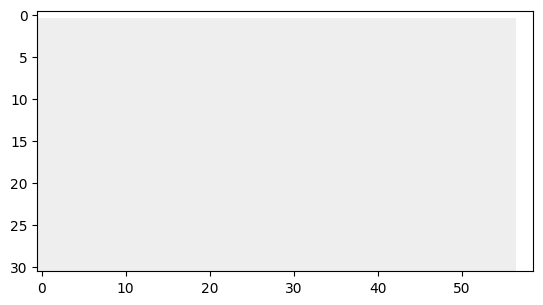

value = -0.0, value_ocr = None


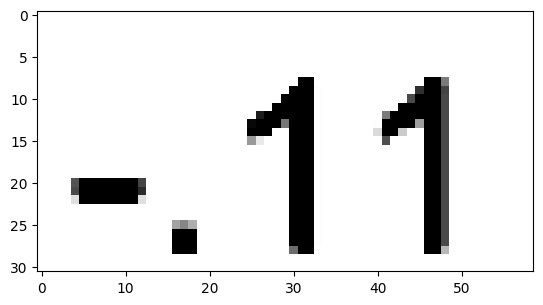

value = -0.15, value_ocr = -0.11


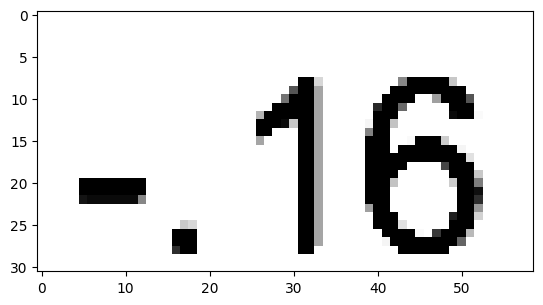

value = -0.22, value_ocr = -0.16


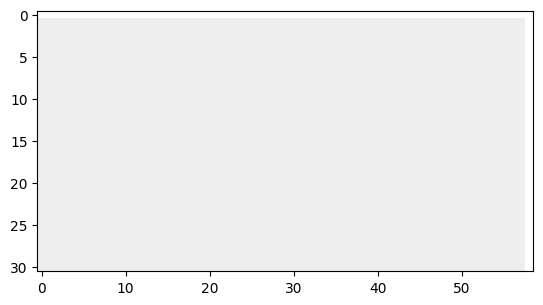

value = -0.0, value_ocr = None


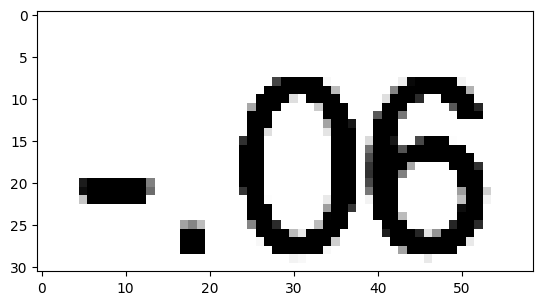

value = -0.07, value_ocr = -0.06


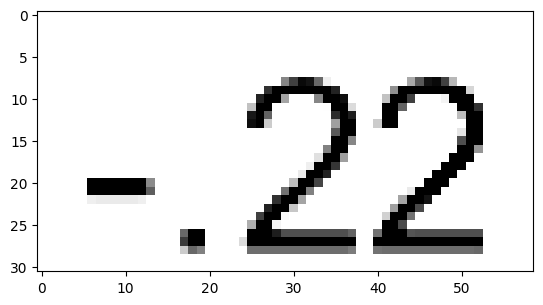

value = -0.33, value_ocr = -0.22


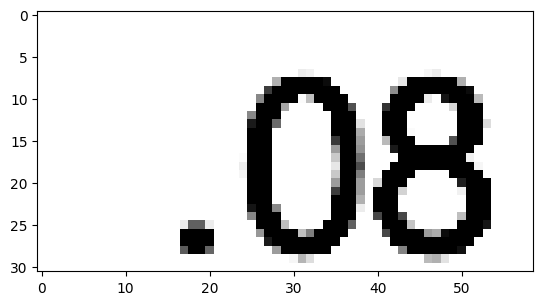

value = 0.06, value_ocr = 0.08


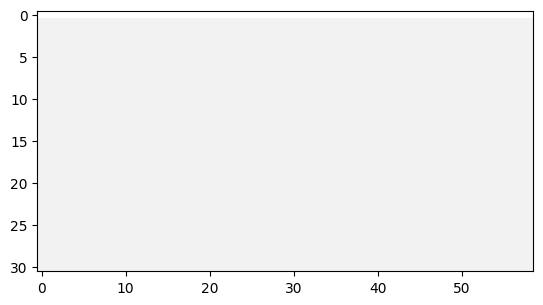

value = -0.0, value_ocr = None


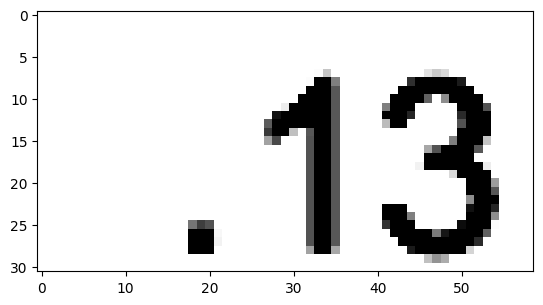

value = 0.11, value_ocr = 0.13


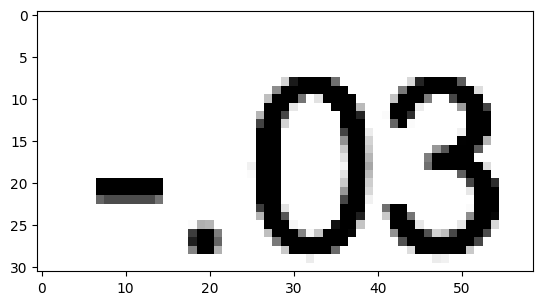

value = -0.04, value_ocr = -0.03


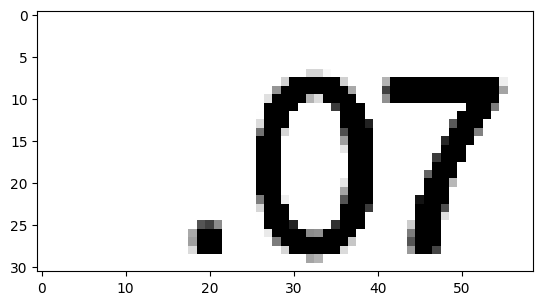

value = 0.06, value_ocr = 0.07


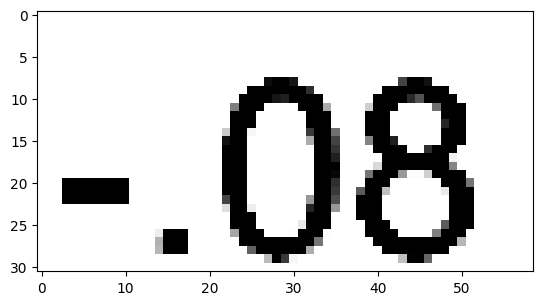

value = -0.1, value_ocr = -0.08


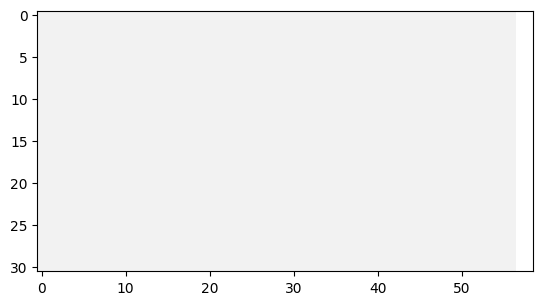

value = -0.0, value_ocr = None


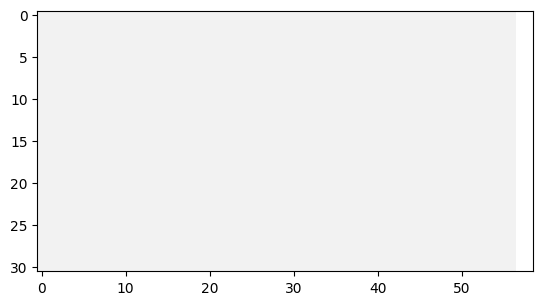

value = -0.0, value_ocr = None


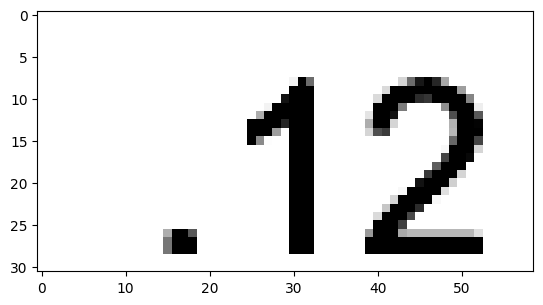

value = 0.1, value_ocr = 0.12


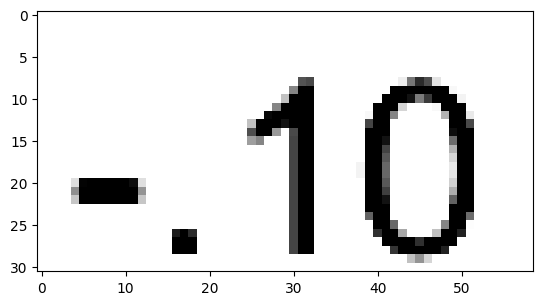

value = -0.12, value_ocr = -0.1


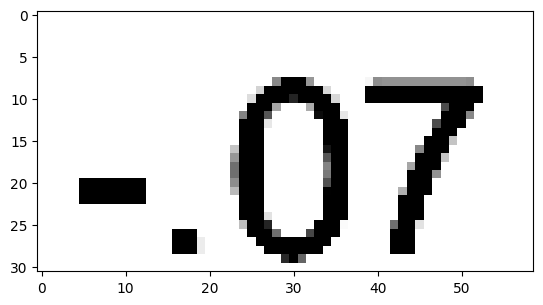

value = -0.08, value_ocr = -0.07


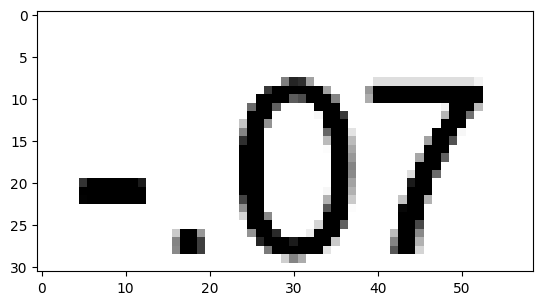

value = -0.09, value_ocr = -0.07


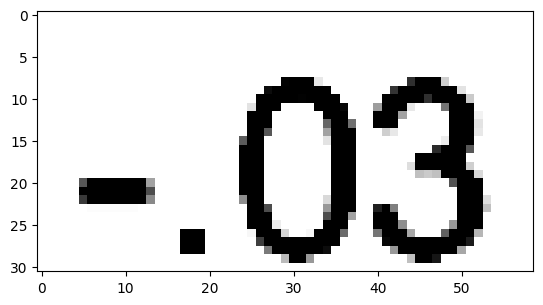

value = -0.03, value_ocr = -0.03


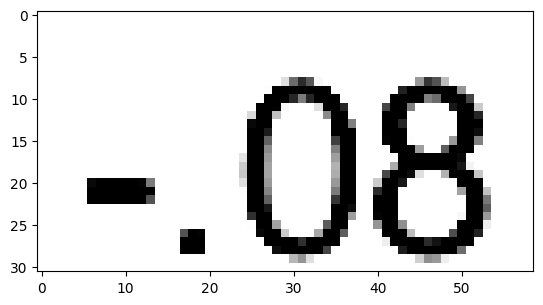

value = -0.09, value_ocr = -0.08


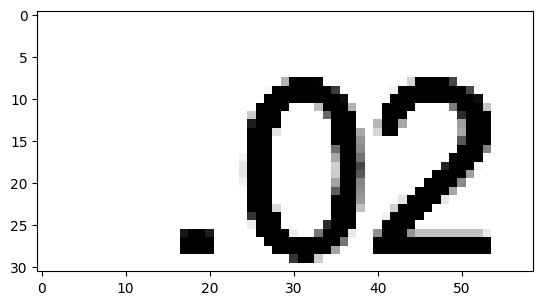

value = 0.02, value_ocr = 0.02


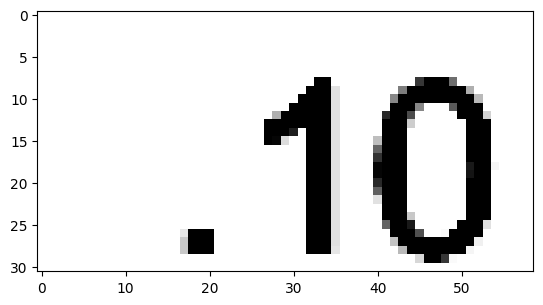

value = 0.08, value_ocr = None


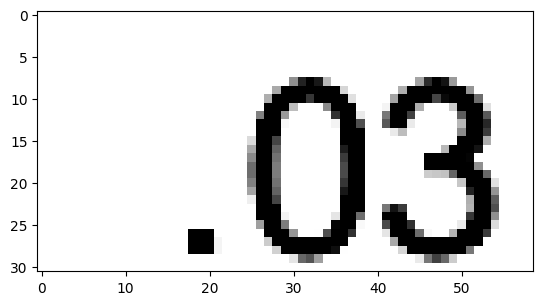

value = 0.02, value_ocr = 0.03


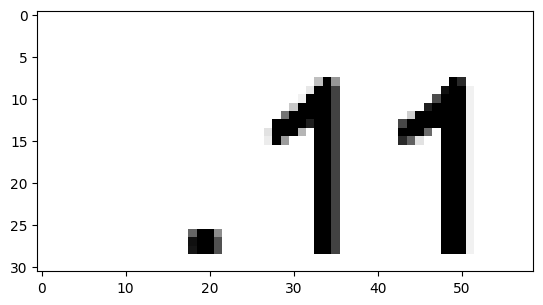

value = 0.09, value_ocr = 0.11


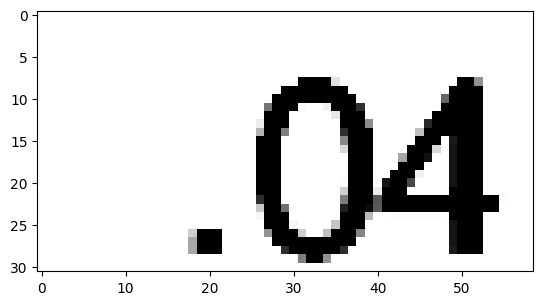

value = 0.03, value_ocr = None


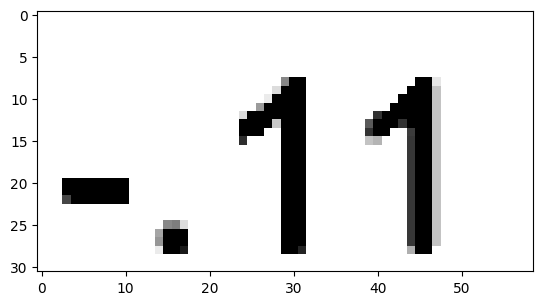

value = -0.14, value_ocr = None


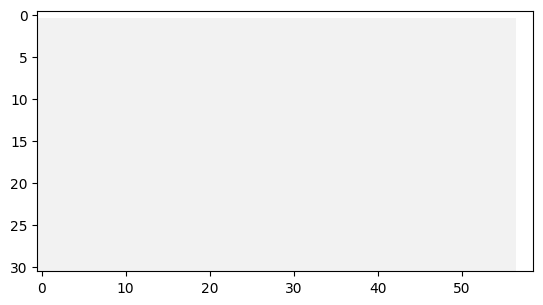

value = -0.0, value_ocr = None


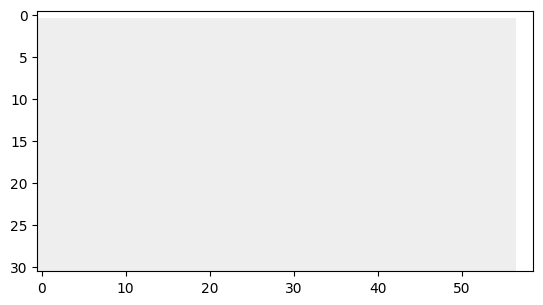

value = -0.0, value_ocr = None


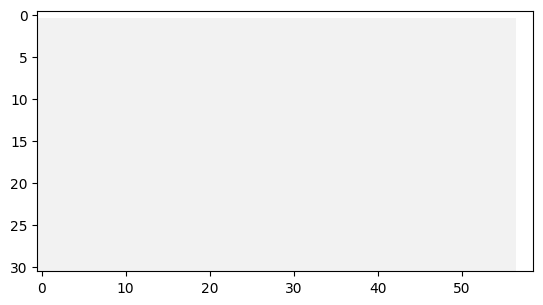

value = -0.0, value_ocr = None


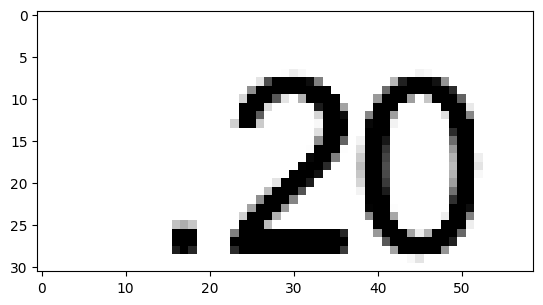

value = 0.19, value_ocr = 0.2


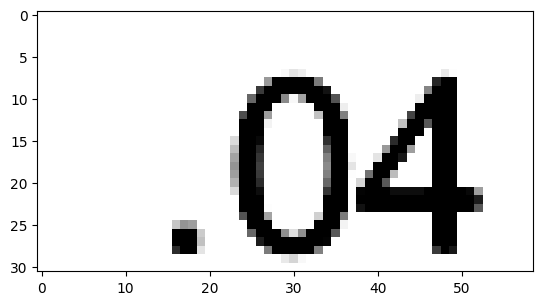

value = 0.03, value_ocr = 0.04


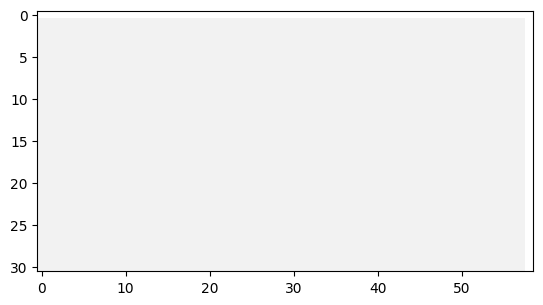

value = -0.0, value_ocr = None


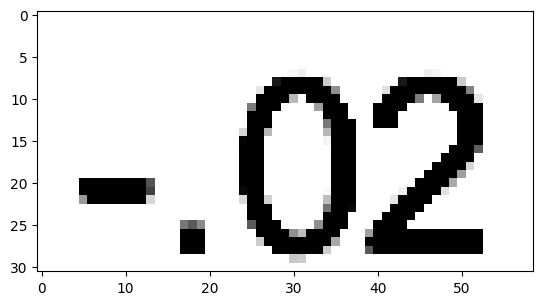

value = -0.02, value_ocr = -0.02


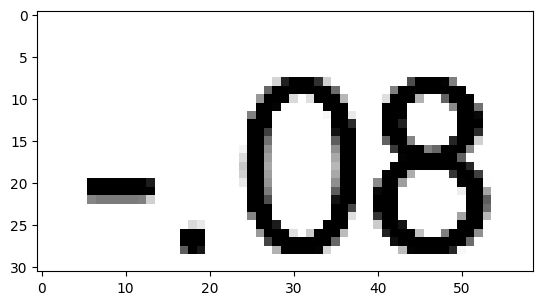

value = -0.1, value_ocr = -0.08


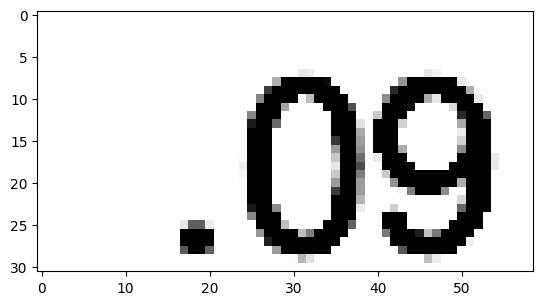

value = 0.07, value_ocr = 0.09


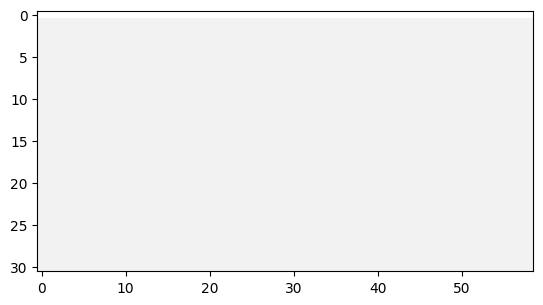

value = -0.0, value_ocr = None


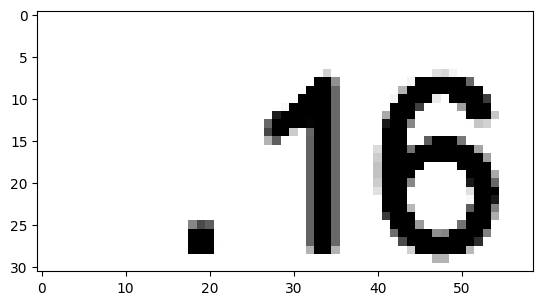

value = 0.14, value_ocr = 0.16


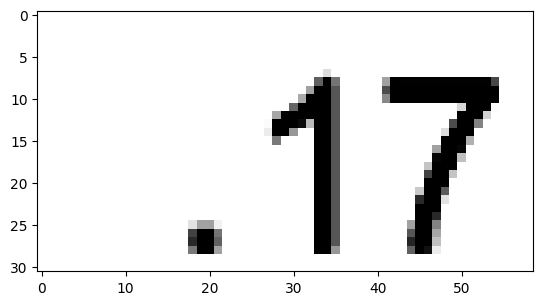

value = 0.15, value_ocr = 0.17


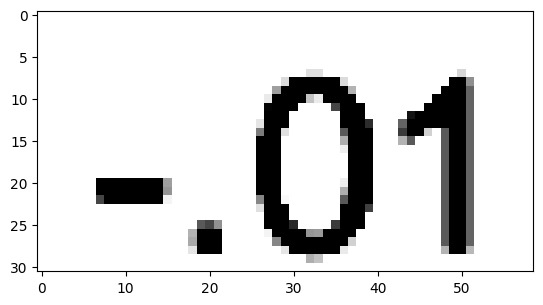

value = -0.02, value_ocr = -0.01


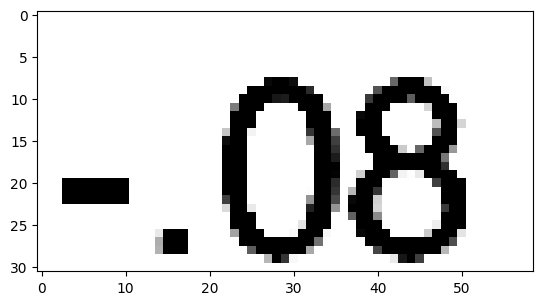

value = -0.1, value_ocr = -0.08


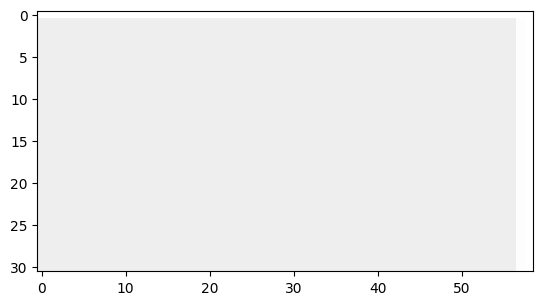

value = -0.0, value_ocr = None


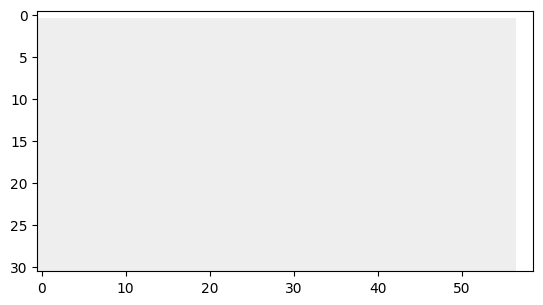

value = -0.0, value_ocr = None


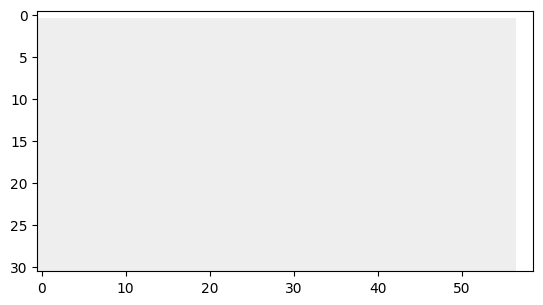

value = -0.0, value_ocr = None


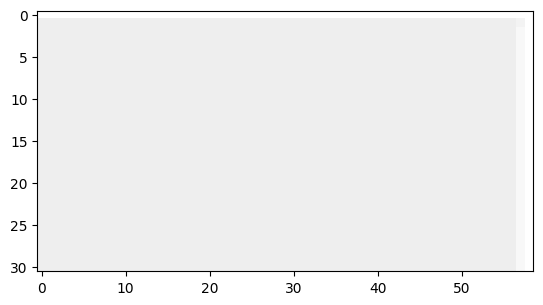

value = -0.0, value_ocr = None


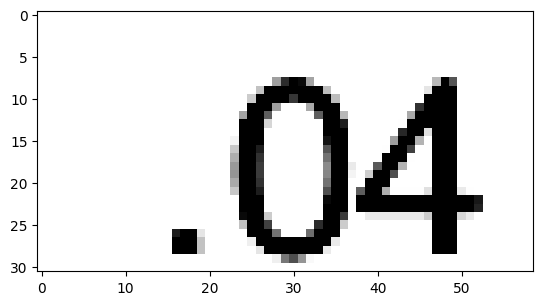

value = 0.03, value_ocr = 0.04


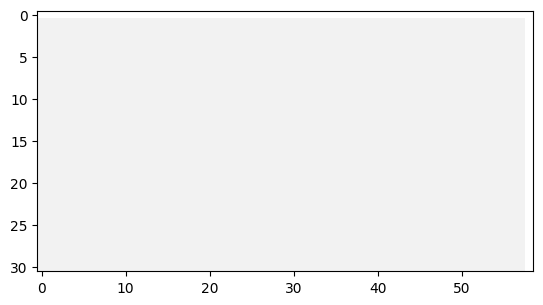

value = -0.0, value_ocr = None


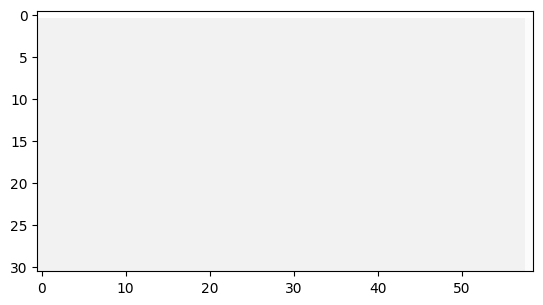

value = -0.0, value_ocr = None


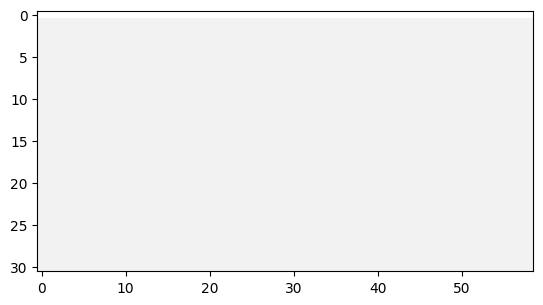

value = -0.0, value_ocr = None


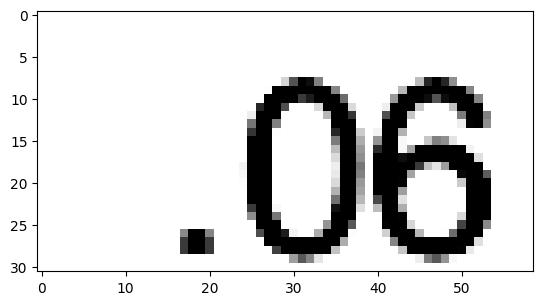

value = 0.05, value_ocr = 0.06


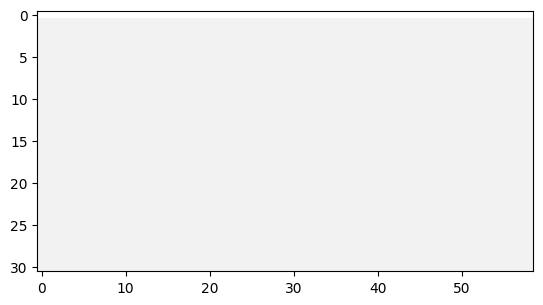

value = -0.0, value_ocr = None


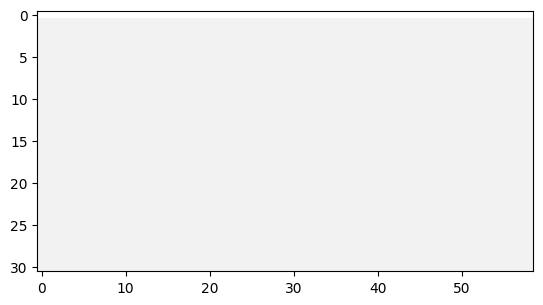

value = -0.0, value_ocr = None


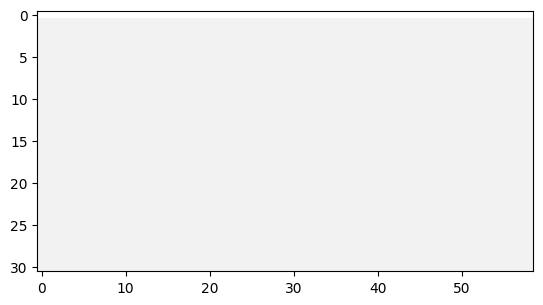

value = -0.0, value_ocr = None


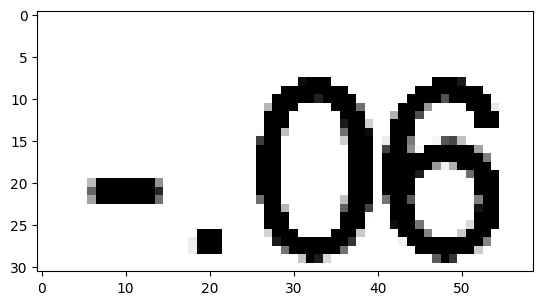

value = -0.08, value_ocr = -0.06


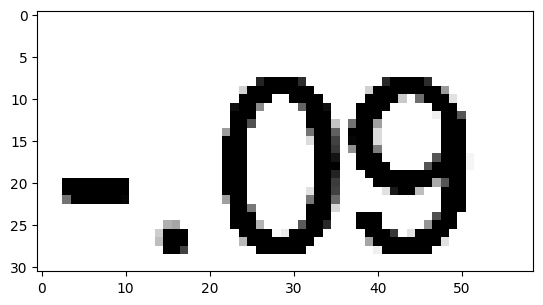

value = -0.11, value_ocr = -0.09


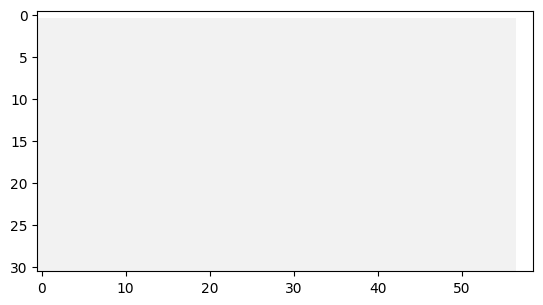

value = -0.0, value_ocr = None


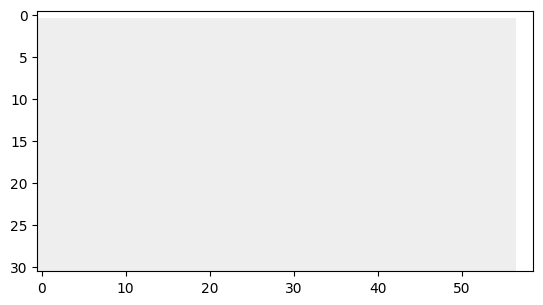

value = -0.0, value_ocr = None


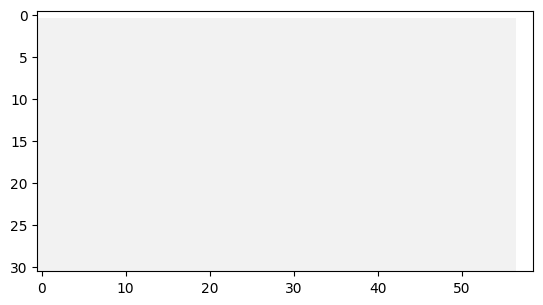

value = -0.0, value_ocr = None


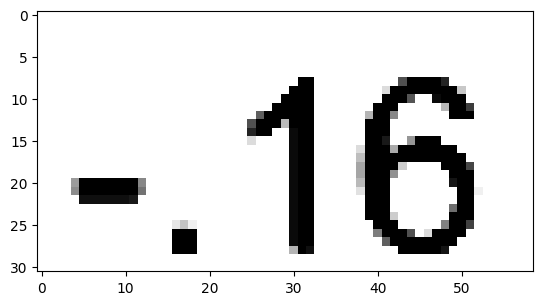

value = -0.23, value_ocr = -0.16


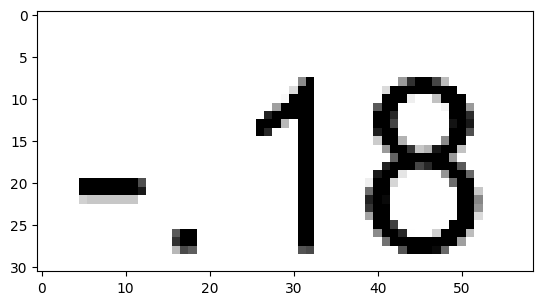

value = -0.25, value_ocr = -0.18


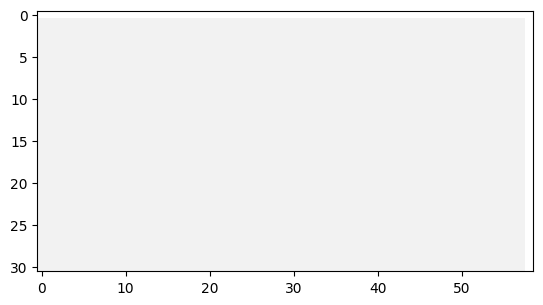

value = -0.0, value_ocr = None


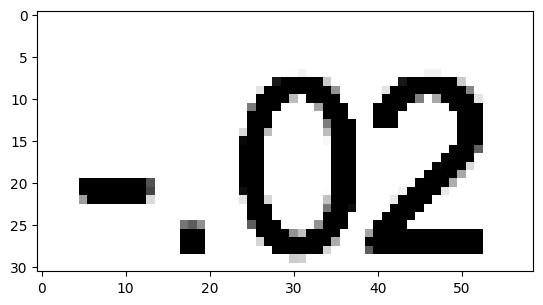

value = -0.02, value_ocr = -0.02


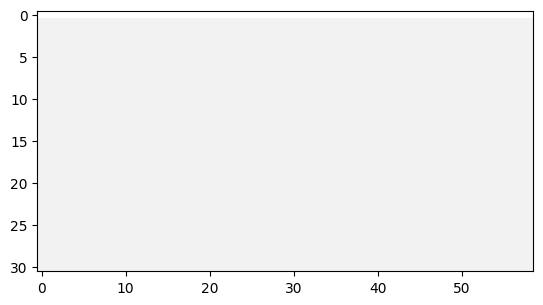

value = -0.0, value_ocr = None


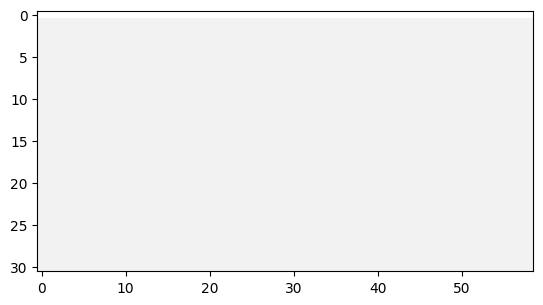

value = -0.0, value_ocr = None


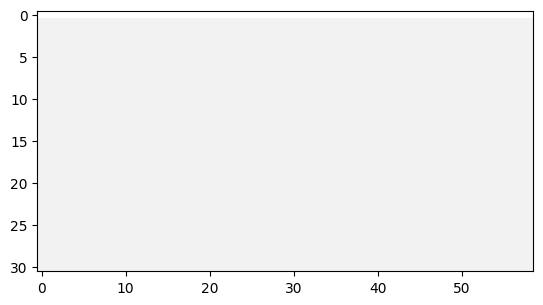

value = -0.0, value_ocr = None


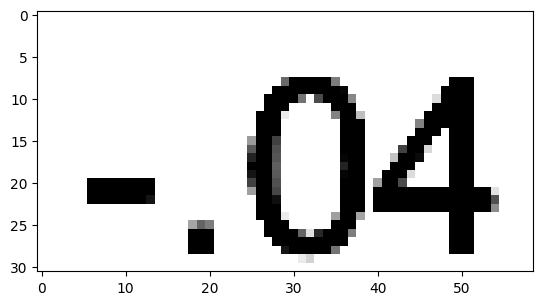

value = -0.04, value_ocr = -0.04


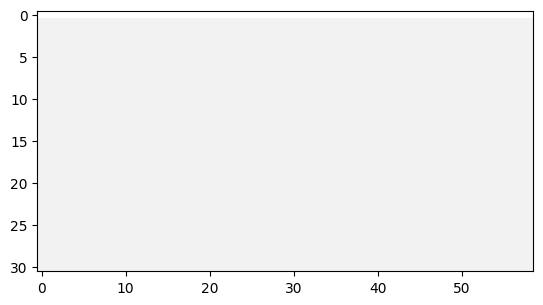

value = -0.0, value_ocr = None


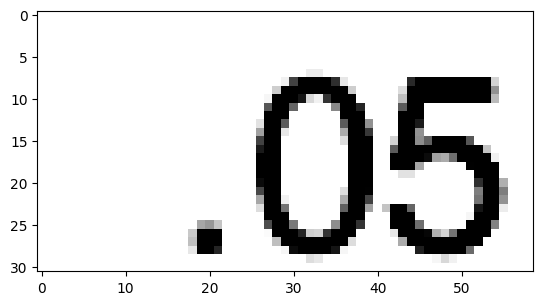

value = 0.03, value_ocr = 0.05


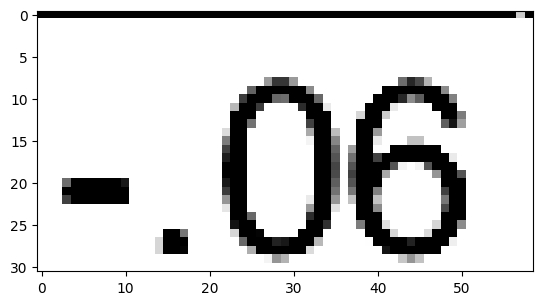

value = -0.07, value_ocr = None


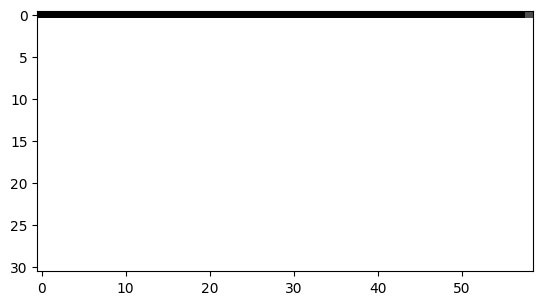

value = -0.0, value_ocr = None


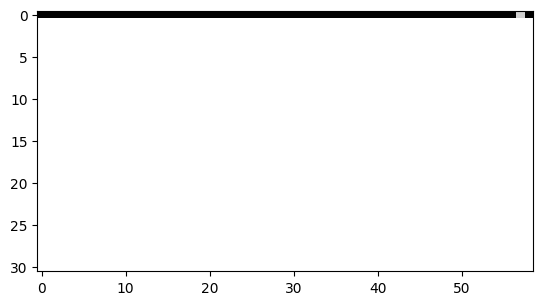

value = -0.0, value_ocr = None


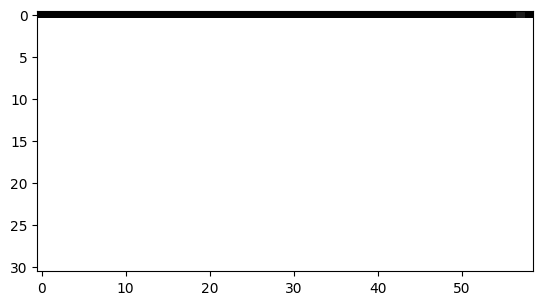

value = -0.0, value_ocr = None


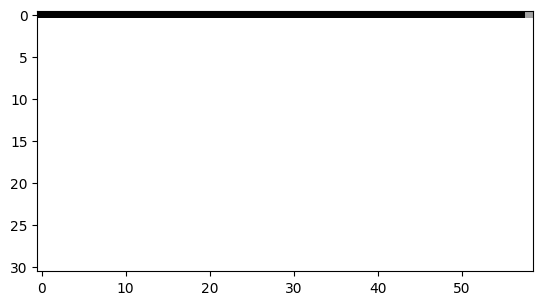

value = -0.0, value_ocr = None


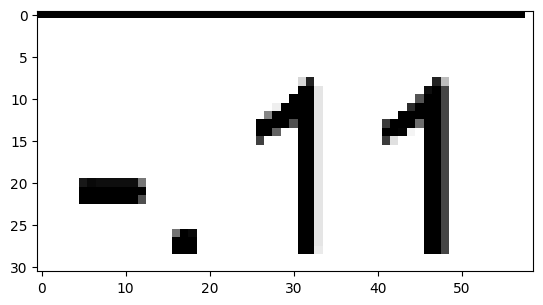

value = -0.14, value_ocr = None


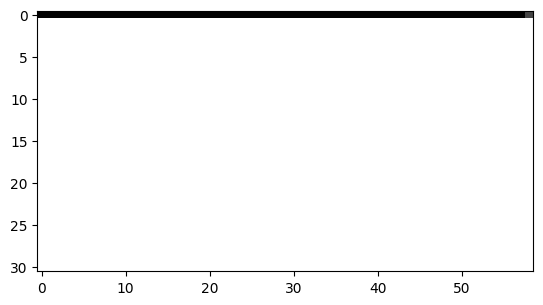

value = -0.0, value_ocr = None


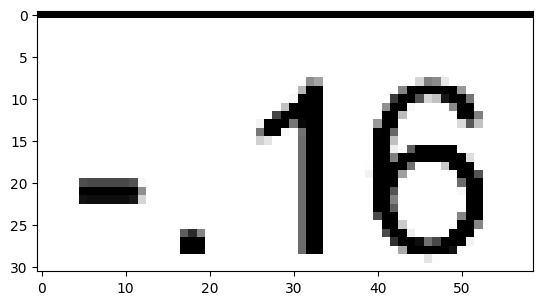

value = -0.22, value_ocr = -0.16


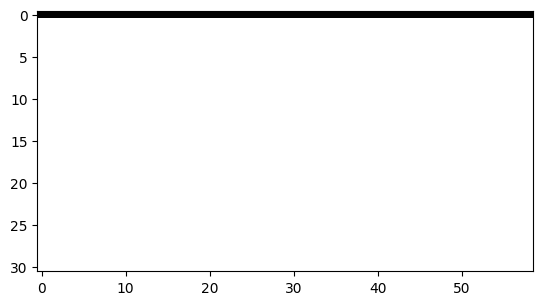

value = -0.0, value_ocr = None


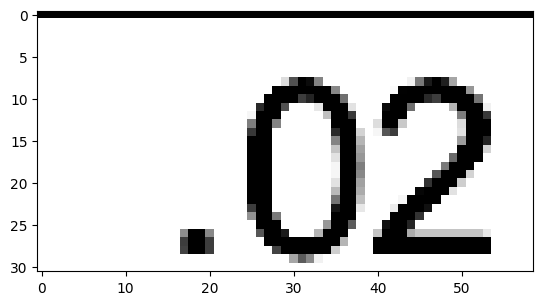

value = 0.02, value_ocr = None


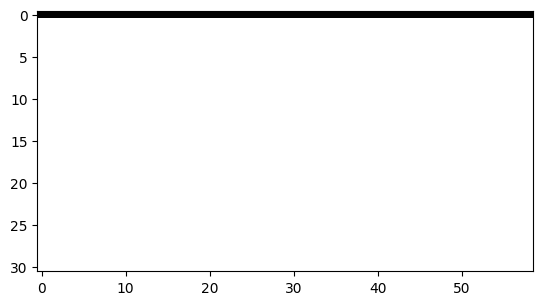

value = -0.0, value_ocr = None


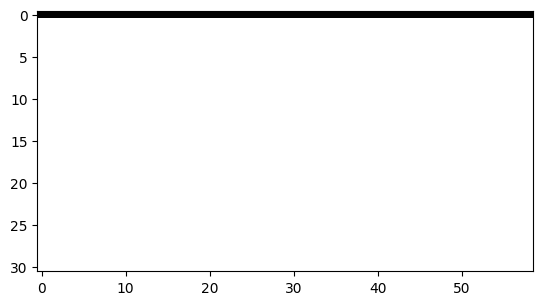

value = -0.0, value_ocr = None


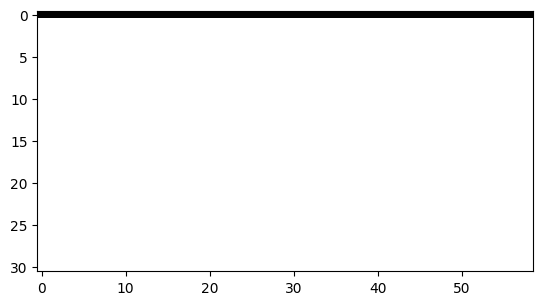

value = -0.0, value_ocr = None


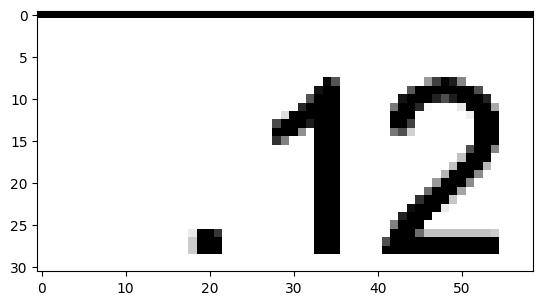

value = 0.1, value_ocr = None


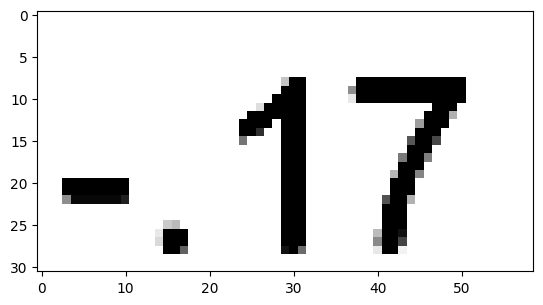

value = -0.24, value_ocr = None


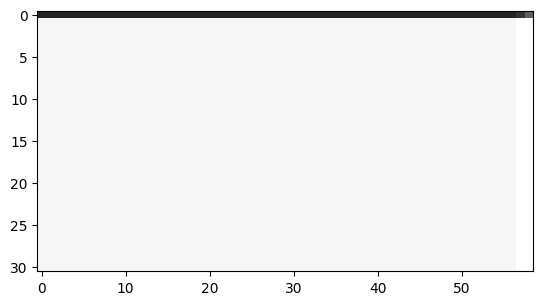

value = -0.0, value_ocr = None


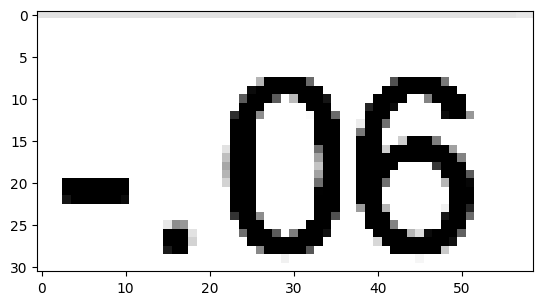

value = -0.07, value_ocr = -0.06


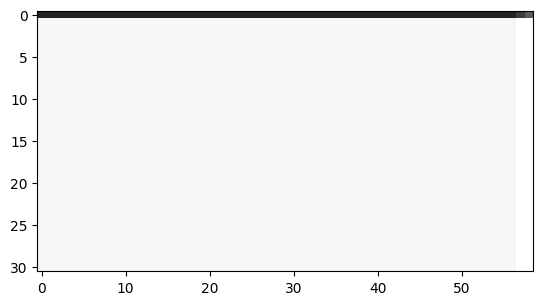

value = -0.0, value_ocr = None


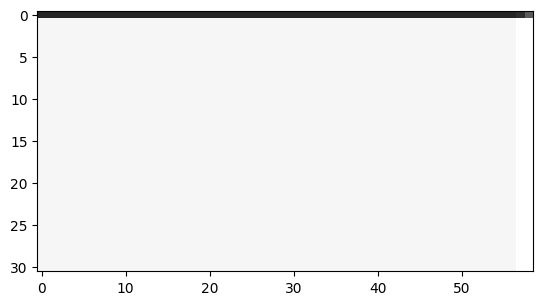

value = -0.0, value_ocr = None


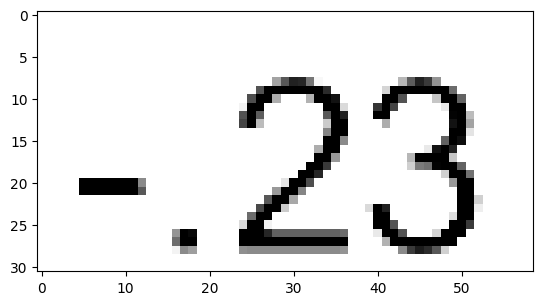

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.36, value_ocr = -0.23


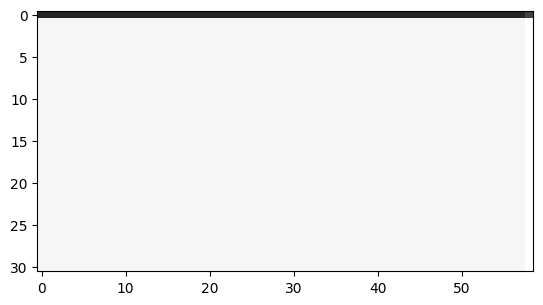

value = -0.0, value_ocr = None


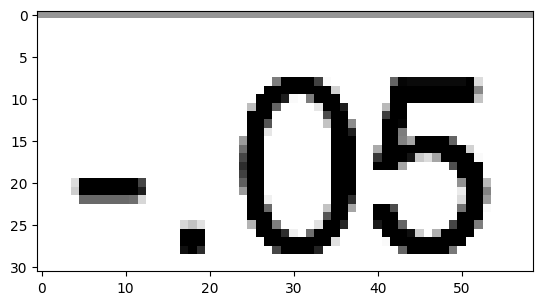

value = -0.06, value_ocr = -0.05


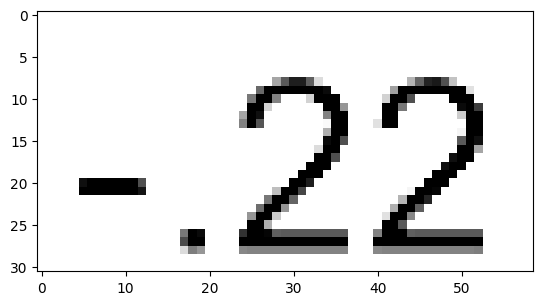

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.34, value_ocr = -0.22


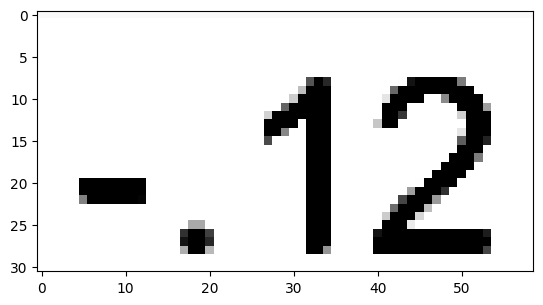

value = -0.16, value_ocr = None


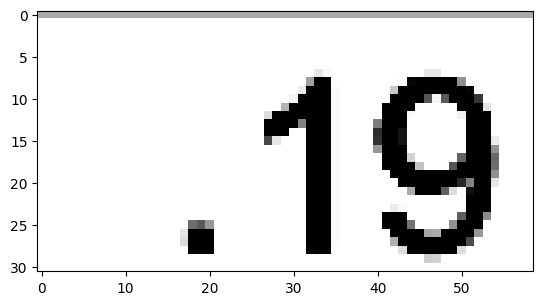

value = 0.18, value_ocr = None


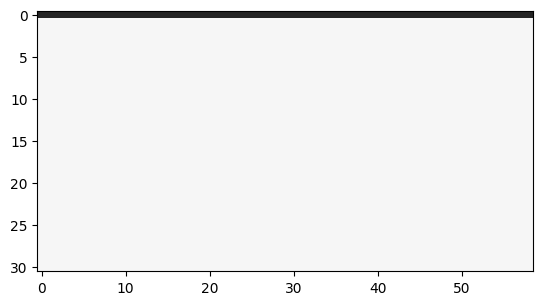

value = -0.0, value_ocr = None


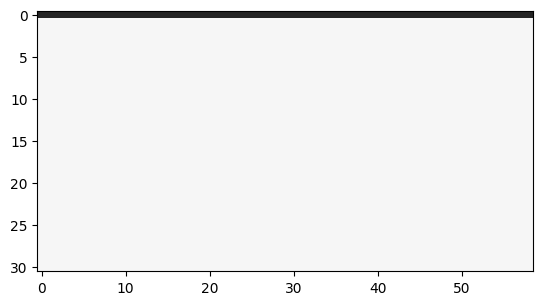

value = -0.0, value_ocr = None


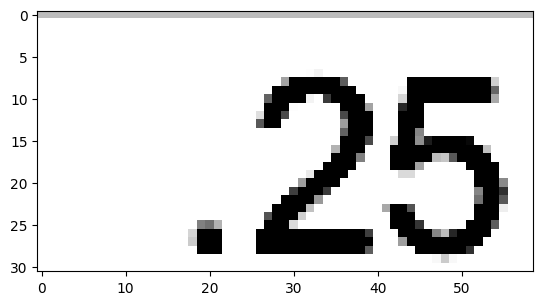

value = 0.26, value_ocr = 0.25


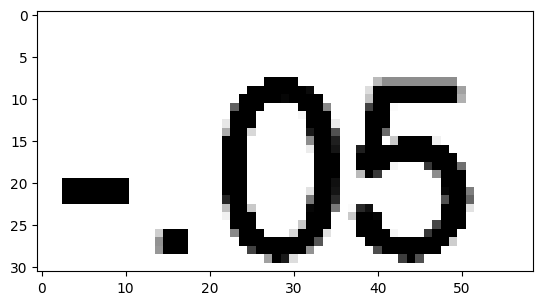

value = -0.06, value_ocr = -0.05


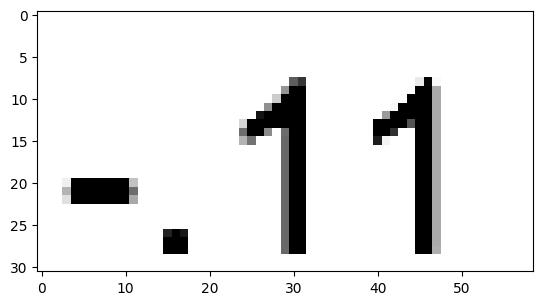

value = -0.14, value_ocr = None


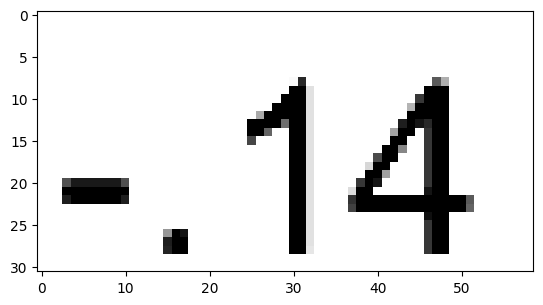

value = -0.19, value_ocr = None


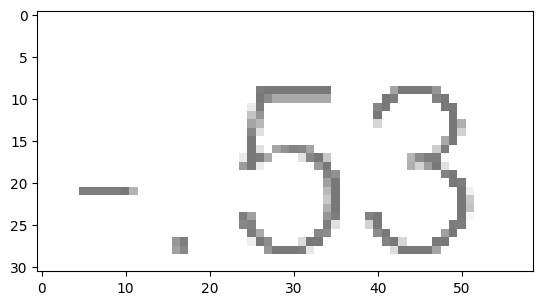

value = -1.36, value_ocr = -0.53


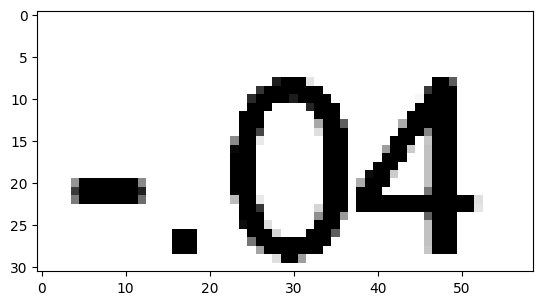

value = -0.05, value_ocr = -0.04


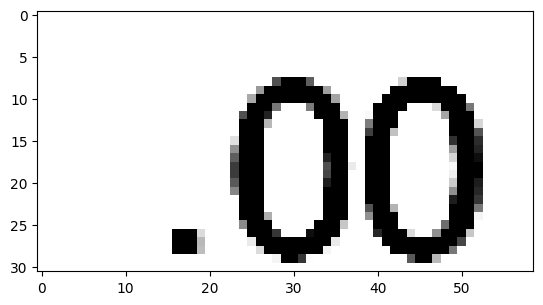

value = -0.0, value_ocr = 0.0


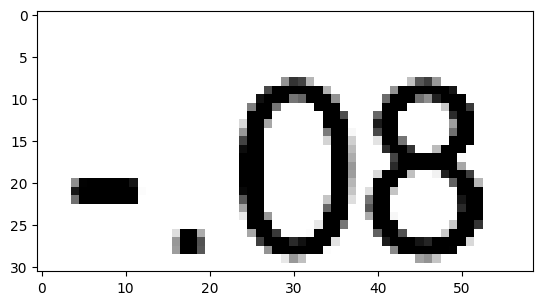

value = -0.1, value_ocr = -0.08


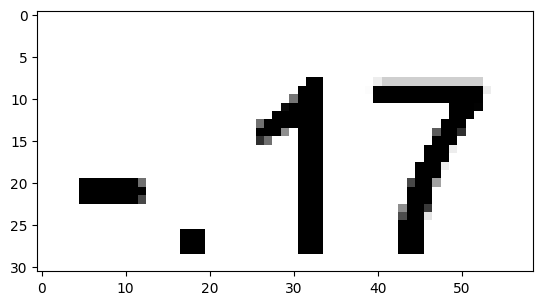

value = -0.24, value_ocr = -0.17


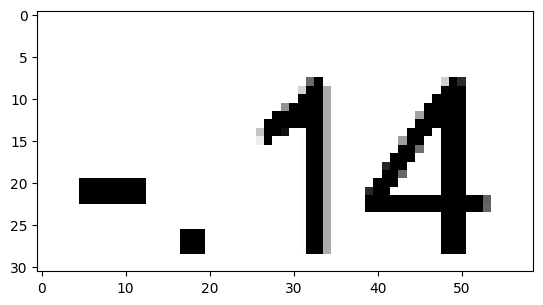

value = -0.19, value_ocr = None


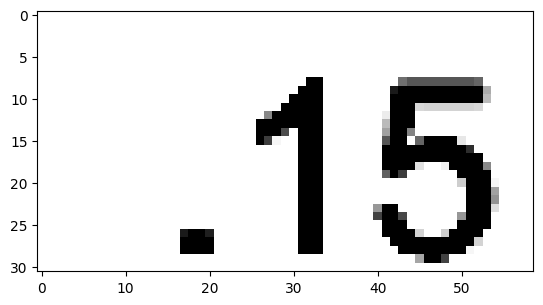

value = 0.14, value_ocr = 0.15


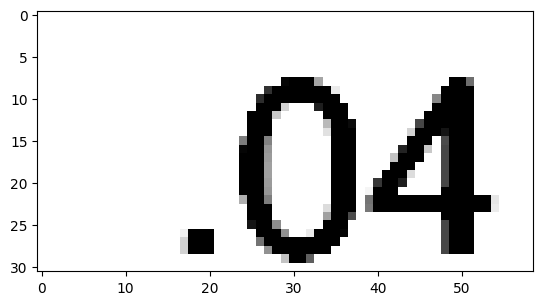

value = 0.03, value_ocr = 0.04


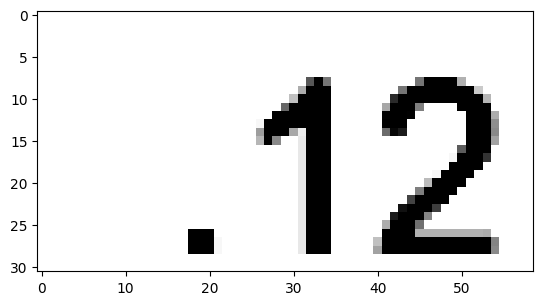

value = 0.1, value_ocr = None


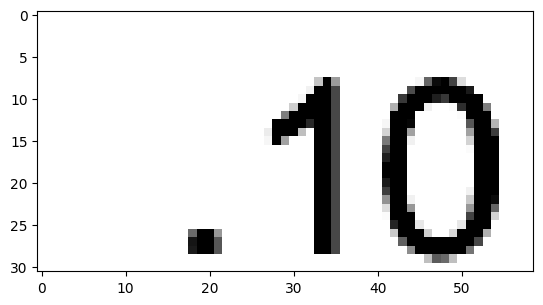

value = 0.08, value_ocr = 0.1


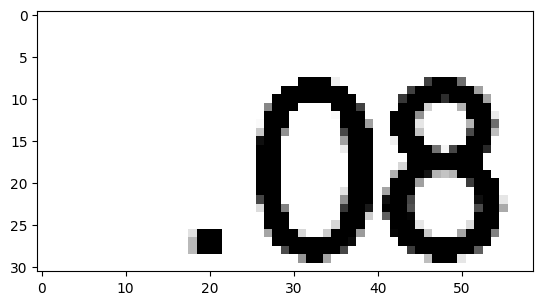

value = 0.07, value_ocr = 0.08


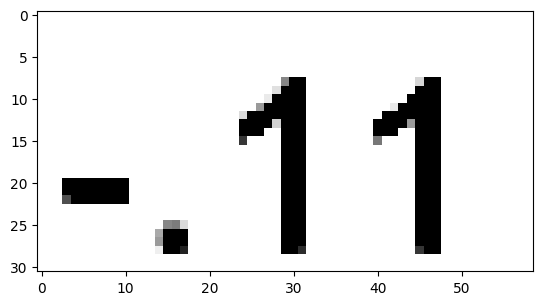

value = -0.14, value_ocr = None


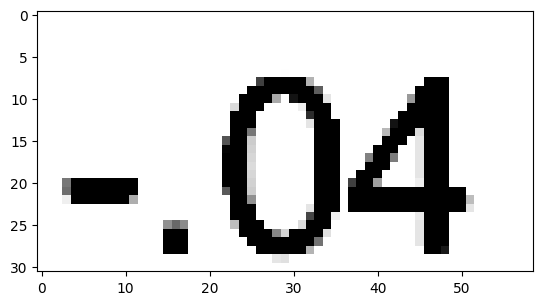

value = -0.05, value_ocr = -0.04


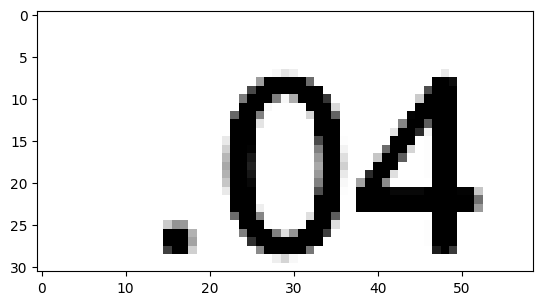

value = 0.03, value_ocr = 0.04


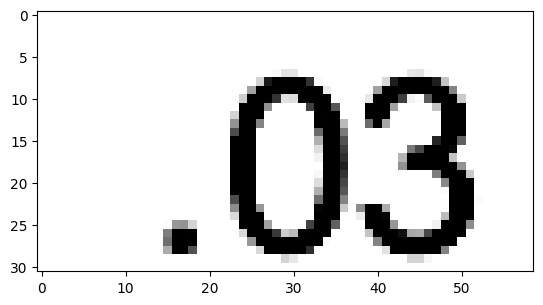

value = 0.02, value_ocr = 0.03


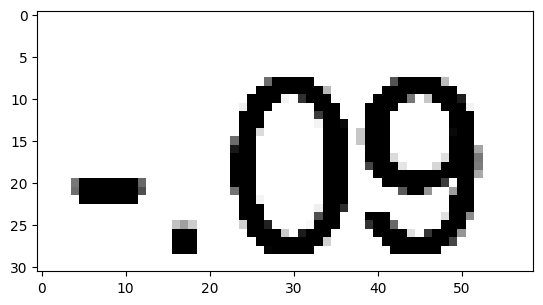

value = -0.12, value_ocr = -0.09


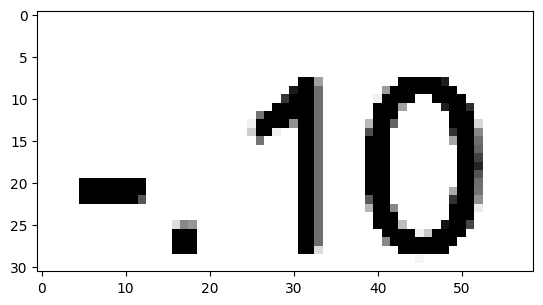

value = -0.12, value_ocr = -0.1


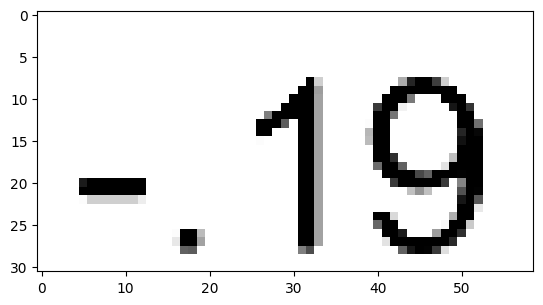

value = -0.27, value_ocr = -0.19


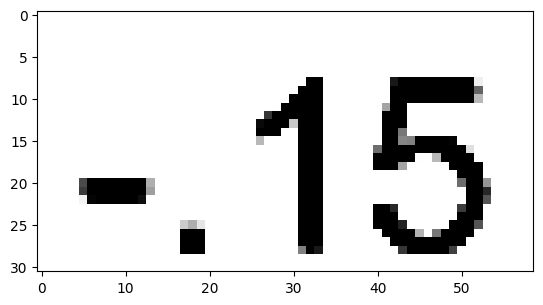

value = -0.19, value_ocr = -0.15


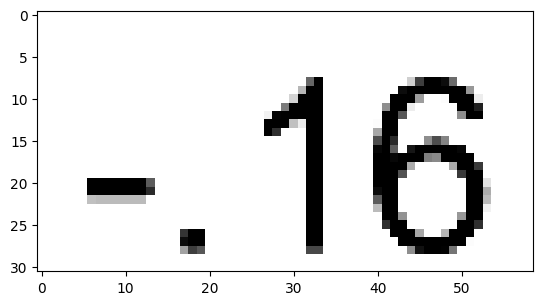

value = -0.22, value_ocr = None


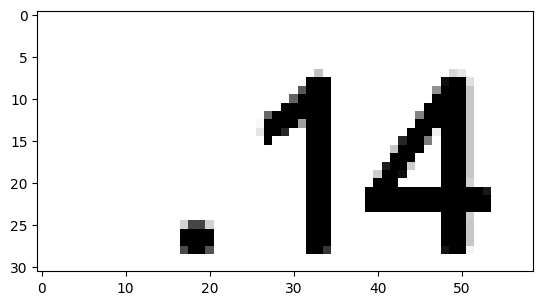

value = 0.12, value_ocr = None


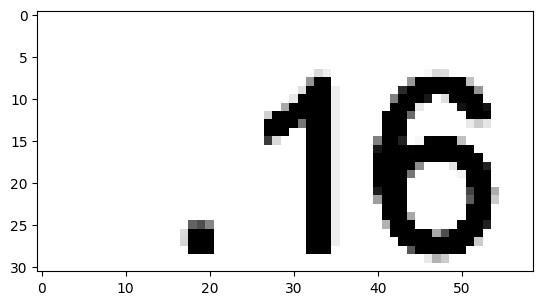

value = 0.14, value_ocr = None


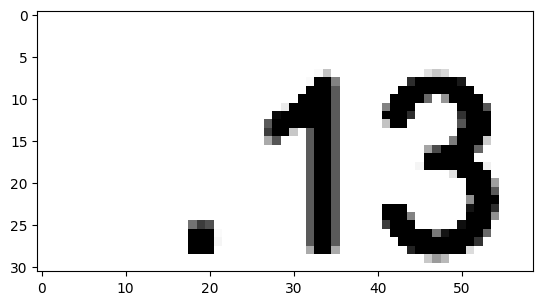

value = 0.11, value_ocr = 0.13


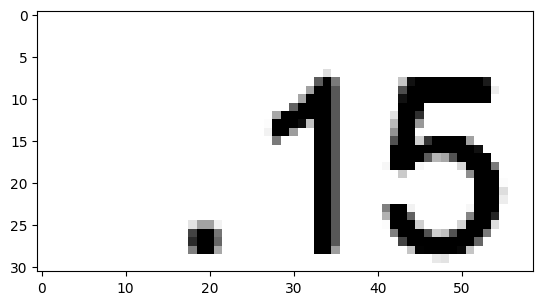

value = 0.13, value_ocr = 0.15


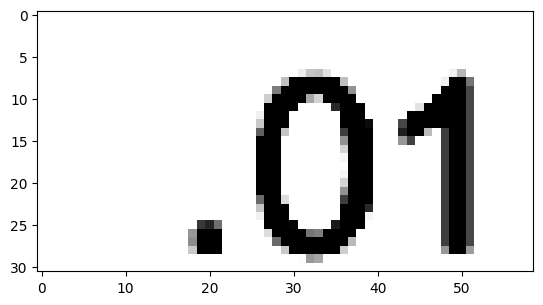

value = 0.0, value_ocr = 0.01


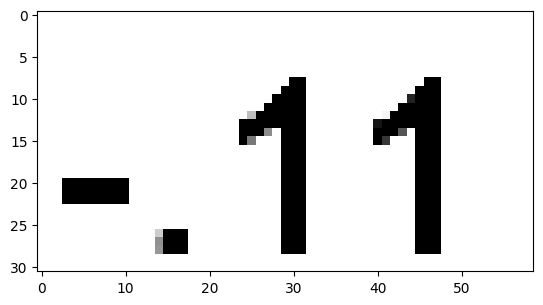

value = -0.13, value_ocr = None


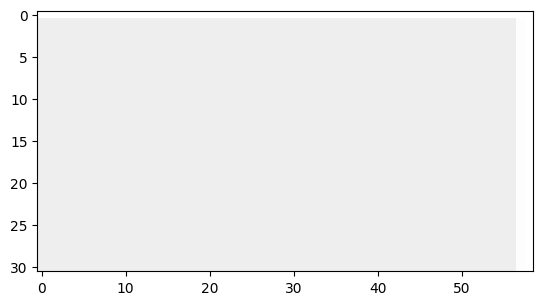

value = -0.0, value_ocr = None


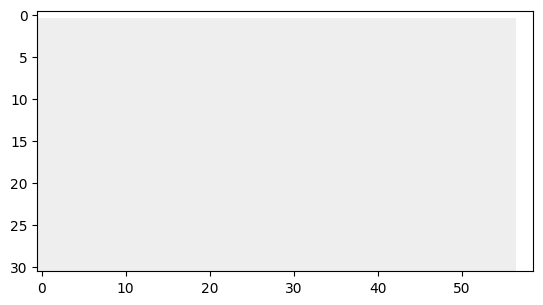

value = -0.0, value_ocr = None


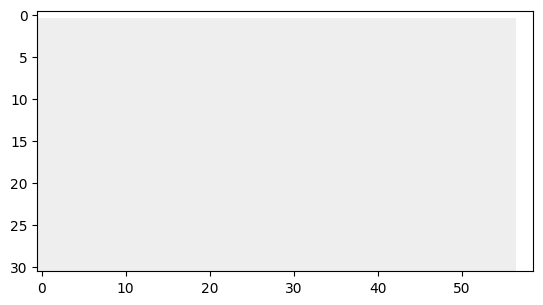

value = -0.0, value_ocr = None


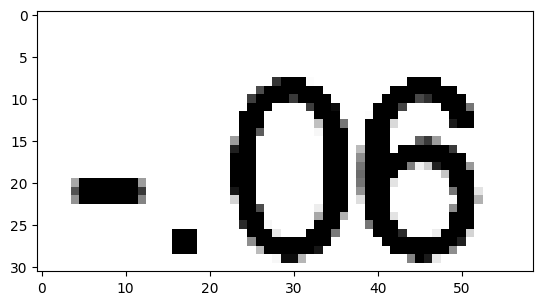

value = -0.08, value_ocr = -0.06


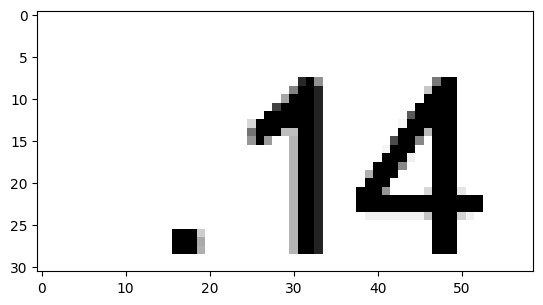

value = 0.12, value_ocr = 0.14


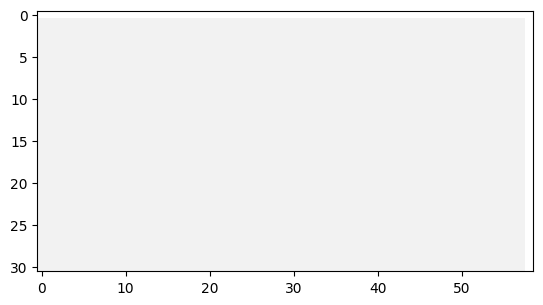

value = -0.0, value_ocr = None


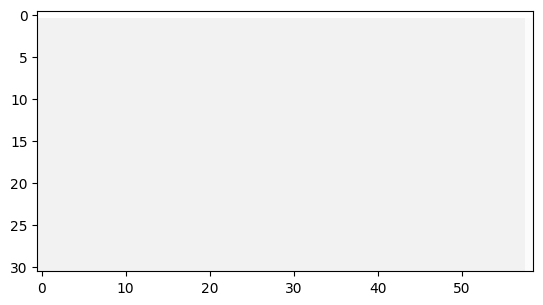

value = -0.0, value_ocr = None


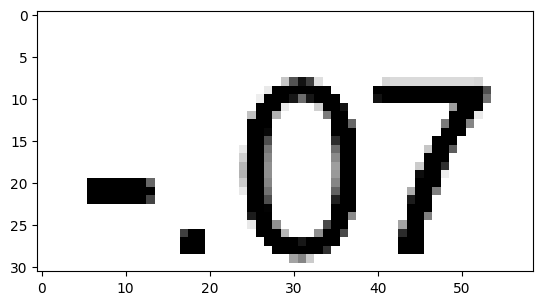

value = -0.09, value_ocr = -0.07


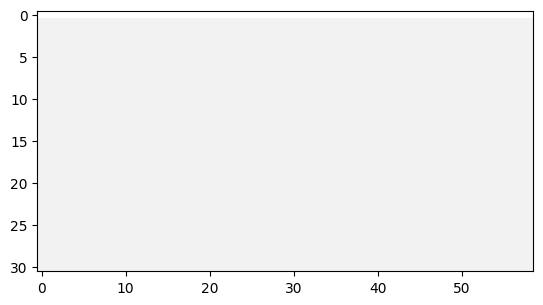

value = -0.0, value_ocr = None


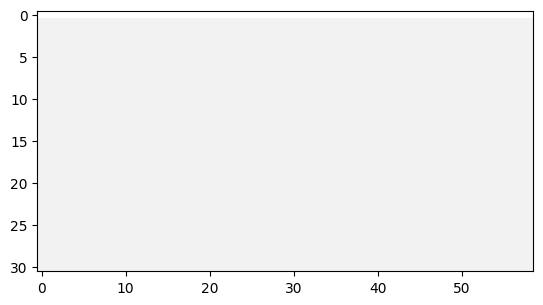

value = -0.0, value_ocr = None


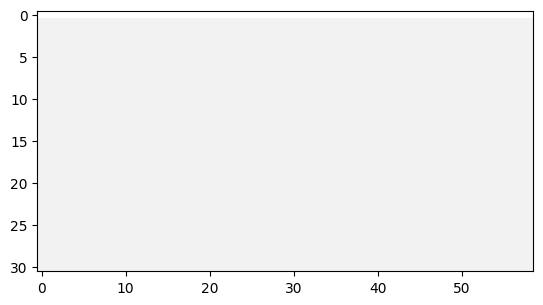

value = -0.0, value_ocr = None


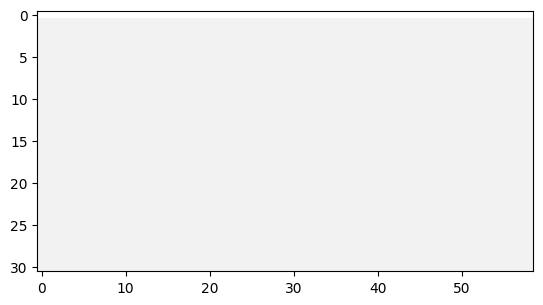

value = -0.0, value_ocr = None


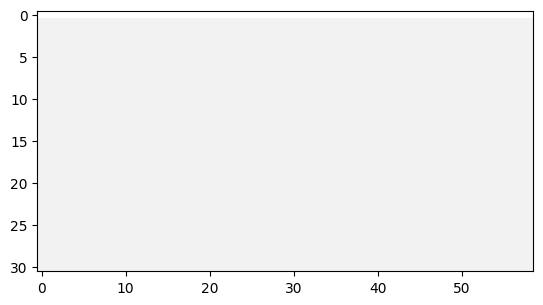

value = -0.0, value_ocr = None


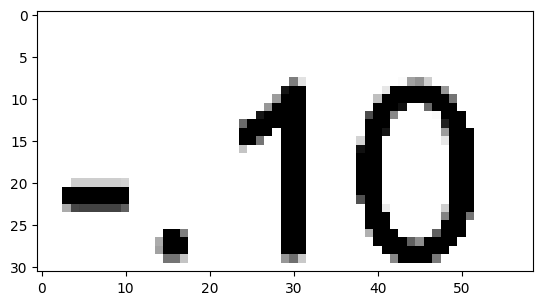

value = -0.12, value_ocr = None


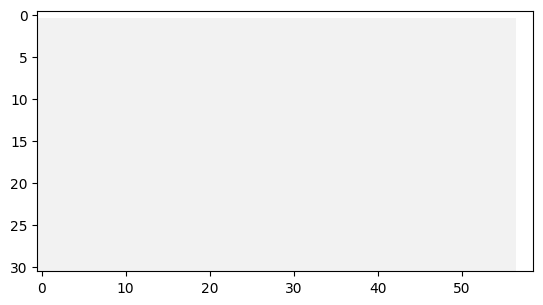

value = -0.0, value_ocr = None


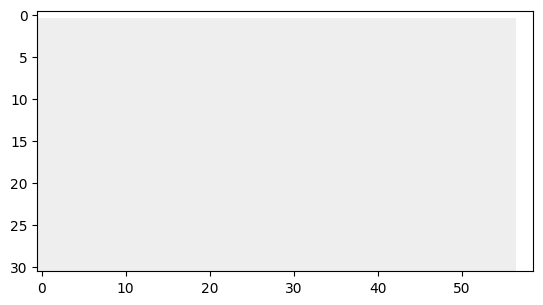

value = -0.0, value_ocr = None


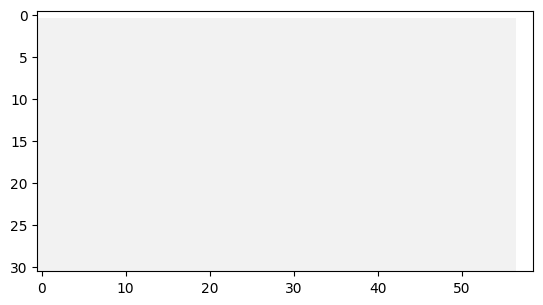

value = -0.0, value_ocr = None


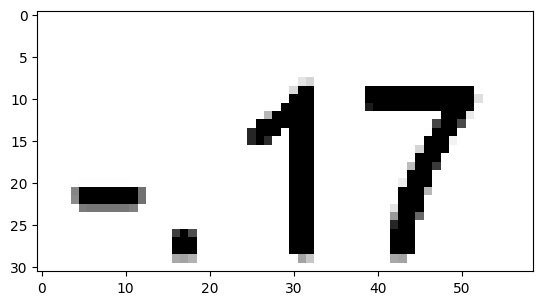

value = -0.24, value_ocr = -0.17


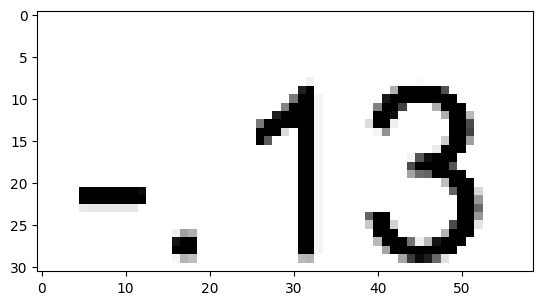

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.18, value_ocr = -0.13


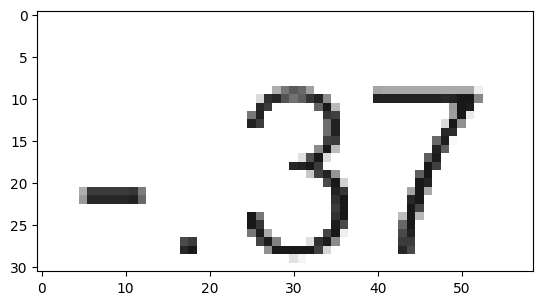

value = -0.75, value_ocr = -0.37


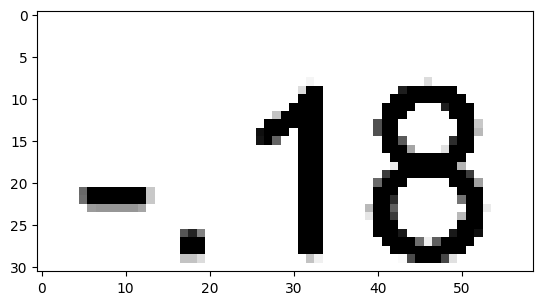

value = -0.25, value_ocr = -0.18


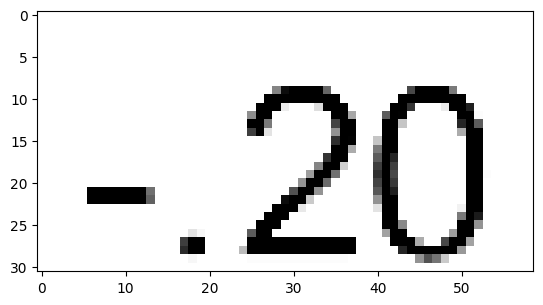

value = -0.29, value_ocr = -0.2


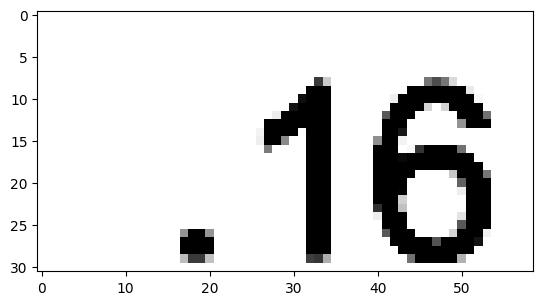

value = 0.14, value_ocr = None


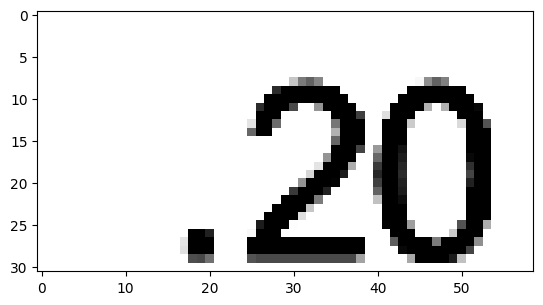

value = 0.19, value_ocr = 0.2


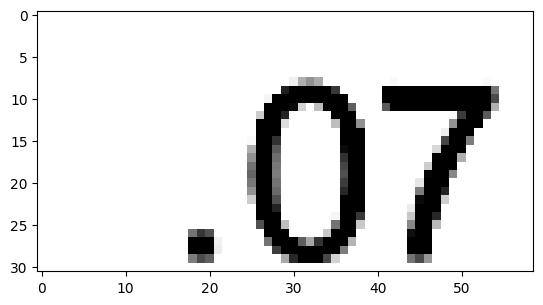

value = 0.06, value_ocr = 0.07


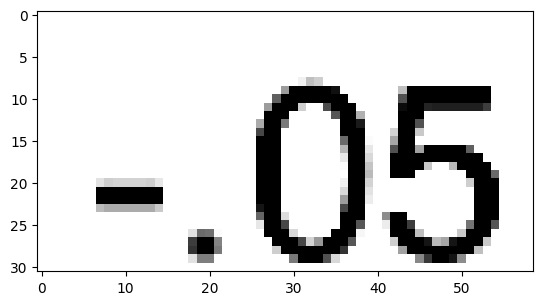

value = -0.06, value_ocr = -0.05


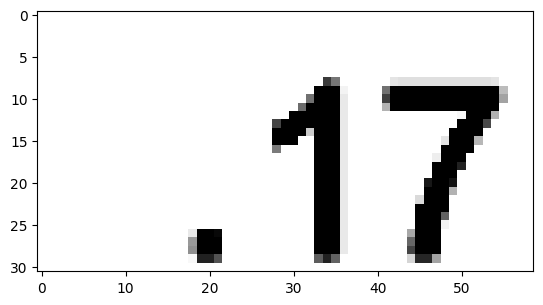

value = 0.15, value_ocr = 0.17


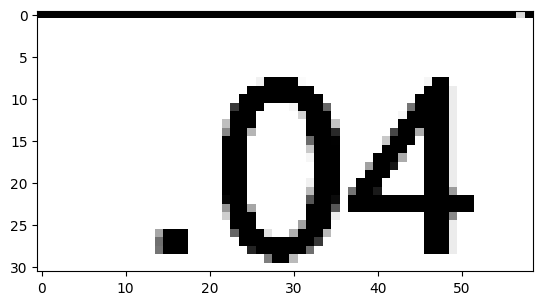

value = 0.03, value_ocr = None


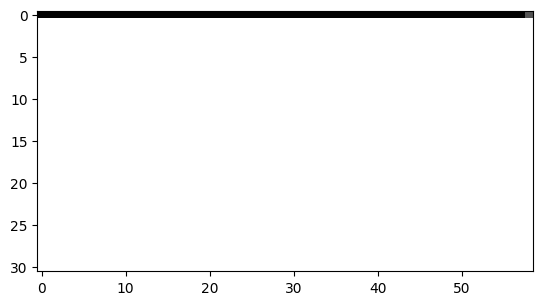

value = -0.0, value_ocr = None


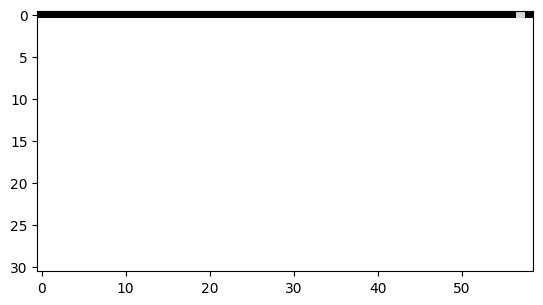

value = -0.0, value_ocr = None


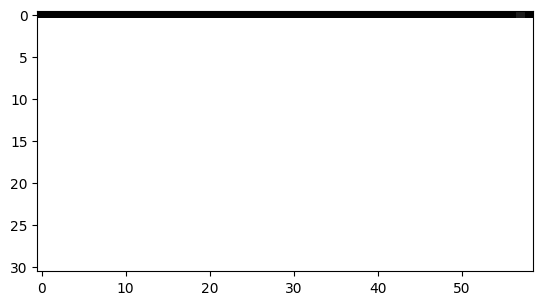

value = -0.0, value_ocr = None


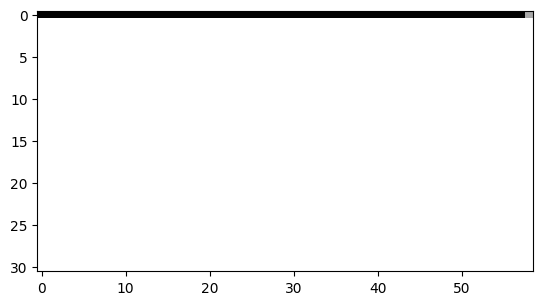

value = -0.0, value_ocr = None


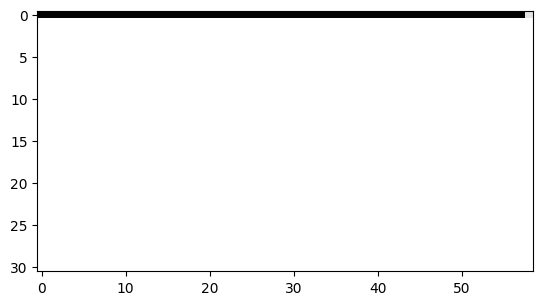

value = -0.0, value_ocr = None


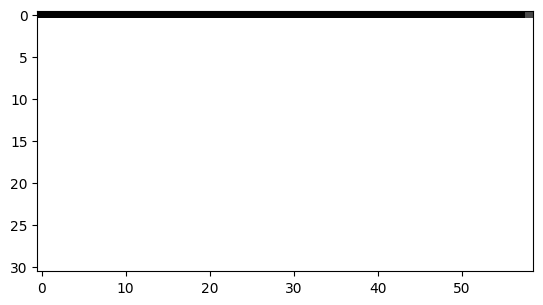

value = -0.0, value_ocr = None


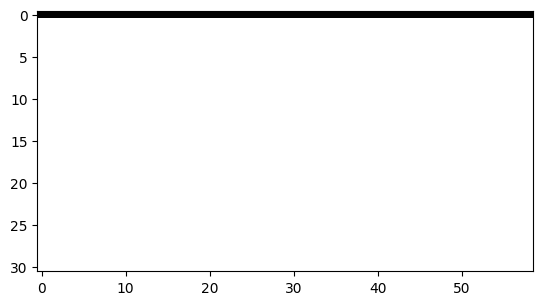

value = -0.0, value_ocr = None


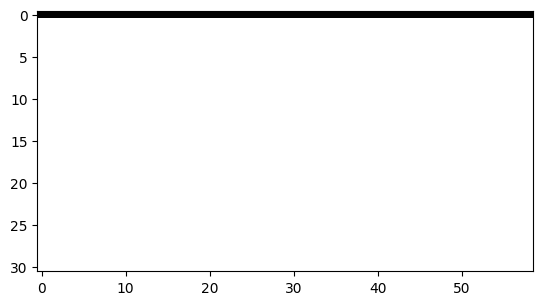

value = -0.0, value_ocr = None


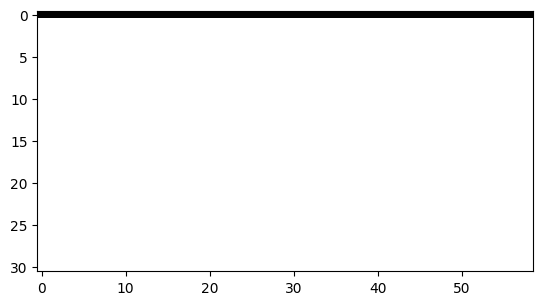

value = -0.0, value_ocr = None


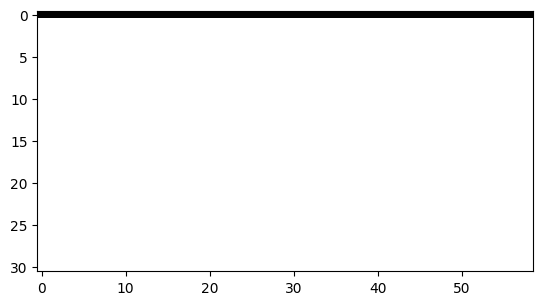

value = -0.0, value_ocr = None


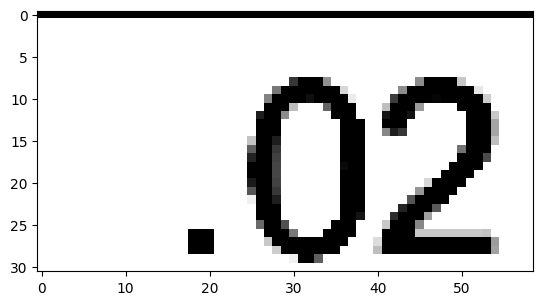

value = 0.01, value_ocr = None


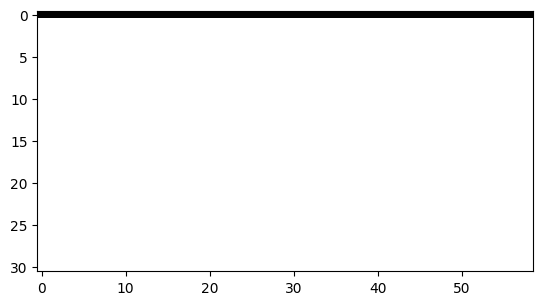

value = -0.0, value_ocr = None


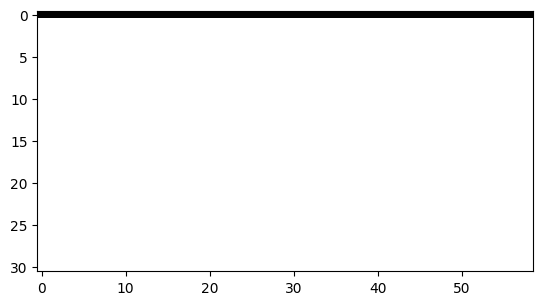

value = -0.0, value_ocr = None


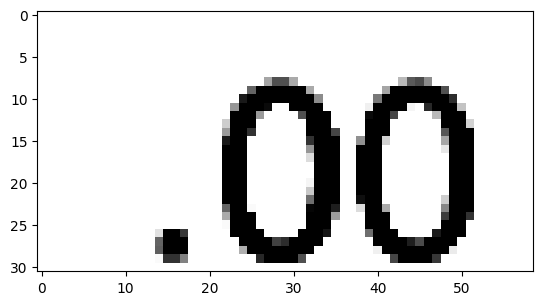

value = -0.0, value_ocr = 0.0


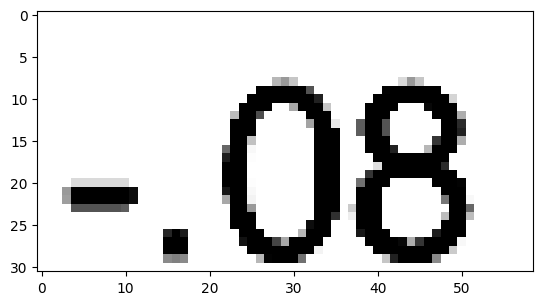

value = -0.1, value_ocr = -0.08


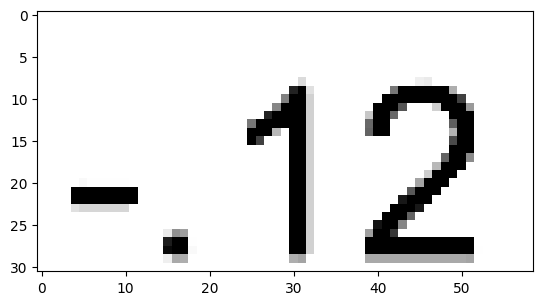

value = -0.16, value_ocr = None


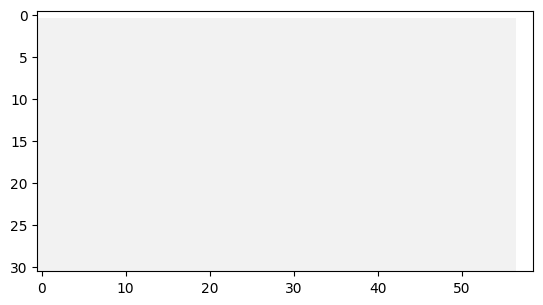

value = -0.0, value_ocr = None


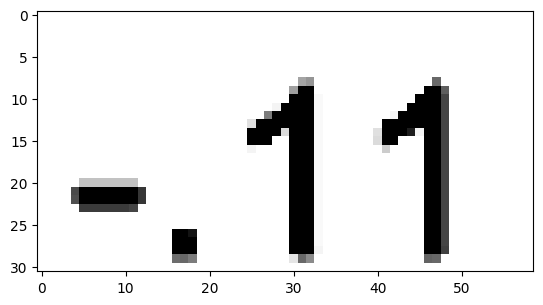

value = -0.14, value_ocr = -0.11


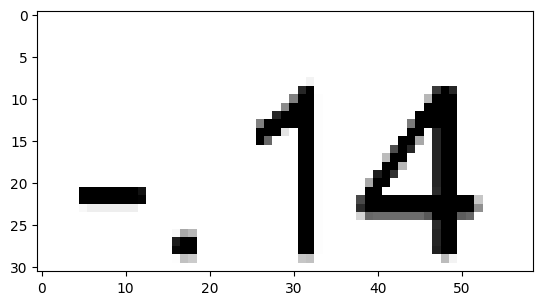

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.19, value_ocr = -0.14


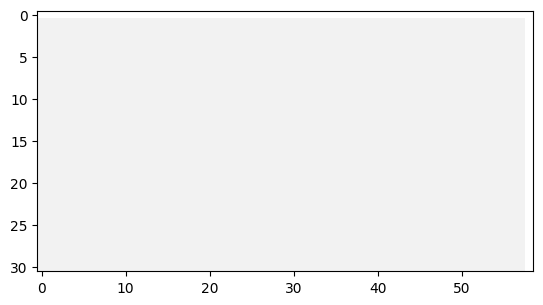

value = -0.0, value_ocr = None


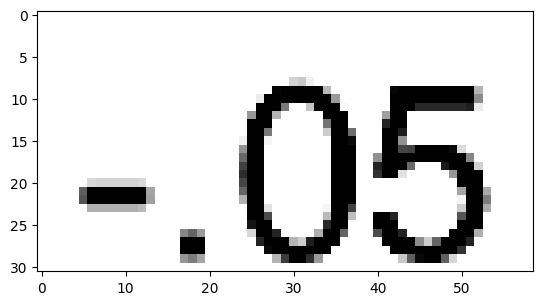

value = -0.06, value_ocr = -0.05


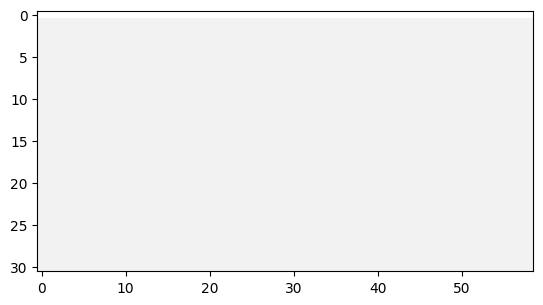

value = -0.0, value_ocr = None


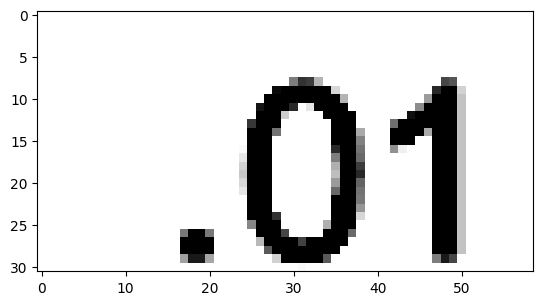

value = 0.01, value_ocr = 0.01


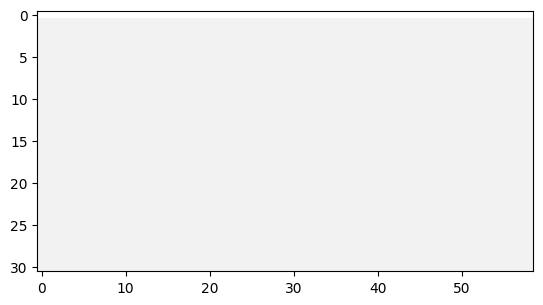

value = -0.0, value_ocr = None


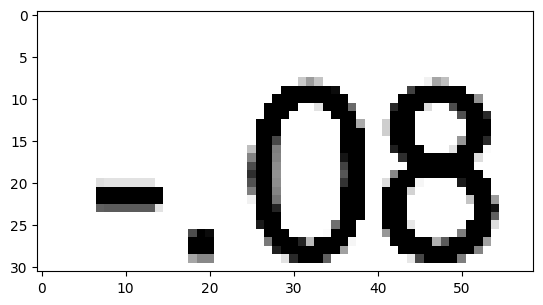

value = -0.1, value_ocr = -0.08


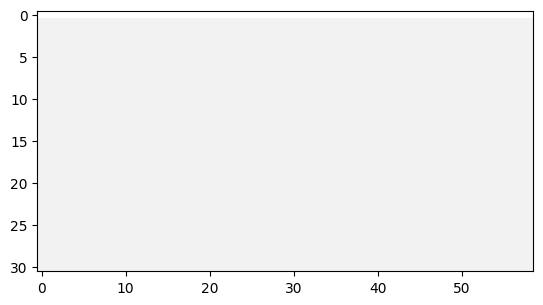

value = -0.0, value_ocr = None


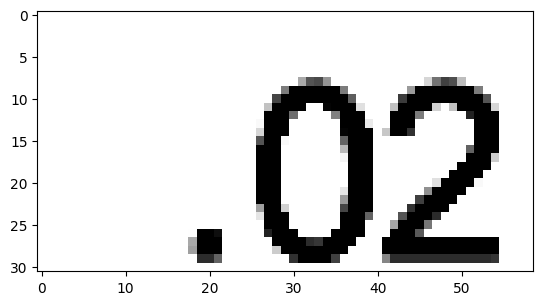

value = 0.02, value_ocr = 0.02


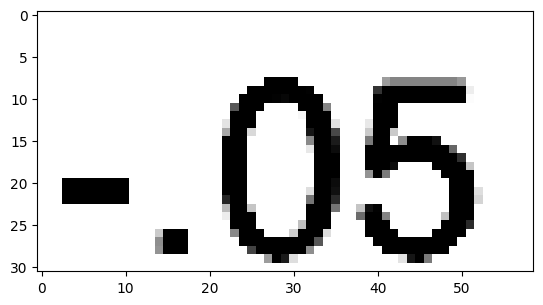

value = -0.06, value_ocr = -0.05


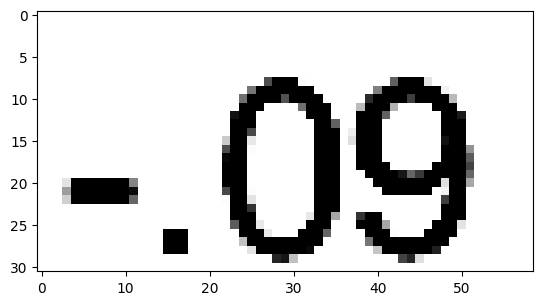

value = -0.1, value_ocr = -0.09


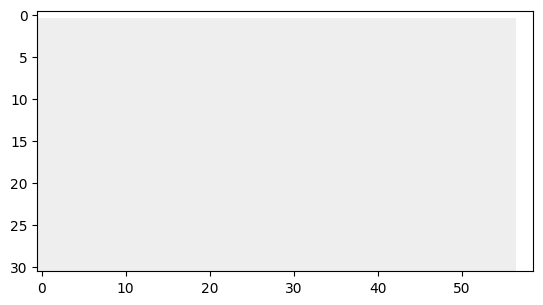

value = -0.0, value_ocr = None


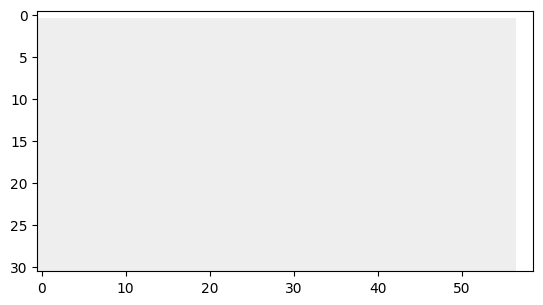

value = -0.0, value_ocr = None


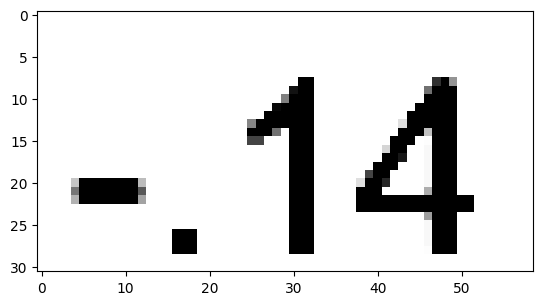

value = -0.18, value_ocr = -0.14


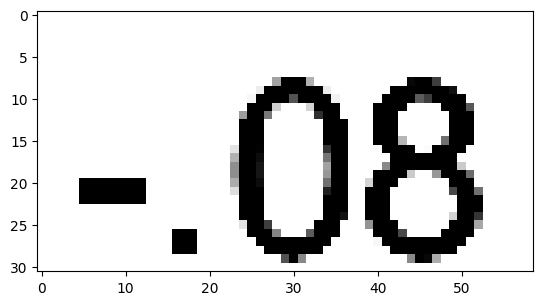

value = -0.1, value_ocr = -0.08


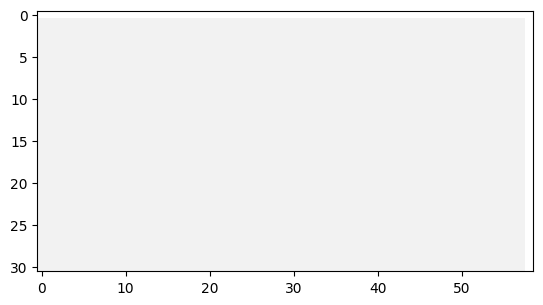

value = -0.0, value_ocr = None


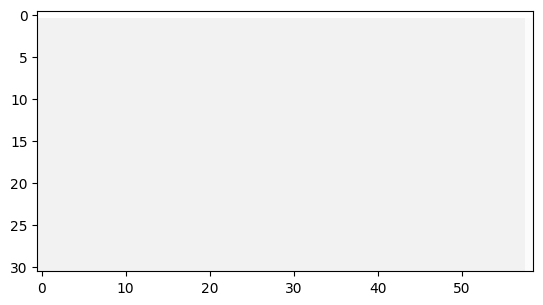

value = -0.0, value_ocr = None


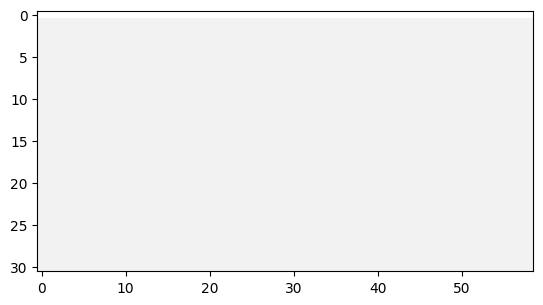

value = -0.0, value_ocr = None


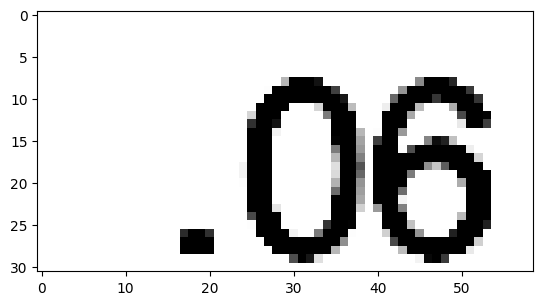

value = 0.05, value_ocr = 0.06


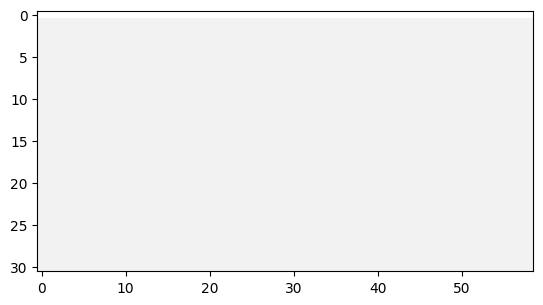

value = -0.0, value_ocr = None


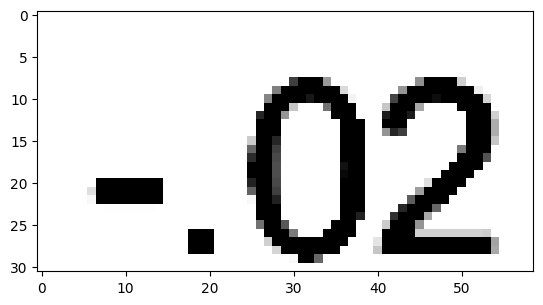

value = -0.02, value_ocr = -0.02


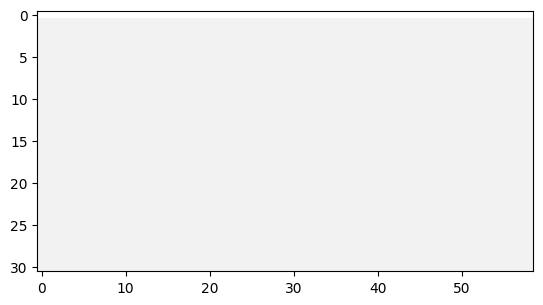

value = -0.0, value_ocr = None


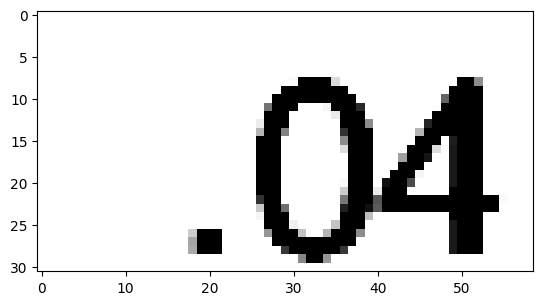

value = 0.03, value_ocr = None


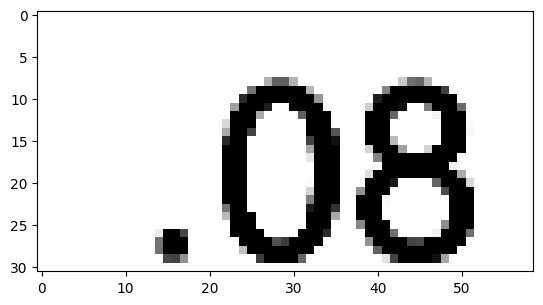

value = 0.06, value_ocr = 0.08


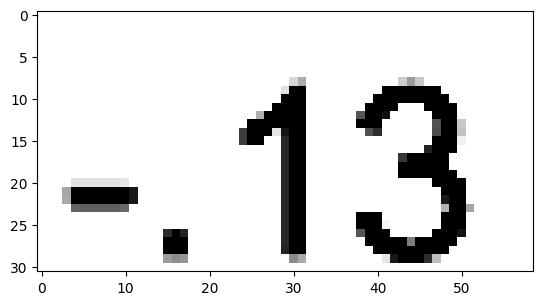

value = -0.18, value_ocr = None


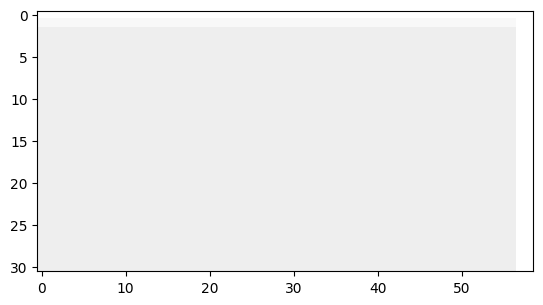

value = -0.0, value_ocr = None


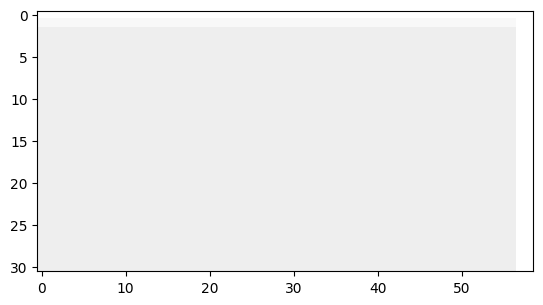

value = -0.0, value_ocr = None


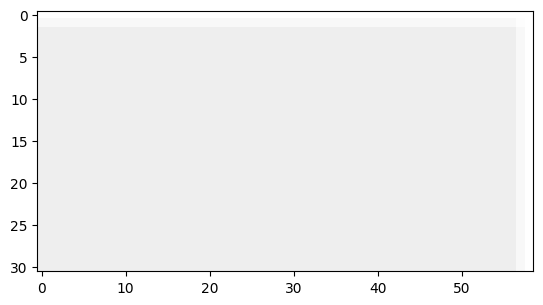

value = -0.0, value_ocr = None


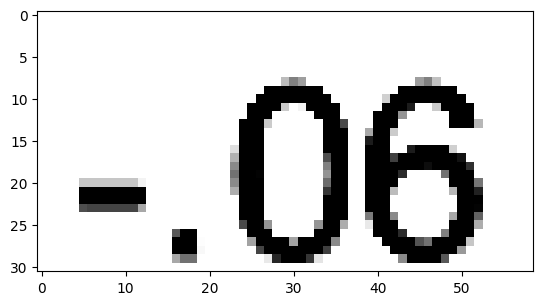

value = -0.07, value_ocr = -0.06


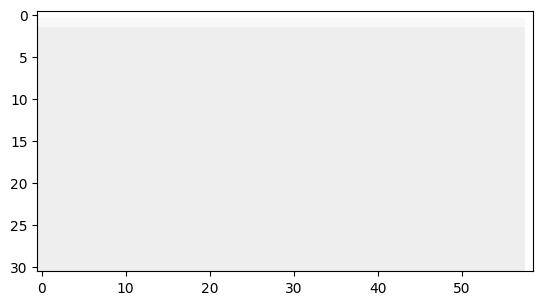

value = -0.0, value_ocr = None


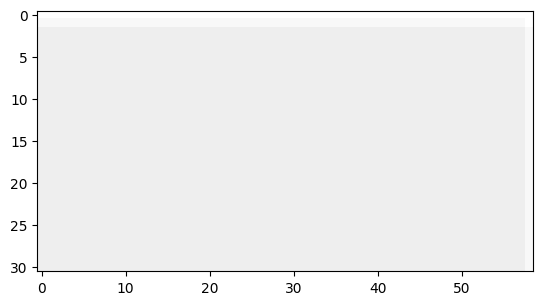

value = -0.0, value_ocr = None


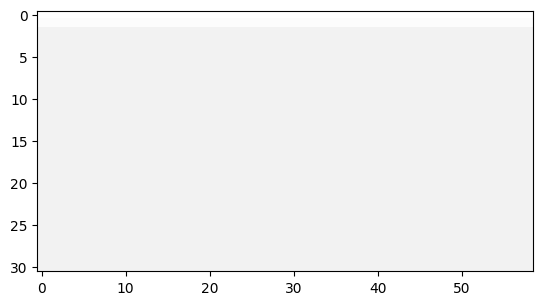

value = -0.0, value_ocr = None


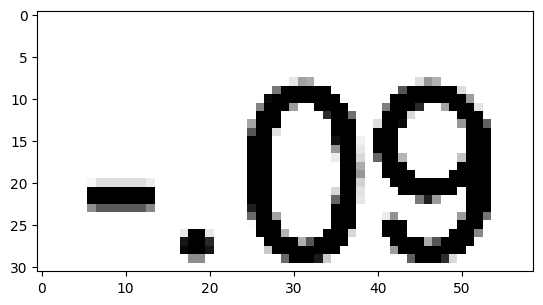

value = -0.11, value_ocr = -0.09


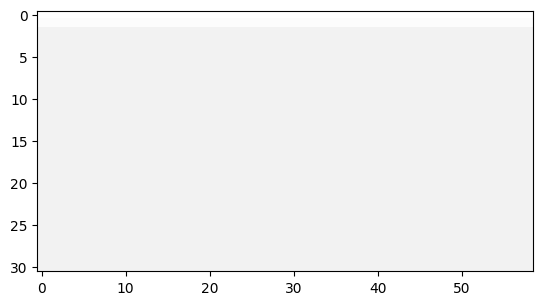

value = -0.0, value_ocr = None


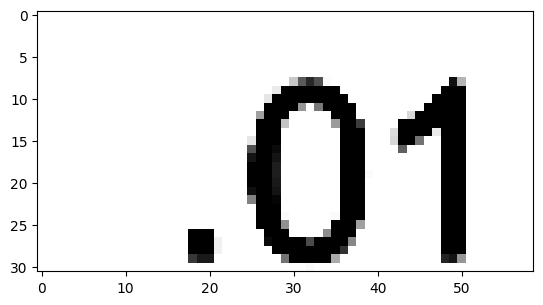

value = 0.01, value_ocr = 0.01


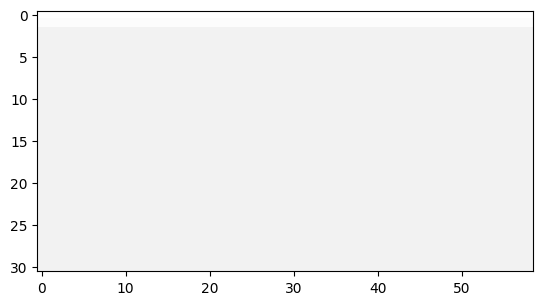

value = -0.0, value_ocr = None


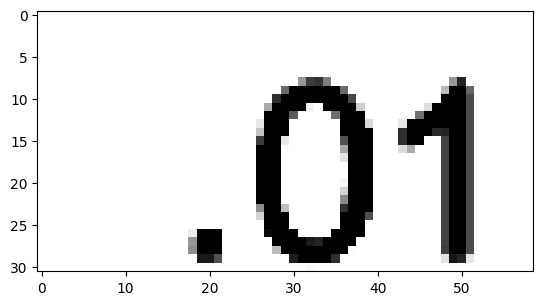

value = 0.0, value_ocr = 0.01


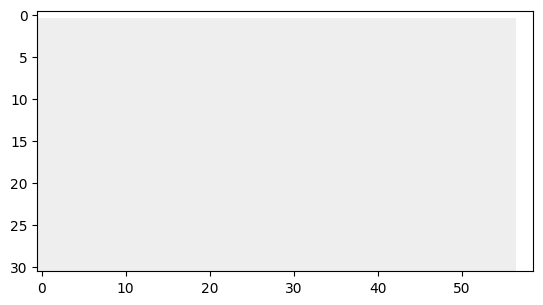

value = -0.0, value_ocr = None


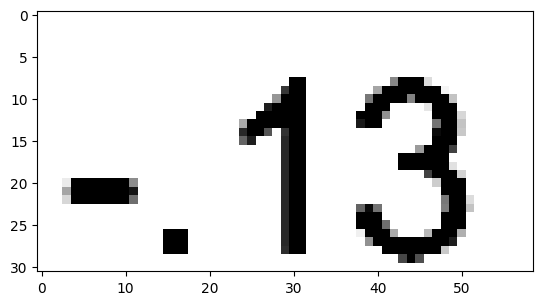

value = -0.17, value_ocr = None


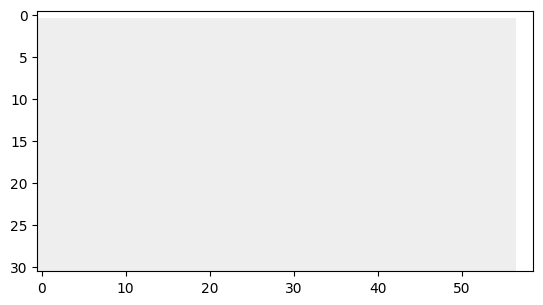

value = -0.0, value_ocr = None


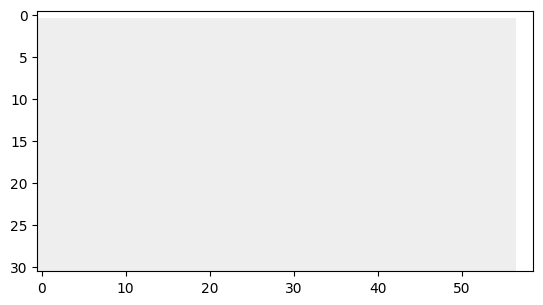

value = -0.0, value_ocr = None


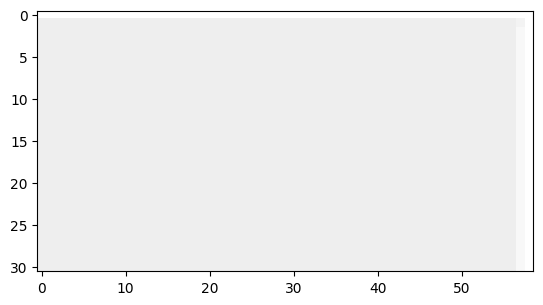

value = -0.0, value_ocr = None


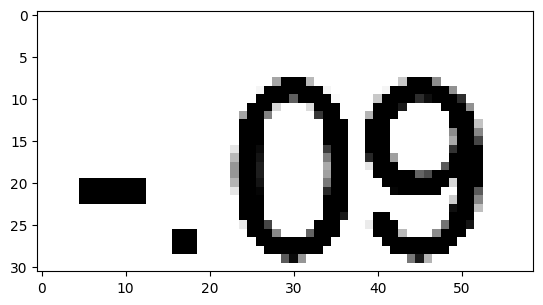

value = -0.11, value_ocr = -0.09


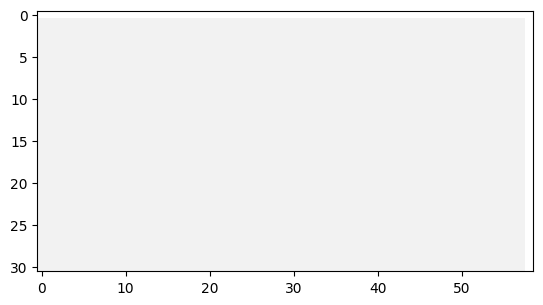

value = -0.0, value_ocr = None


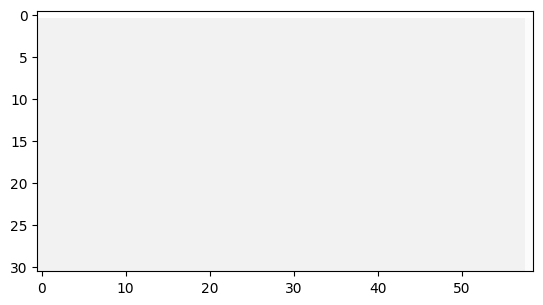

value = -0.0, value_ocr = None


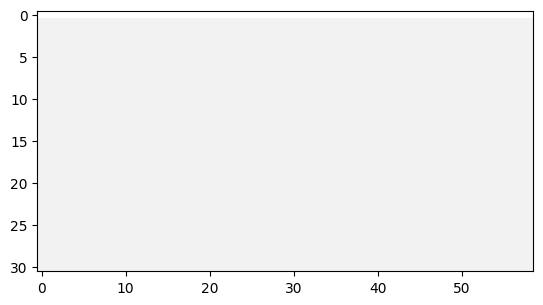

value = -0.0, value_ocr = None


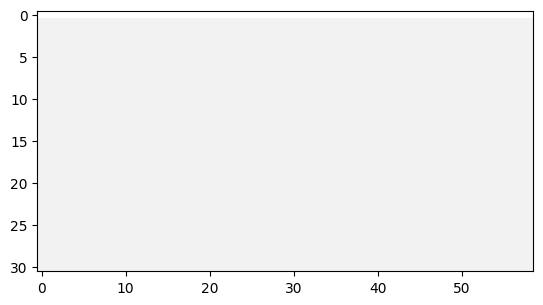

value = -0.0, value_ocr = None


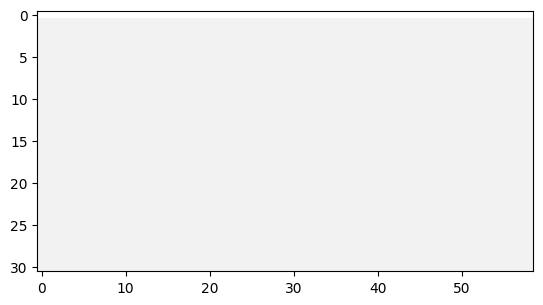

value = -0.0, value_ocr = None


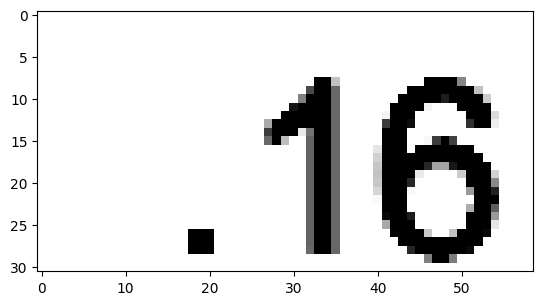

value = 0.14, value_ocr = 0.16


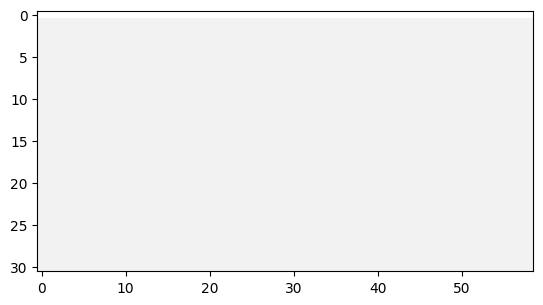

value = -0.0, value_ocr = None


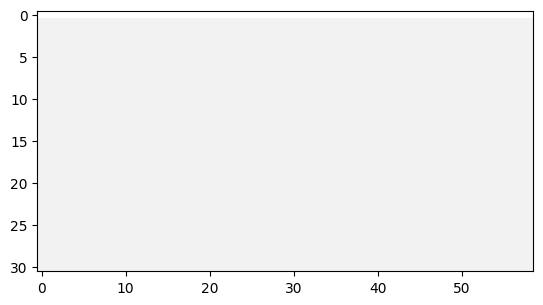

value = -0.0, value_ocr = None


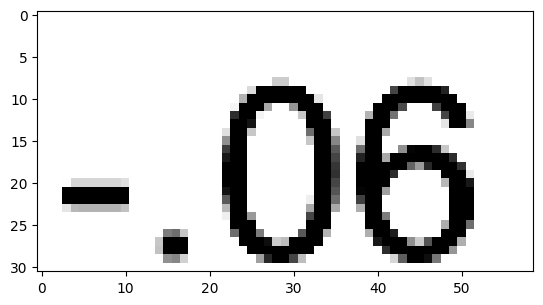

value = -0.07, value_ocr = -0.06


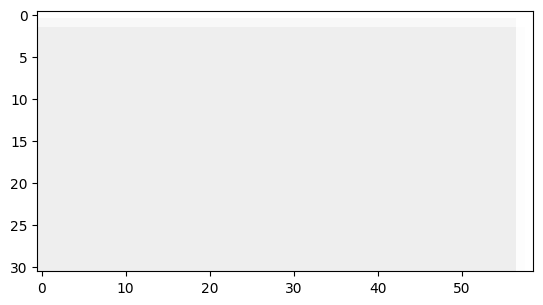

value = -0.0, value_ocr = None


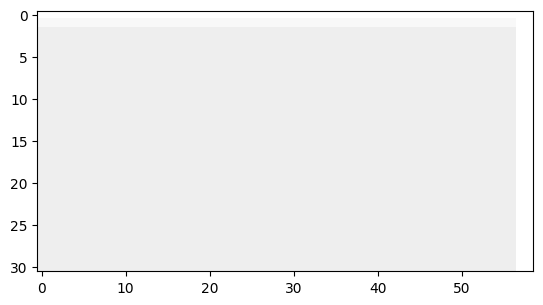

value = -0.0, value_ocr = None


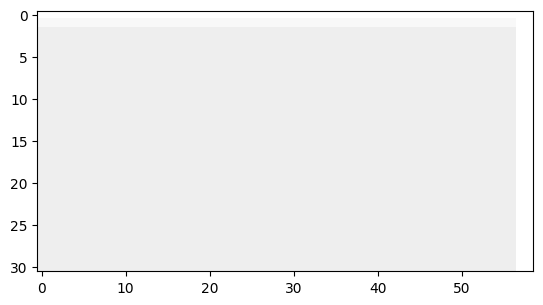

value = -0.0, value_ocr = None


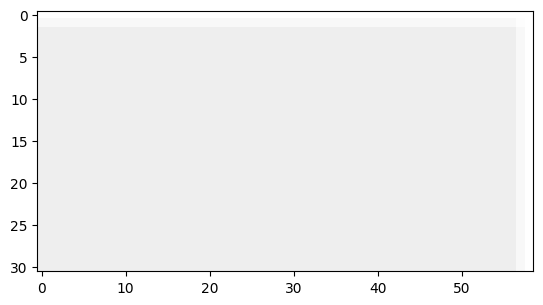

value = -0.0, value_ocr = None


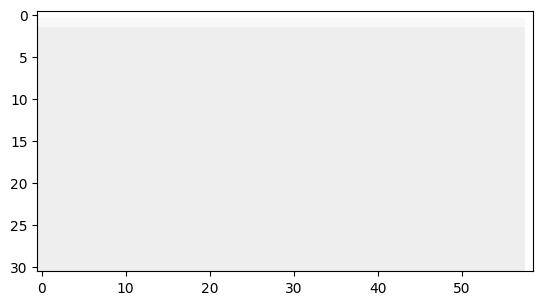

value = -0.0, value_ocr = None


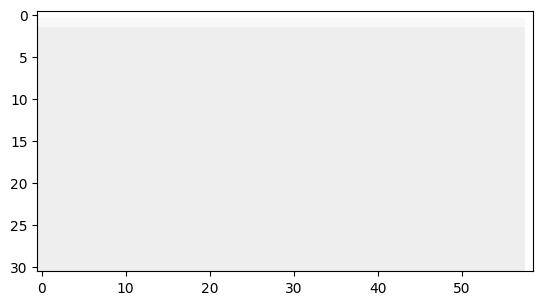

value = -0.0, value_ocr = None


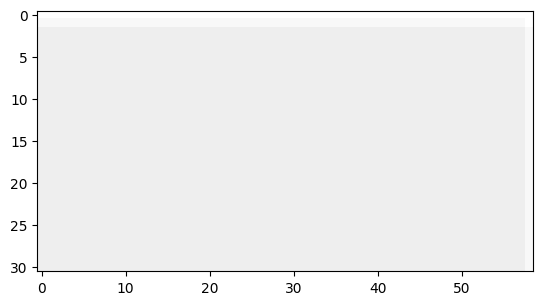

value = -0.0, value_ocr = None


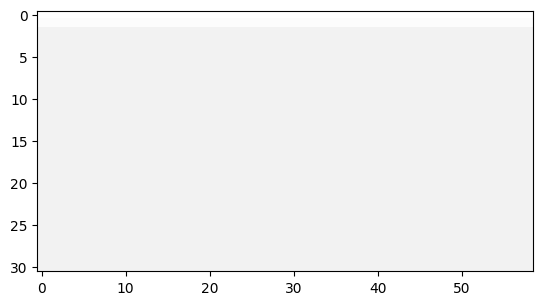

value = -0.0, value_ocr = None


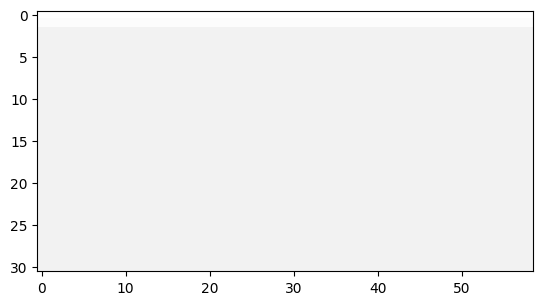

value = -0.0, value_ocr = None


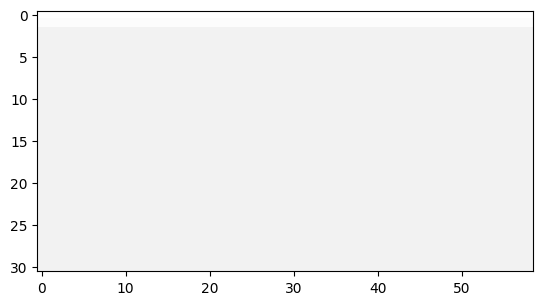

value = -0.0, value_ocr = None


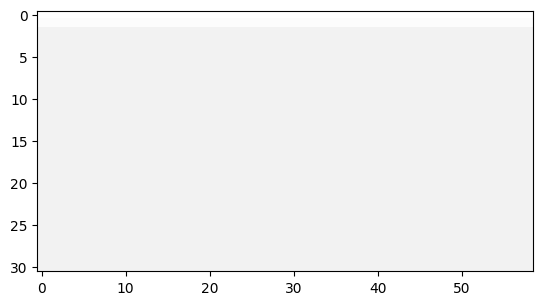

value = -0.0, value_ocr = None


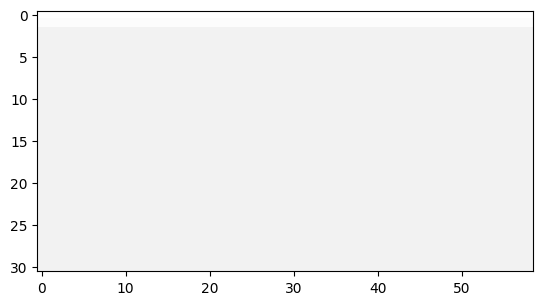

value = -0.0, value_ocr = None


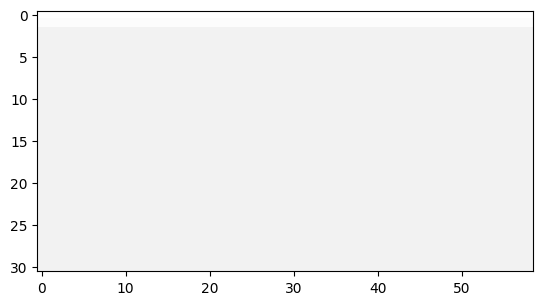

value = -0.0, value_ocr = None


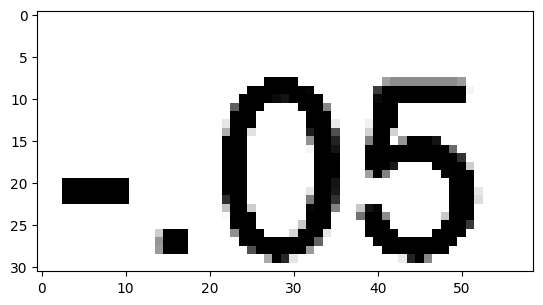

value = -0.07, value_ocr = -0.05


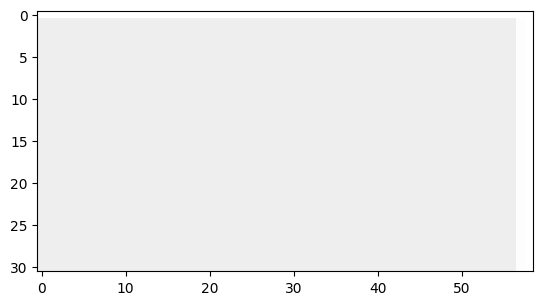

value = -0.0, value_ocr = None


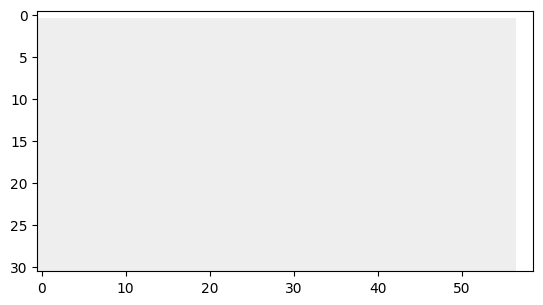

value = -0.0, value_ocr = None


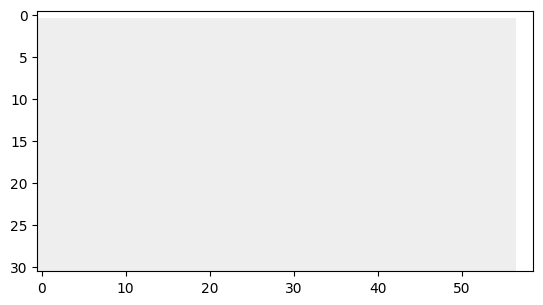

value = -0.0, value_ocr = None


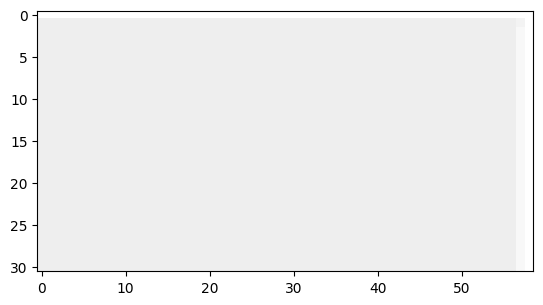

value = -0.0, value_ocr = None


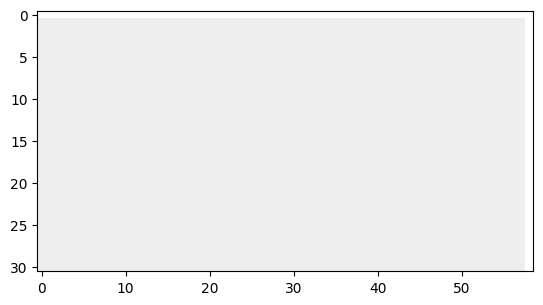

value = -0.0, value_ocr = None


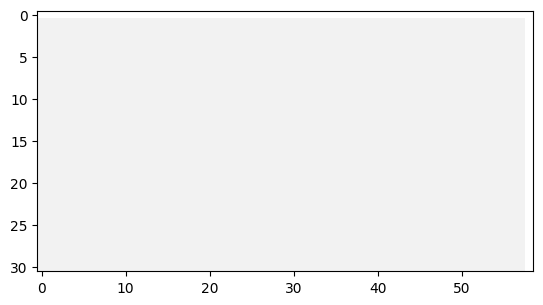

value = -0.0, value_ocr = None


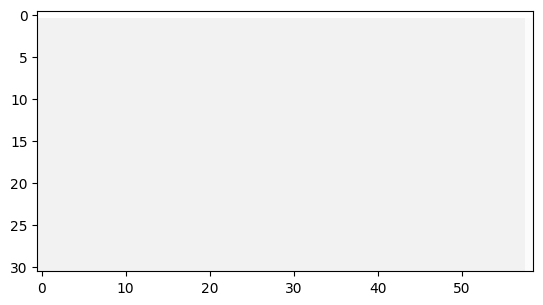

value = -0.0, value_ocr = None


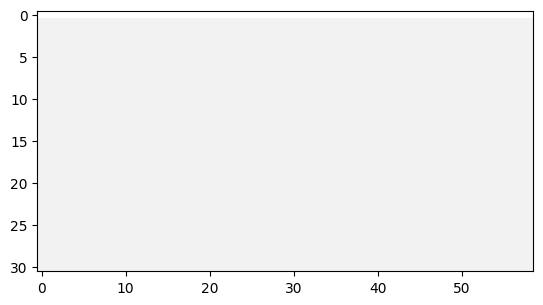

value = -0.0, value_ocr = None


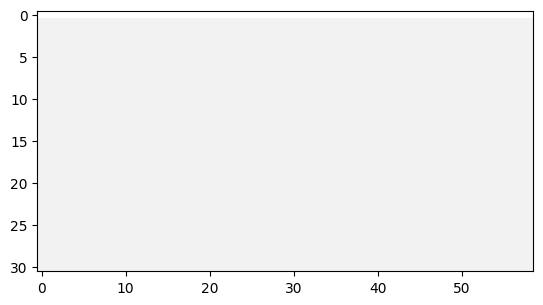

value = -0.0, value_ocr = None


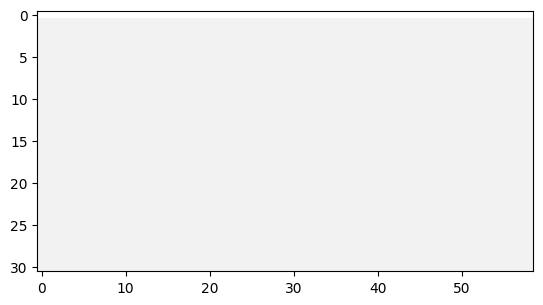

value = -0.0, value_ocr = None


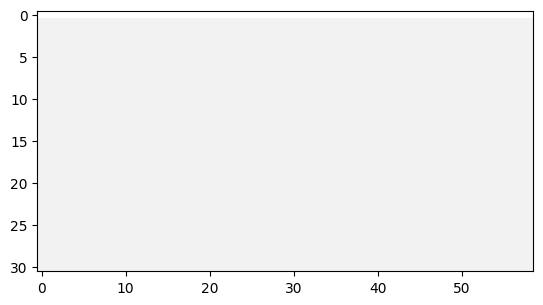

value = -0.0, value_ocr = None


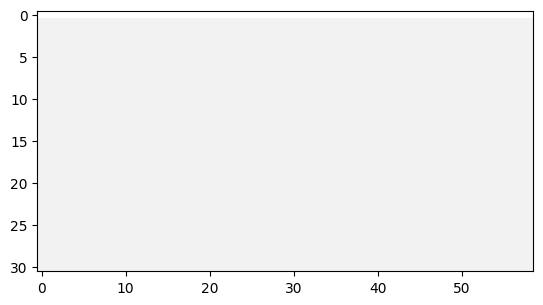

value = -0.0, value_ocr = None


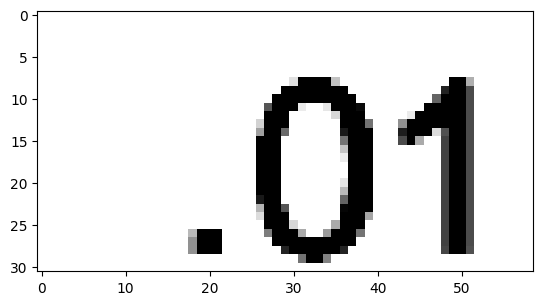

value = 0.01, value_ocr = 0.01


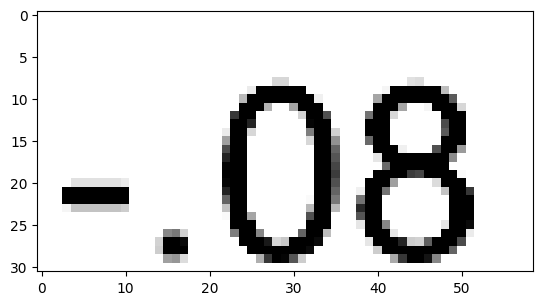

value = -0.1, value_ocr = -0.08


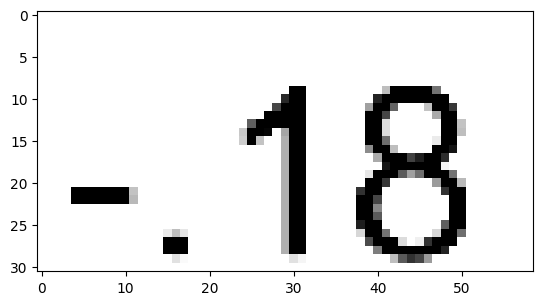

value = -0.25, value_ocr = None


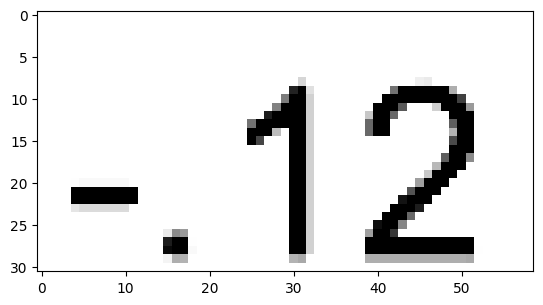

value = -0.16, value_ocr = None


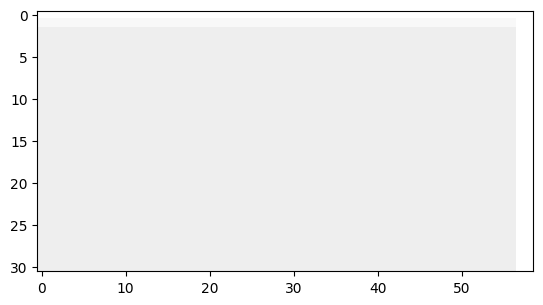

value = -0.0, value_ocr = None


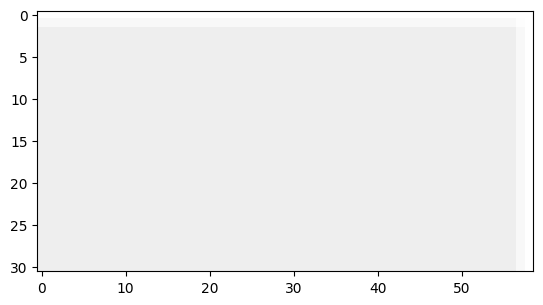

value = -0.0, value_ocr = None


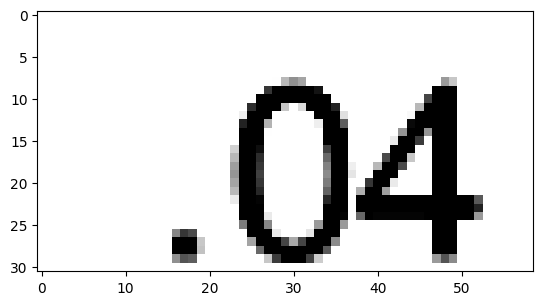

value = 0.03, value_ocr = 0.04


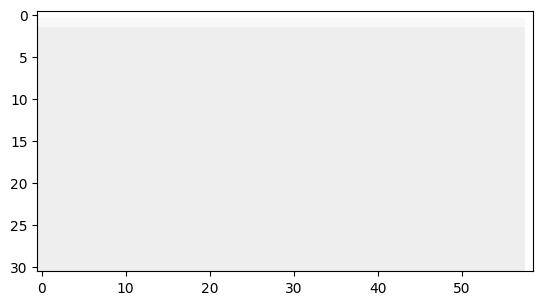

value = -0.0, value_ocr = None


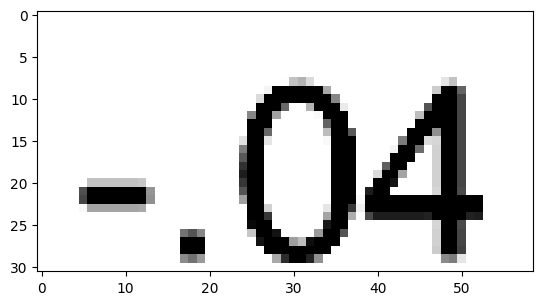

value = -0.05, value_ocr = -0.04


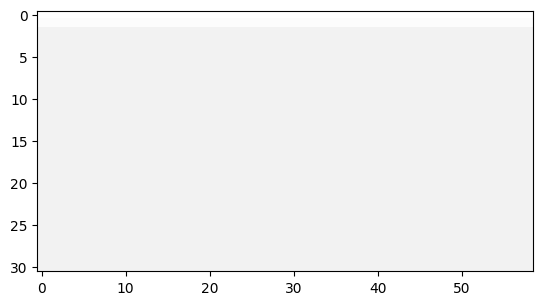

value = -0.0, value_ocr = None


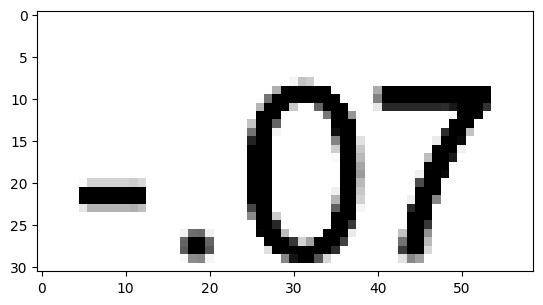

value = -0.08, value_ocr = -0.07


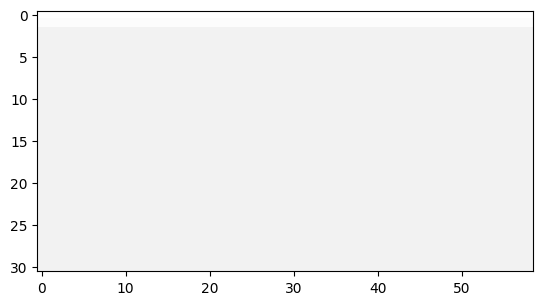

value = -0.0, value_ocr = None


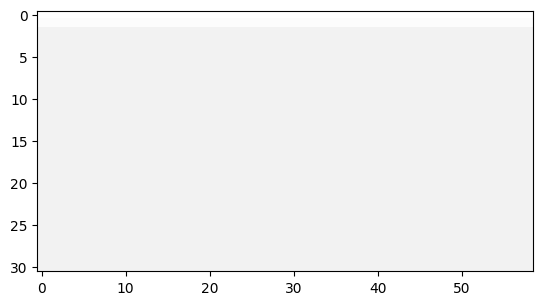

value = -0.0, value_ocr = None


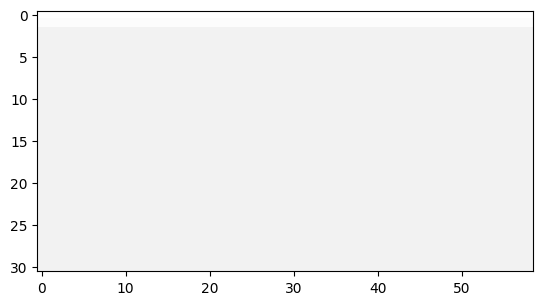

value = -0.0, value_ocr = None


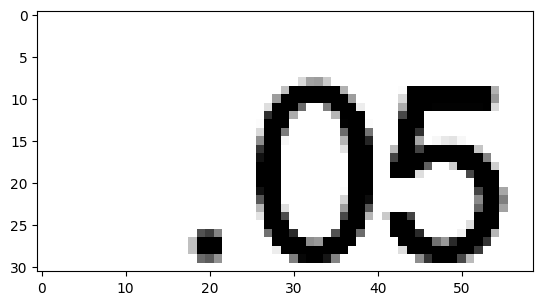

value = 0.04, value_ocr = 0.05


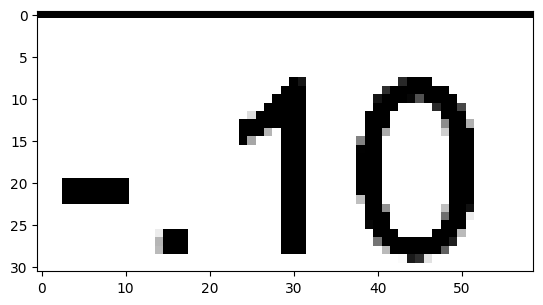

value = -0.13, value_ocr = None


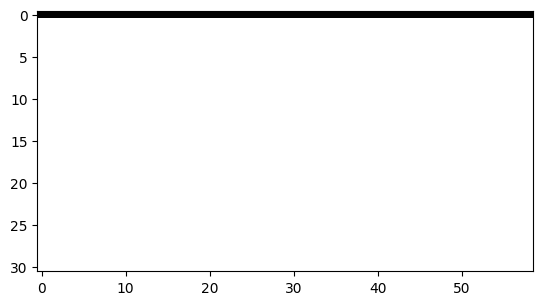

value = -0.0, value_ocr = None


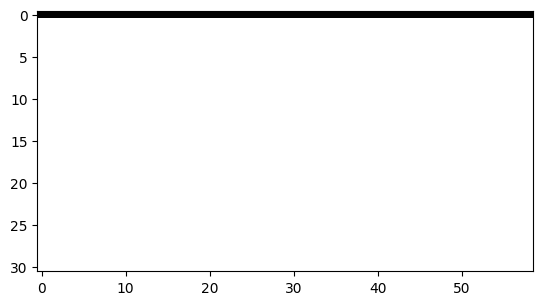

value = -0.0, value_ocr = None


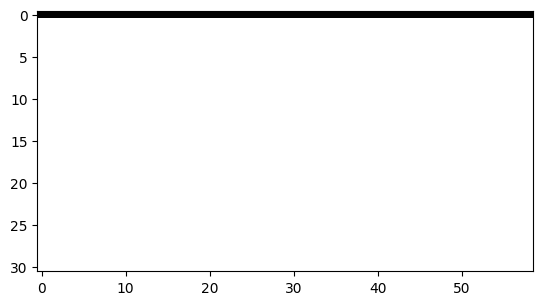

value = -0.0, value_ocr = None


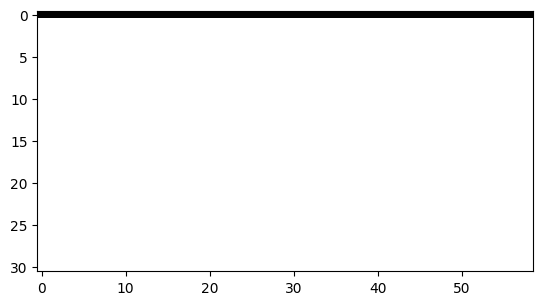

value = -0.0, value_ocr = None


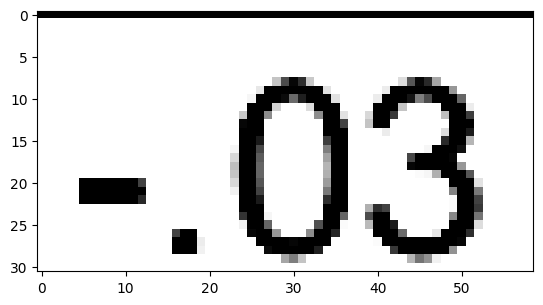

value = -0.04, value_ocr = None


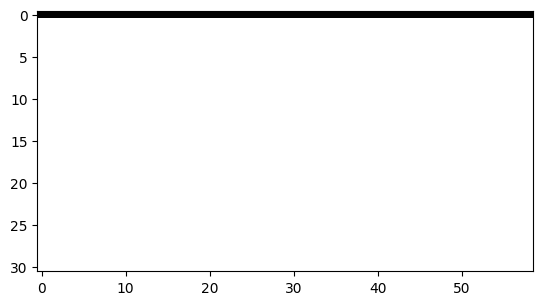

value = -0.0, value_ocr = None


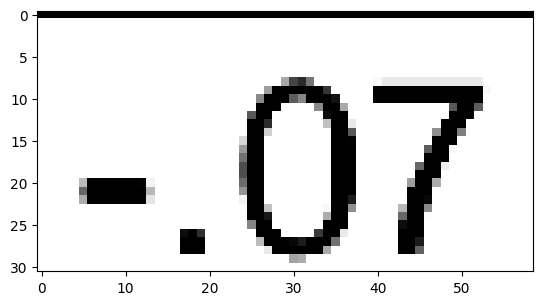

value = -0.09, value_ocr = -0.07


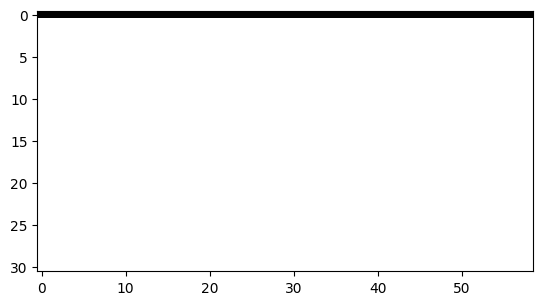

value = -0.0, value_ocr = None


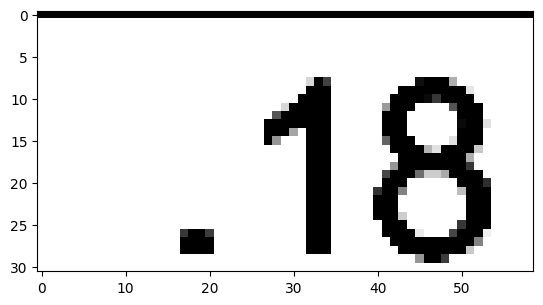

value = 0.16, value_ocr = None


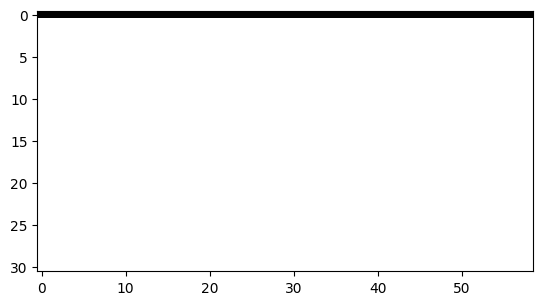

value = -0.0, value_ocr = None


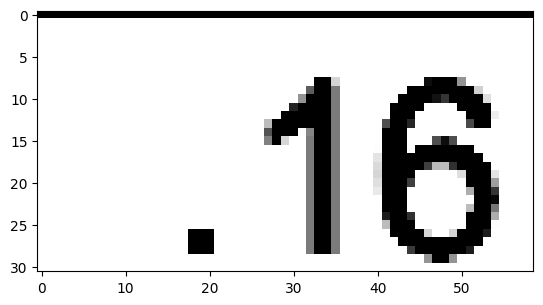

value = 0.14, value_ocr = None


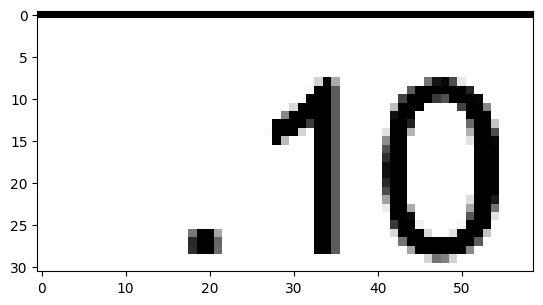

value = 0.08, value_ocr = None


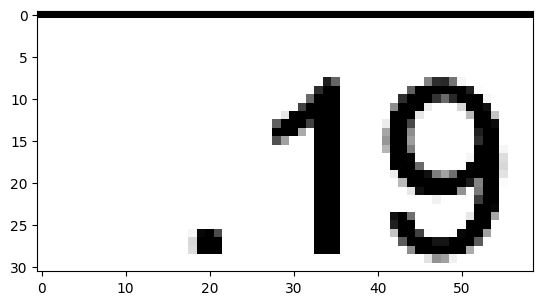

value = 0.18, value_ocr = None


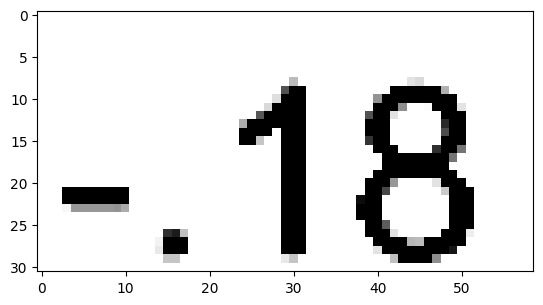

value = -0.26, value_ocr = None


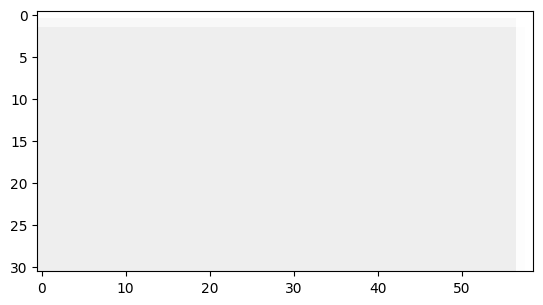

value = -0.0, value_ocr = None


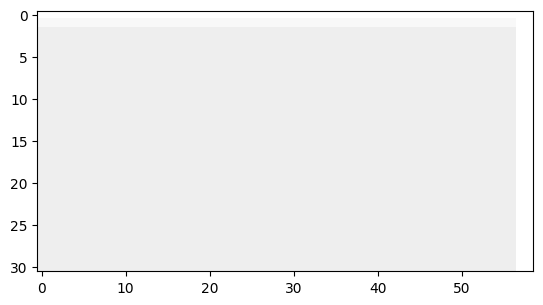

value = -0.0, value_ocr = None


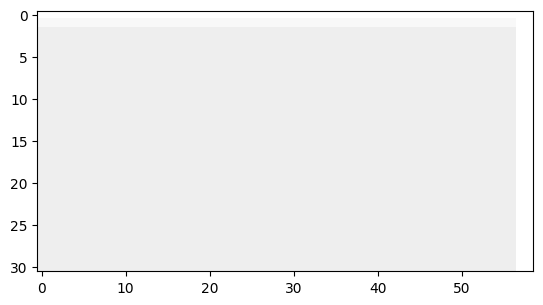

value = -0.0, value_ocr = None


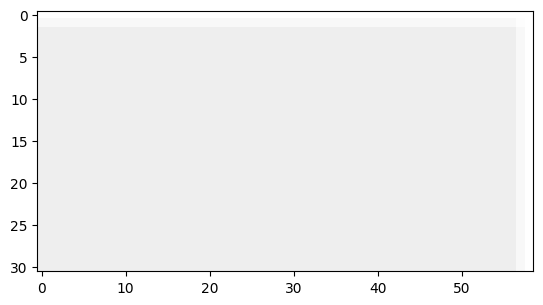

value = -0.0, value_ocr = None


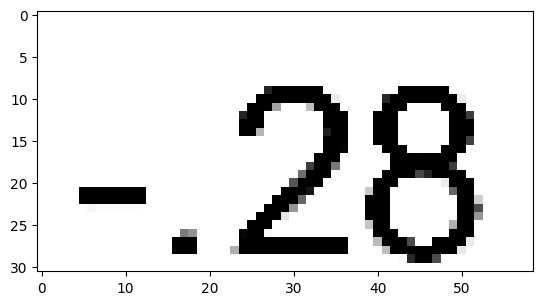

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.47, value_ocr = -0.28


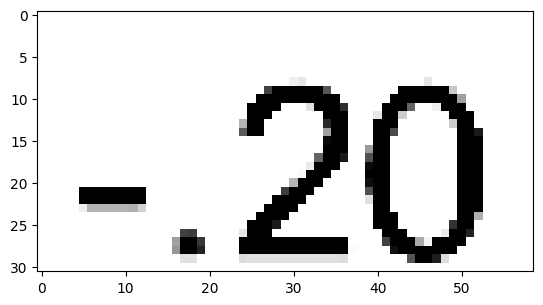

value = -0.29, value_ocr = -0.2


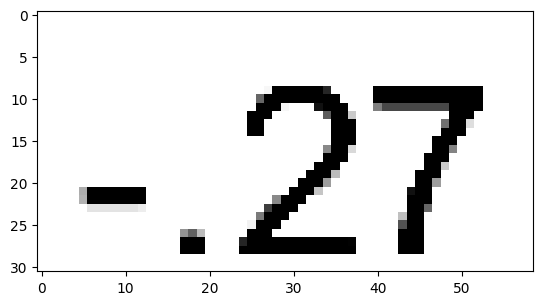

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.44, value_ocr = -0.27


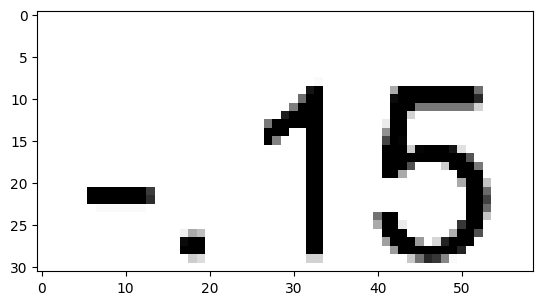

value = -0.21, value_ocr = None


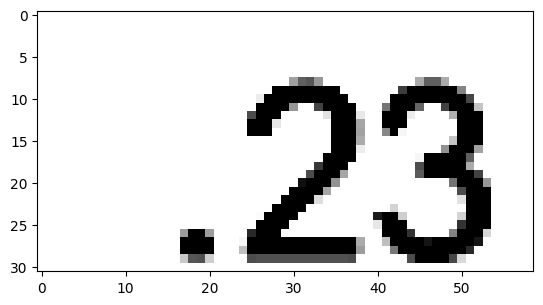

value = 0.23, value_ocr = 0.23


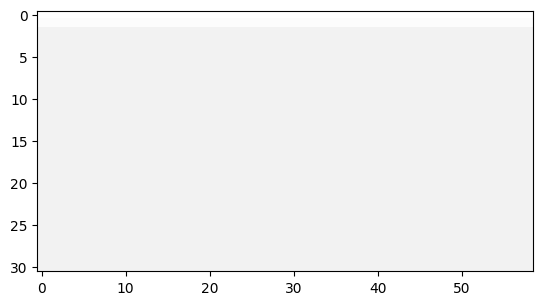

value = -0.0, value_ocr = None


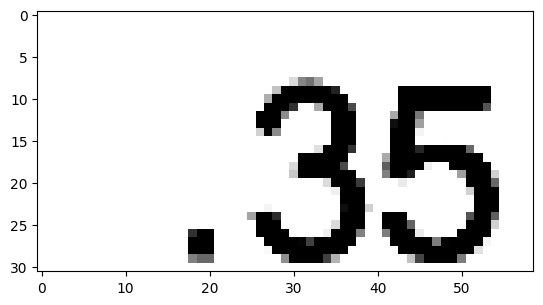

value = 0.44, value_ocr = 0.35


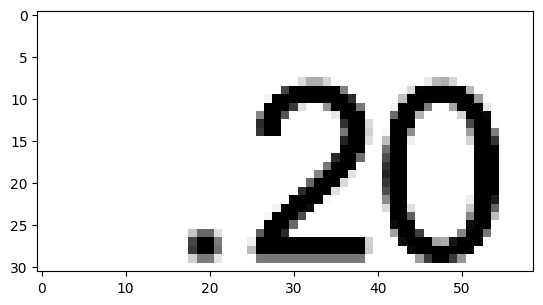

value = 0.19, value_ocr = 0.2


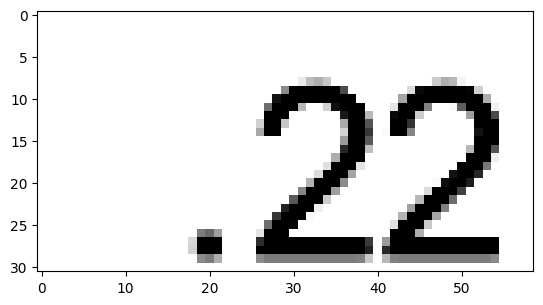

value = 0.22, value_ocr = 0.22


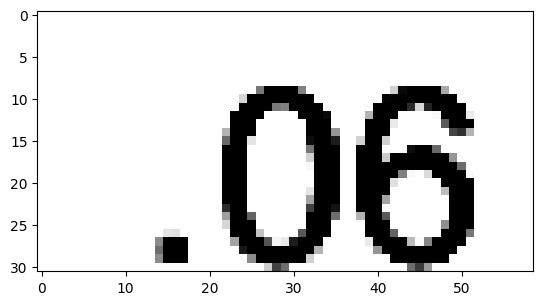

value = 0.05, value_ocr = 0.06


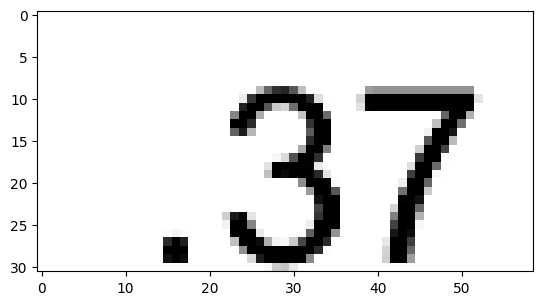

value = 0.48, value_ocr = 0.387


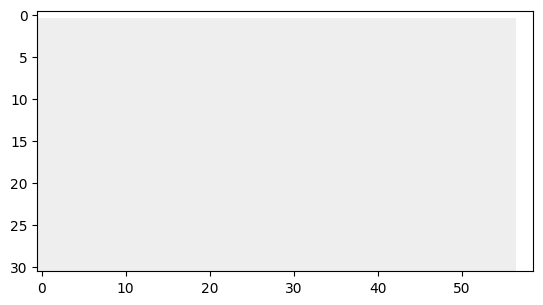

value = -0.0, value_ocr = None


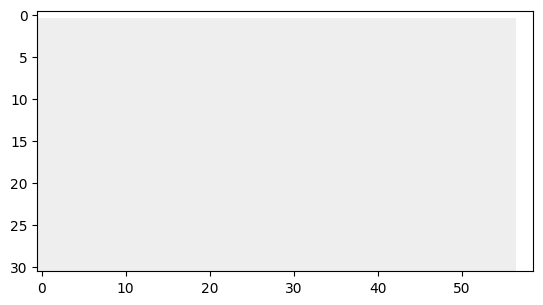

value = -0.0, value_ocr = None


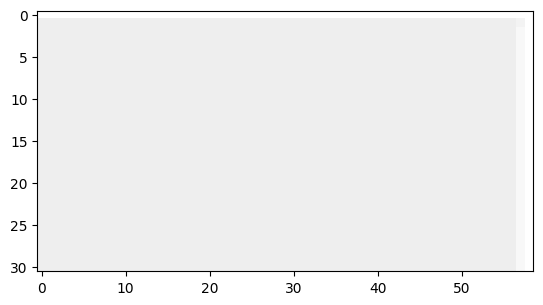

value = -0.0, value_ocr = None


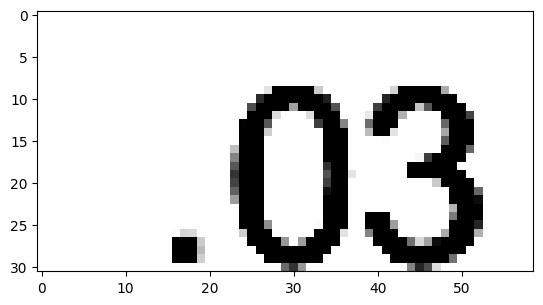

value = 0.02, value_ocr = 0.03


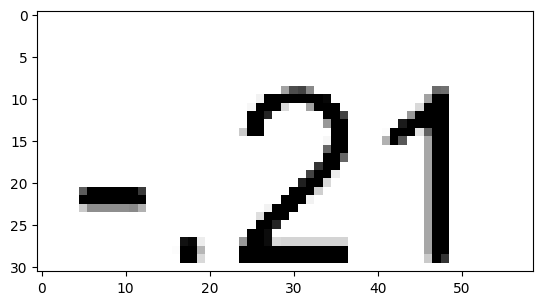

value = -0.32, value_ocr = -0.21


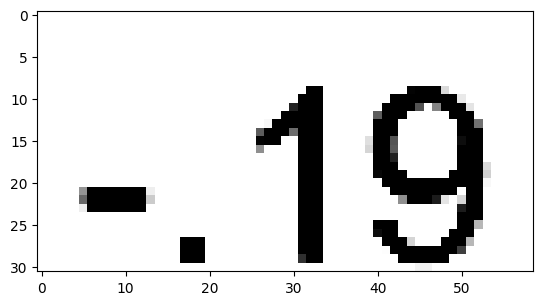

value = -0.29, value_ocr = -0.19


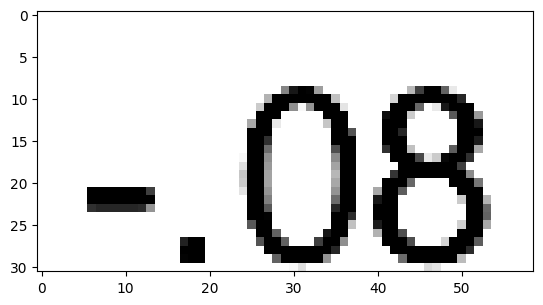

value = -0.1, value_ocr = -0.08


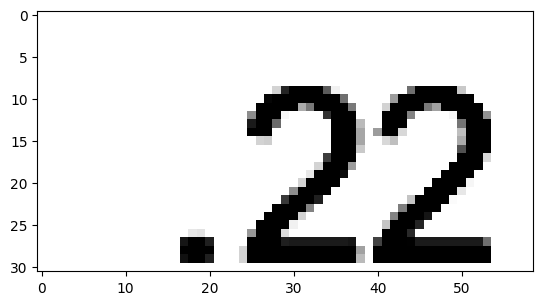

value = 0.22, value_ocr = 0.22


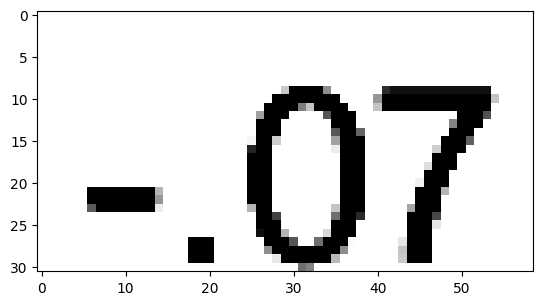

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
value = -0.08, value_ocr = -0.7


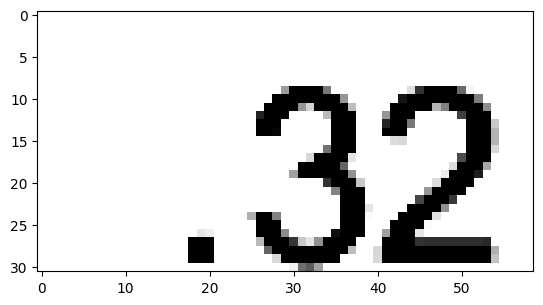

ValueError: could not convert string to float: 'ney)\n'

In [124]:
height, width, _ = image.shape

cell_width = int(round(width / len(columns), 0))
cell_height = int(round(height / len(rows), 0))

df = []

for n_row, row in enumerate(rows):
    for n_col, column in enumerate(columns):
        start_x = n_col * cell_width
        start_y = n_row * cell_height
        cell = image[start_y:start_y + cell_height, start_x:start_x + cell_width]
        cell = cell[:, 7:]
        cell = cell[:-5, :]
        most_common_color = get_main_color(cell)
        color_name = get_color_name(most_common_color)
        value = get_value(most_common_color)
        img = increase_contrast(cell)
        img = desaturate(img)
        plt.imshow(img)
        plt.show()
        value_ocr = get_ocr(img)
        print(f'value = {value}, value_ocr = {value_ocr}')
        
        #df.append([row, column, value, 'argeeableness'])
        

In [23]:
columns = pd.read_csv('data/neurotism_columns.csv', header=None)
columns = columns[0].values.tolist()
columns = [i.replace('cd.-', '') for i in columns]

image = cv2.imread('data/neurotism.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [27]:
height, width, _ = image.shape

cell_width = int(round(width / len(columns), 0))
cell_height = int(round(height / len(rows), 0))

for n_row, row in enumerate(rows):
    for n_col, column in enumerate(columns):
        start_x = n_col * cell_width
        start_y = n_row * cell_height
        cell = image[start_y:start_y + cell_height, start_x:start_x + cell_width]
        most_common_color = get_main_color(cell)
        color_name = get_color_name(most_common_color)
        value = get_value(most_common_color)
        break
        df.append([row, column, value, 'neurotism'])

In [25]:
df = pd.DataFrame(df, columns=['ability', 'trait', 'value', 'table_name'])
df.to_csv('data/data.csv', index=False)
df.head()

ability              trait     value     table_name
0  General Mental Ability      Agreeableness -0.141421  argeeableness
1  General Mental Ability         Compassion       NaN  argeeableness
2  General Mental Ability         Politeness -0.000000  argeeableness
3  General Mental Ability  Tender Mindedness -0.244949  argeeableness
4  General Mental Ability         Nurturance       NaN  argeeableness

In [35]:
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0    # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(cell, alpha=alpha, beta=beta)

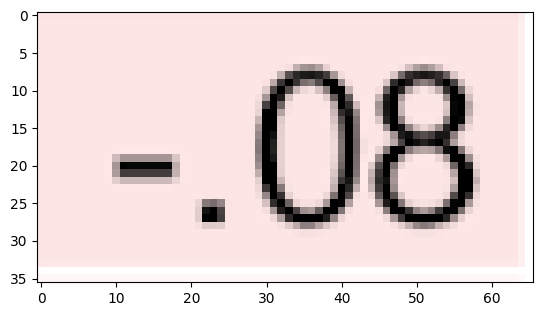

In [78]:
plt.imshow(cell)
plt.show()

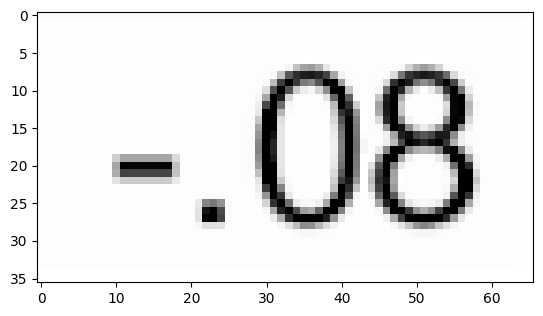

In [84]:
a = desaturate(cell)
plt.imshow(a)
plt.show()

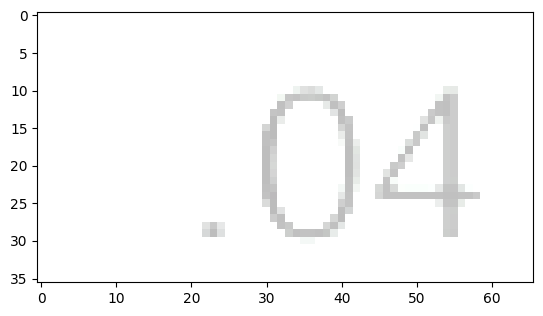

In [40]:
gray = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)
plt.imshow(adjusted)
plt.show()

In [63]:

# plt.imshow(image_enhanced_cv)
# plt.show()

In [62]:
get_ocr(image_desaturated)

'04\n'